In [1]:
# Importing Basic Packages
import os, sys
os.getcwd()

"C:\\Users\\Sid's Lappy\\Documents\\Python Programming\\Portfolio projects\\Bankruptcy prediction classification"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')
import datetime

import scipy
from scipy.stats import norm
import sklearn
from sklearn.model_selection import train_test_split

from pylab import rcParams
rcParams['figure.figsize'] = 15,12

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit


In [3]:
# Importing Dataset
df = pd.read_csv('_BANKRUPTCY PREDICTION .csv')

In [4]:
df1 = df.copy()

In [5]:
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [6]:
df1.head(20)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1
5,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,0.781069,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,0.019534,1
6,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,0.781180,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,0.015663,0
7,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,0.781621,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,0.034889,0
8,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,0.781598,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,0.065826,0
9,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,0.781574,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,0.030801,0


#### Checking for missing values

In [7]:
df1.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

In [8]:
df1.shape

(6819, 95)

In [9]:
df1['Bankrupt'].index

RangeIndex(start=0, stop=6819, step=1)

In [10]:
df1.value_counts

<bound method DataFrame.value_counts of        ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                   

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [12]:
#  Save a backup of the original DataFrame
df_backup = df.copy()

# Remove the "Bankrupt" column
df = df.drop("Bankrupt", axis=1)

# Add the removed column to the beginning of the DataFrame
new_col_name = "Bankrupt"
df.insert(0, new_col_name, df_backup.pop(new_col_name))

In [13]:
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [14]:
df1.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking for imbalance dataset

In [15]:
df1['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

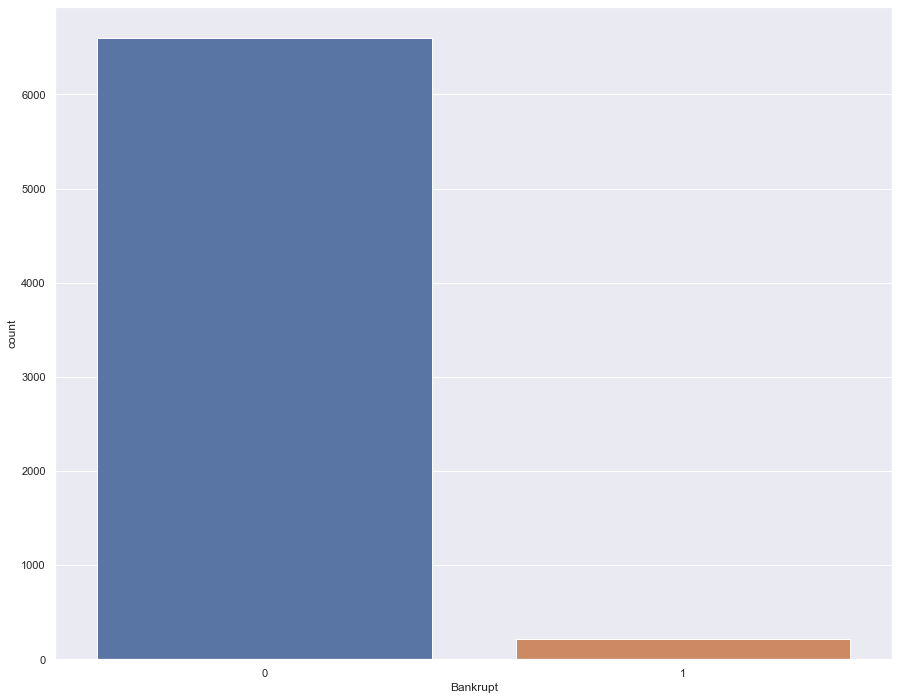

In [16]:
#Visualising the distribution target variable in the data
sns.countplot(x = 'Bankrupt', data = df1)

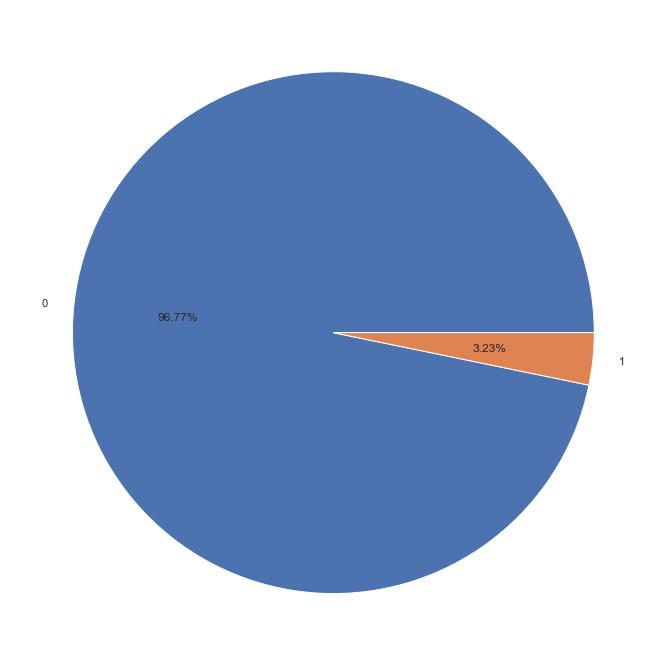

In [17]:
data = df1['Bankrupt'].value_counts()
plt.pie(data, autopct= '%1.2f%%', labels = data.index)
plt.show()

In [18]:
duplicates = df1[df1.duplicated()]

In [19]:
duplicates.head(20)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt


In [20]:
# There are no duplicates and null values in the data

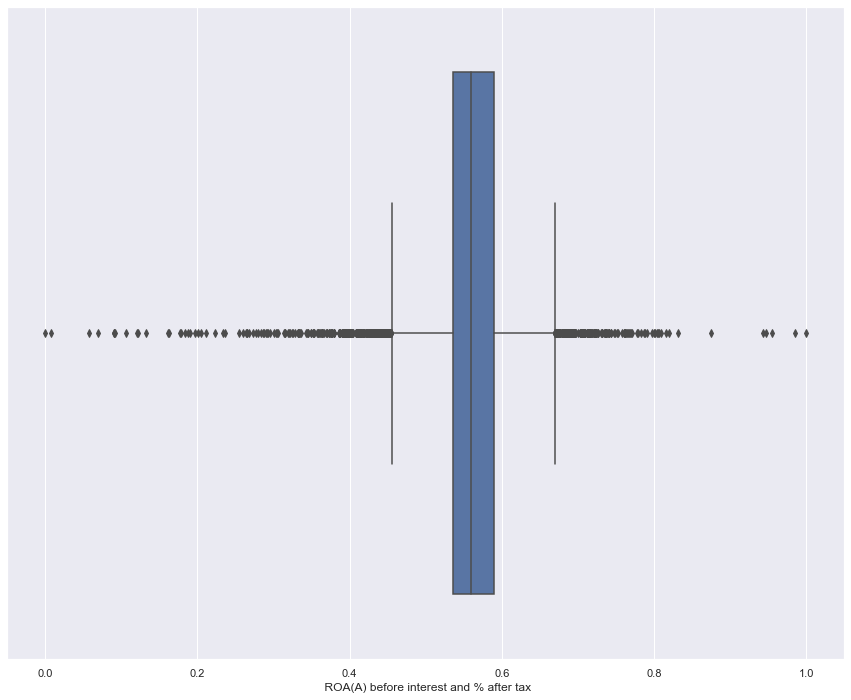

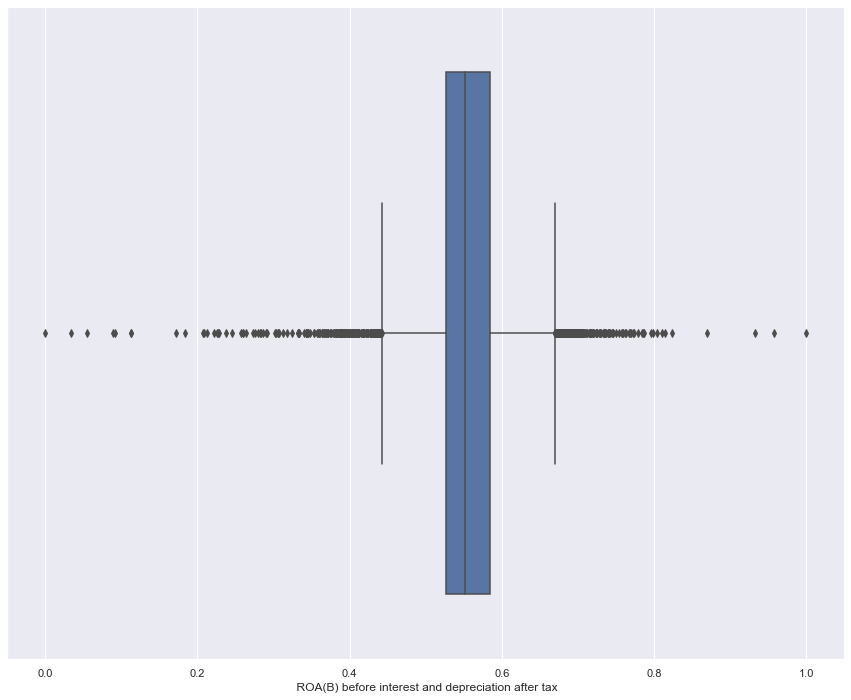

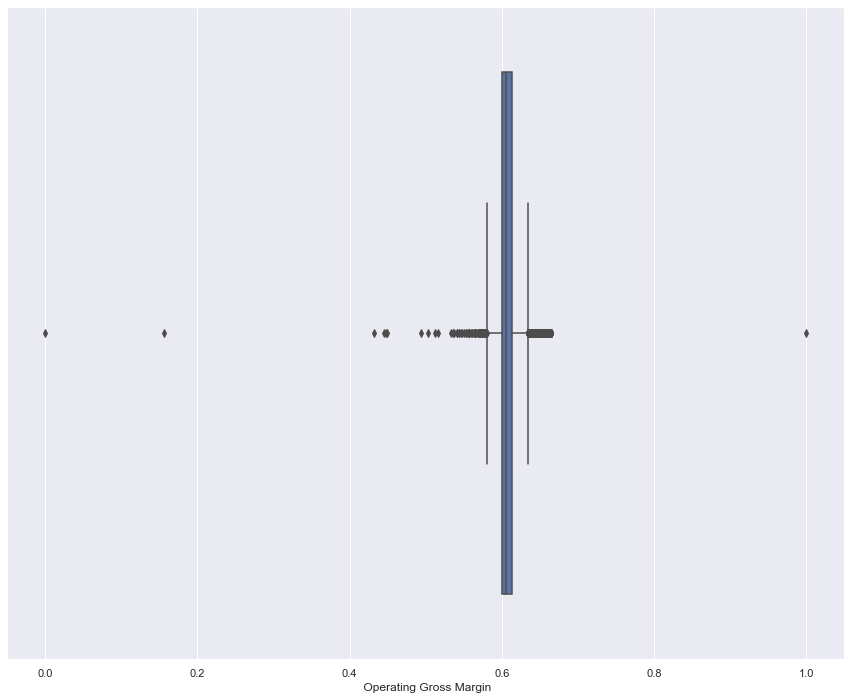

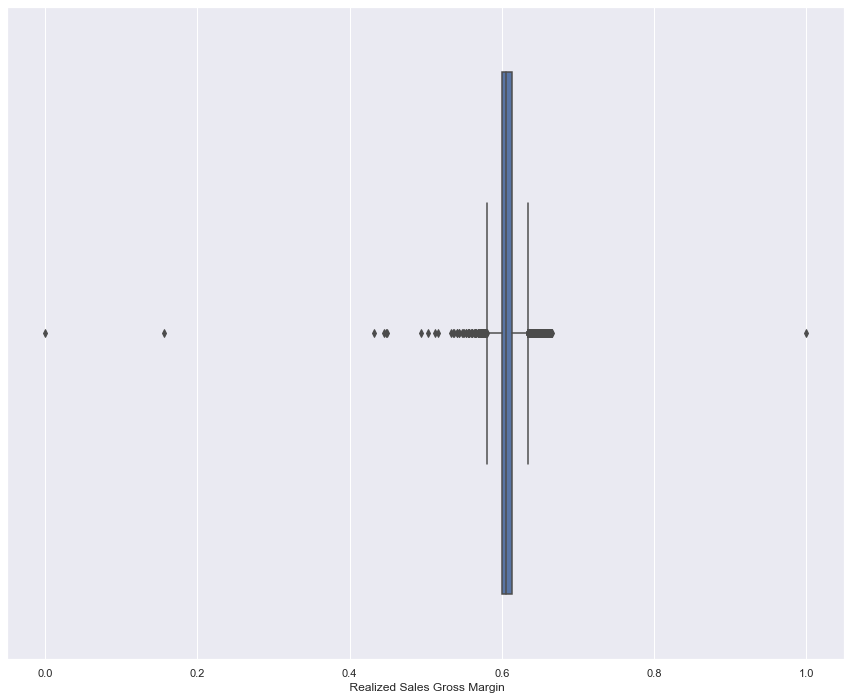

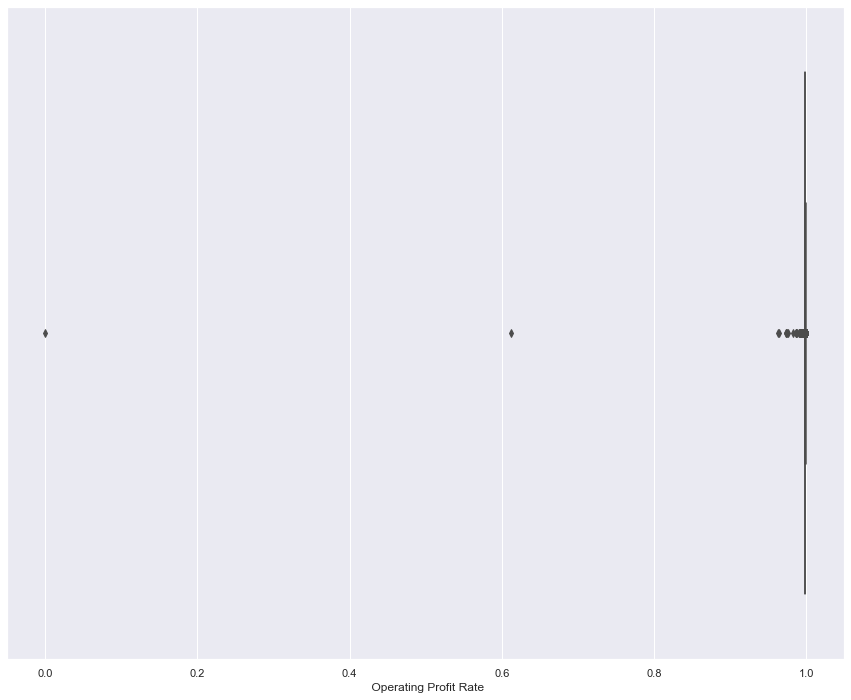

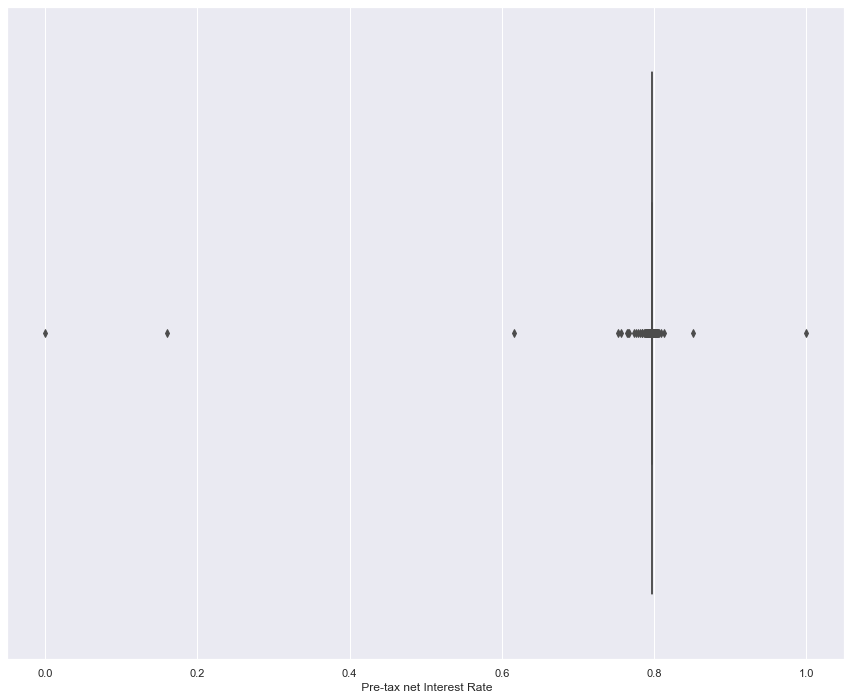

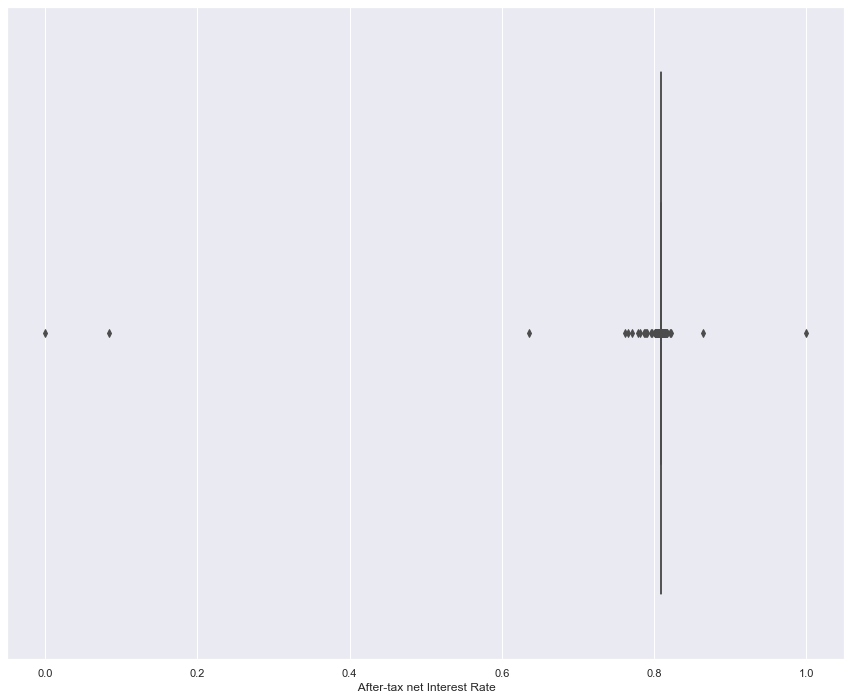

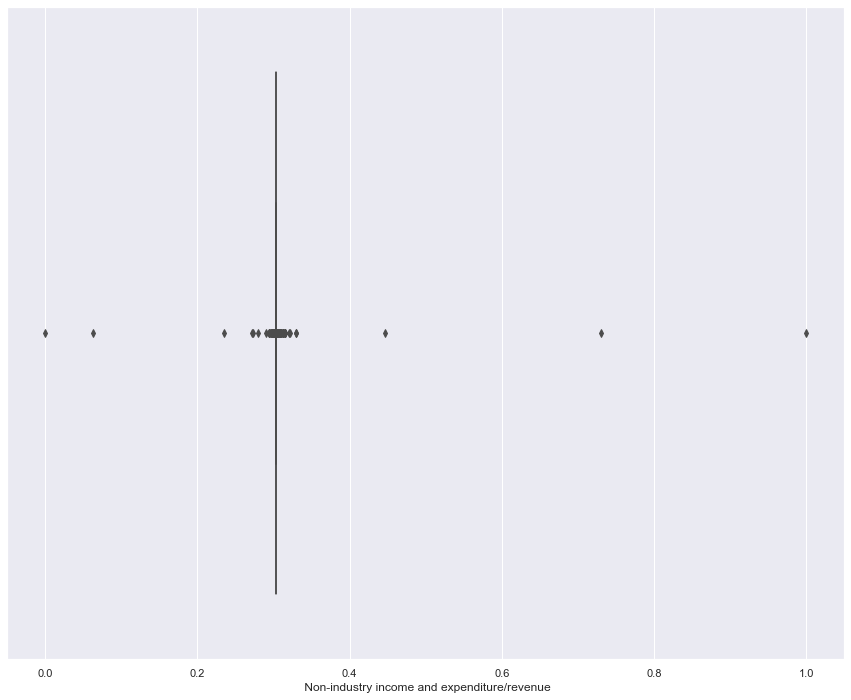

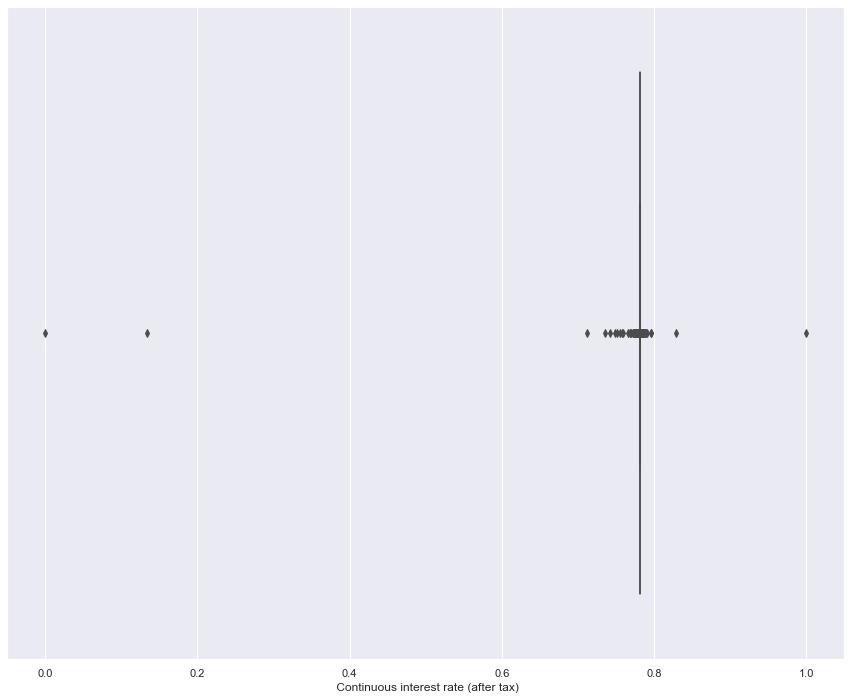

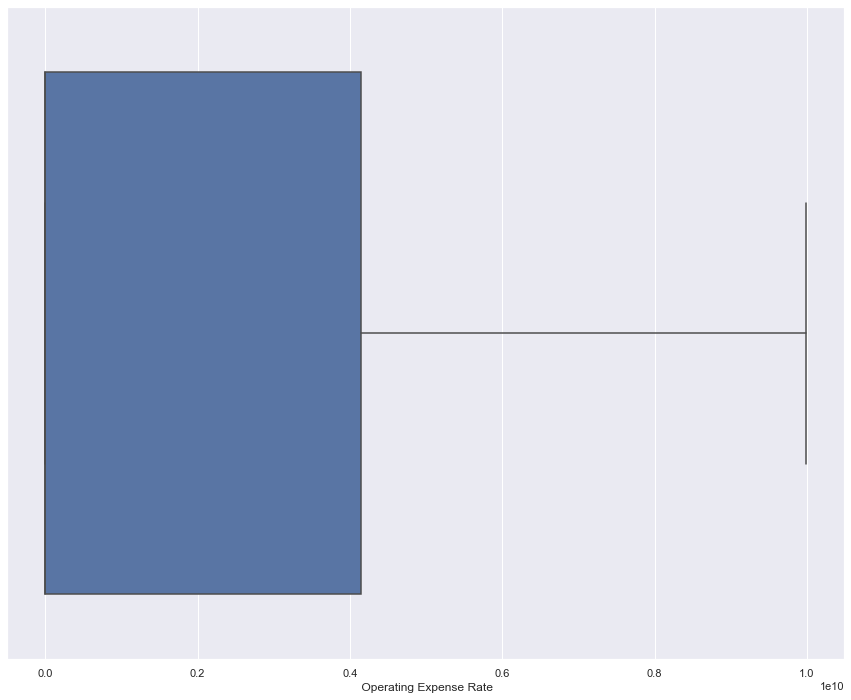

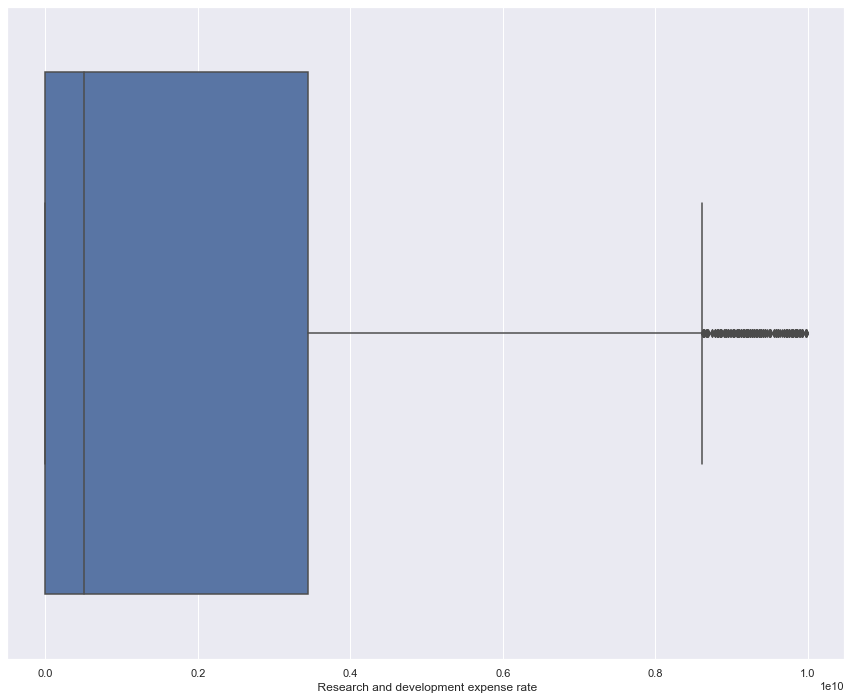

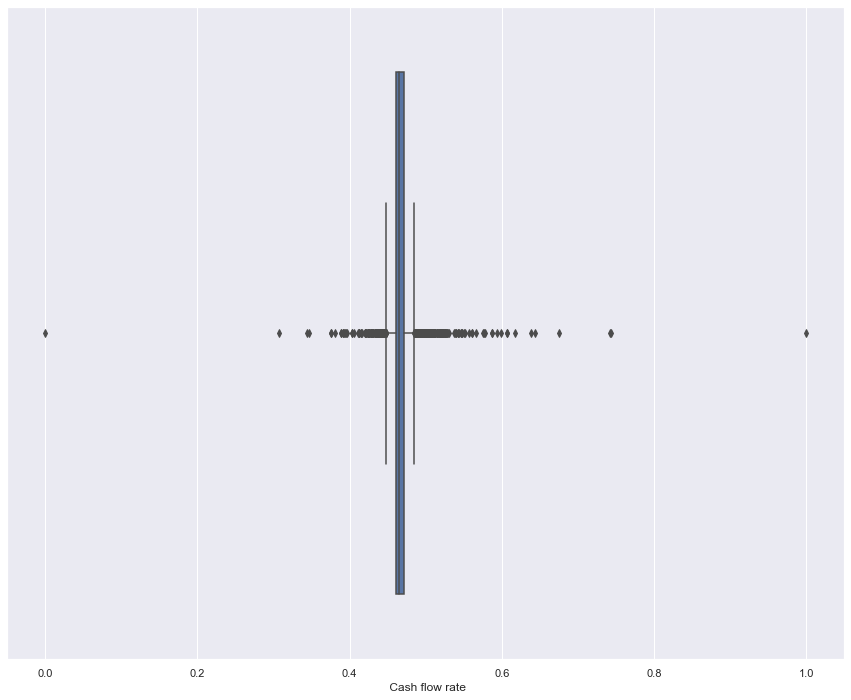

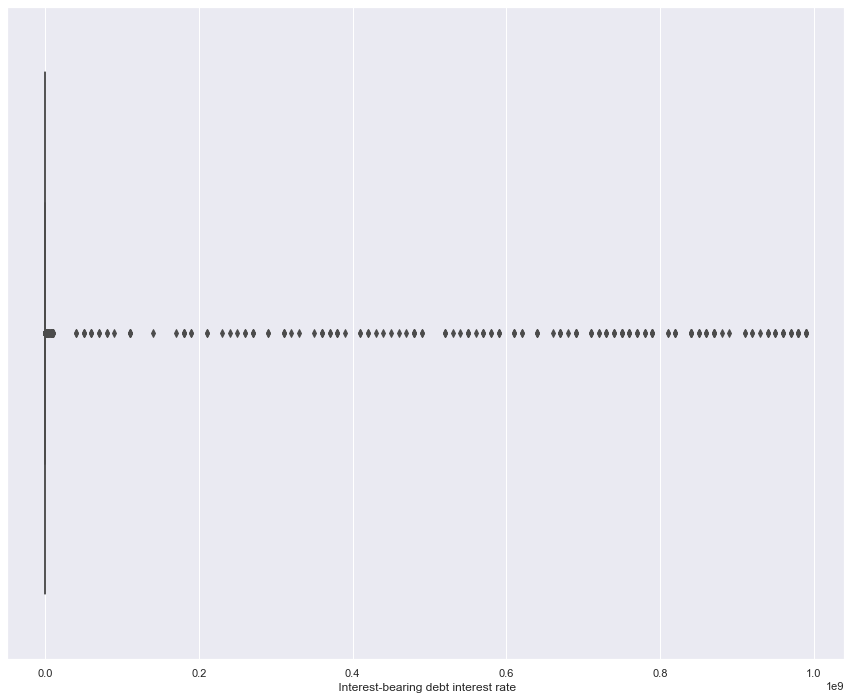

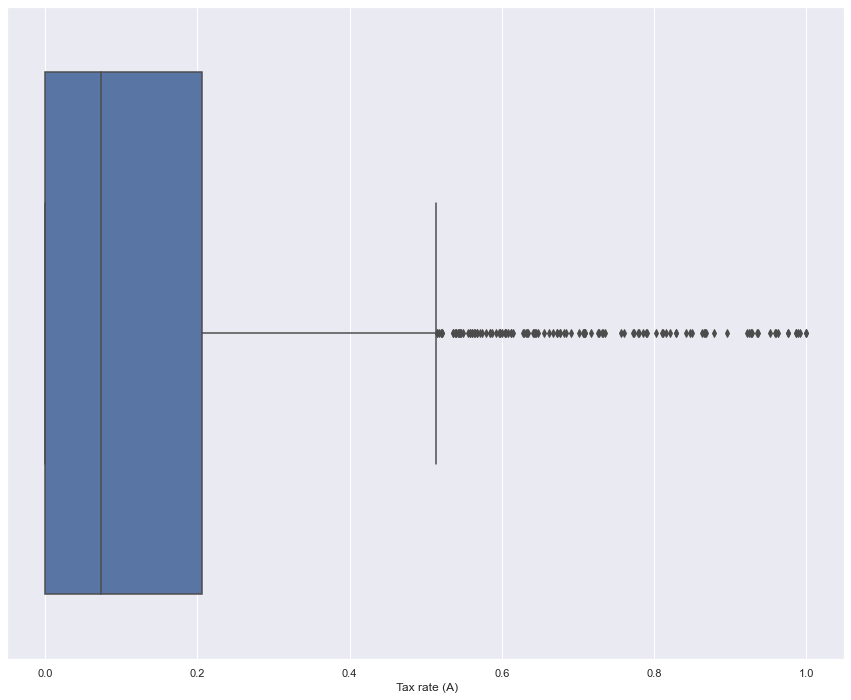

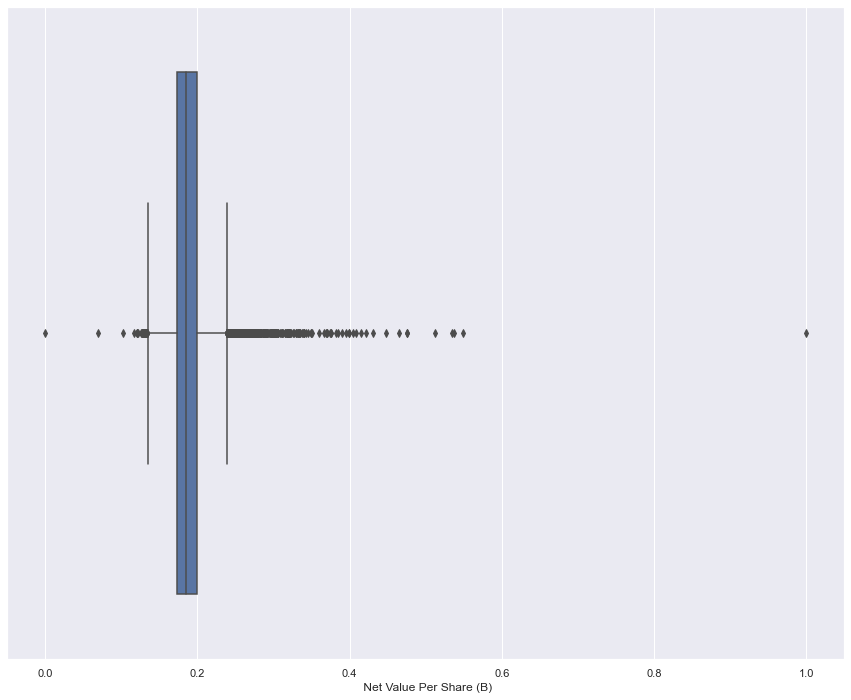

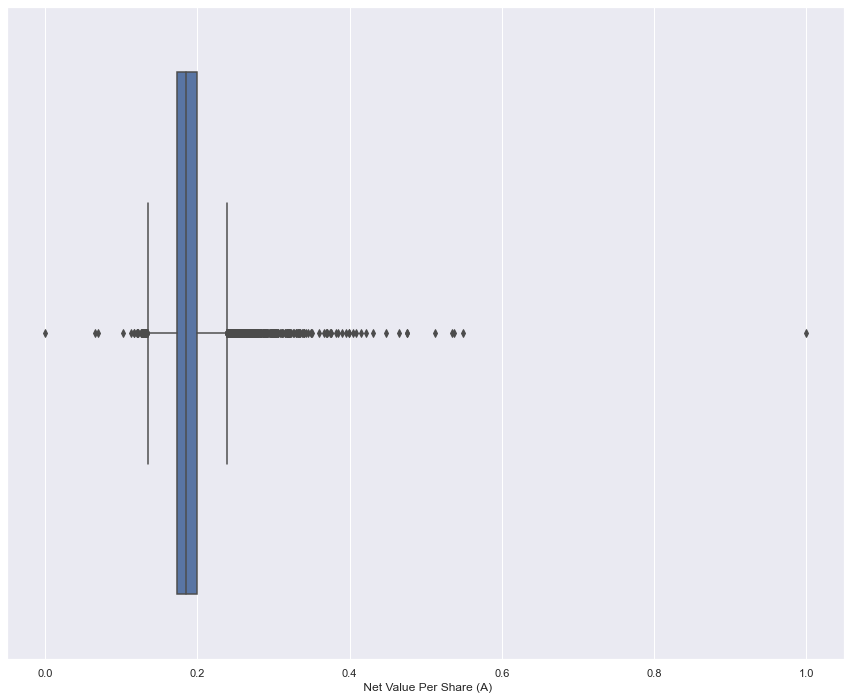

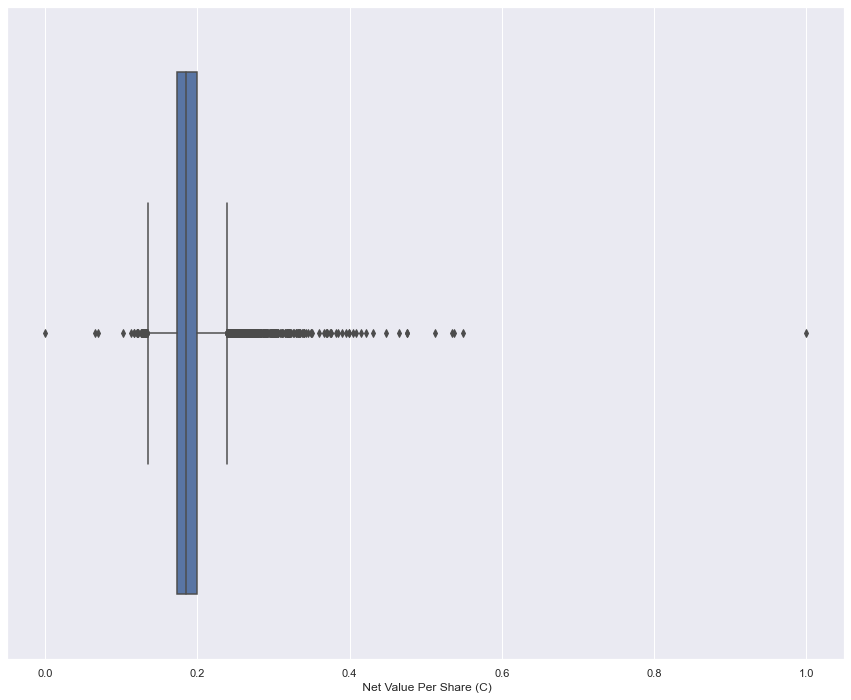

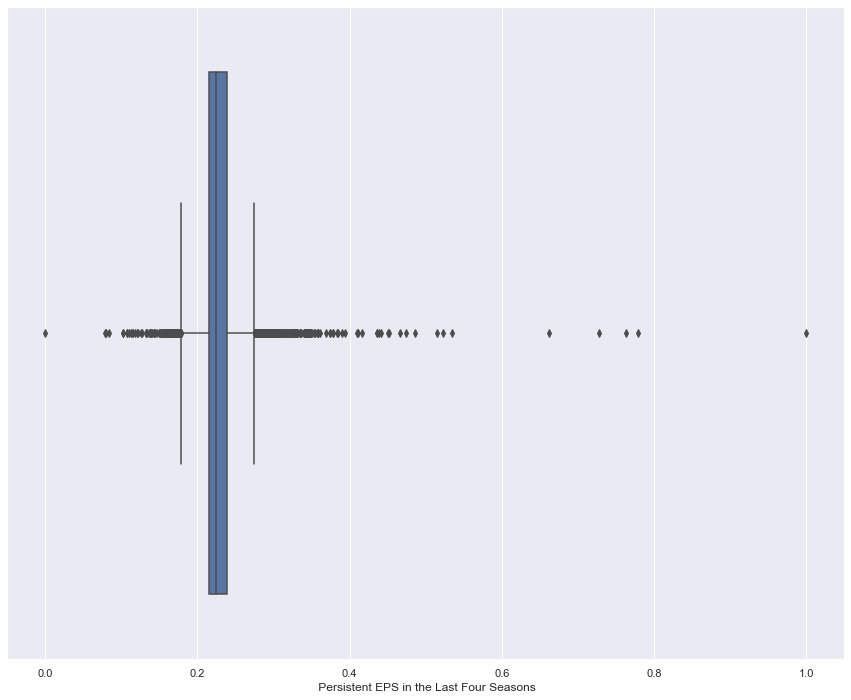

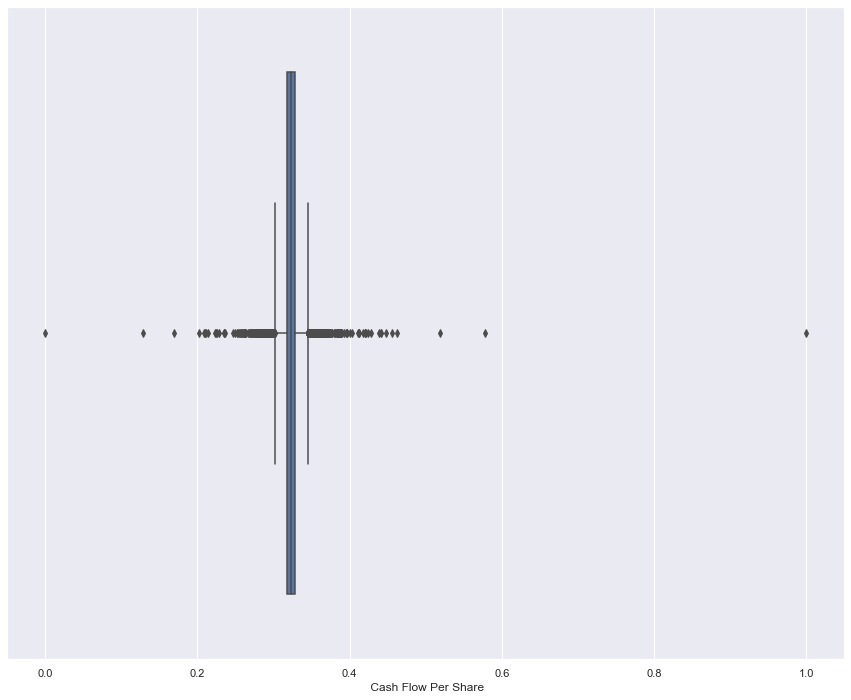

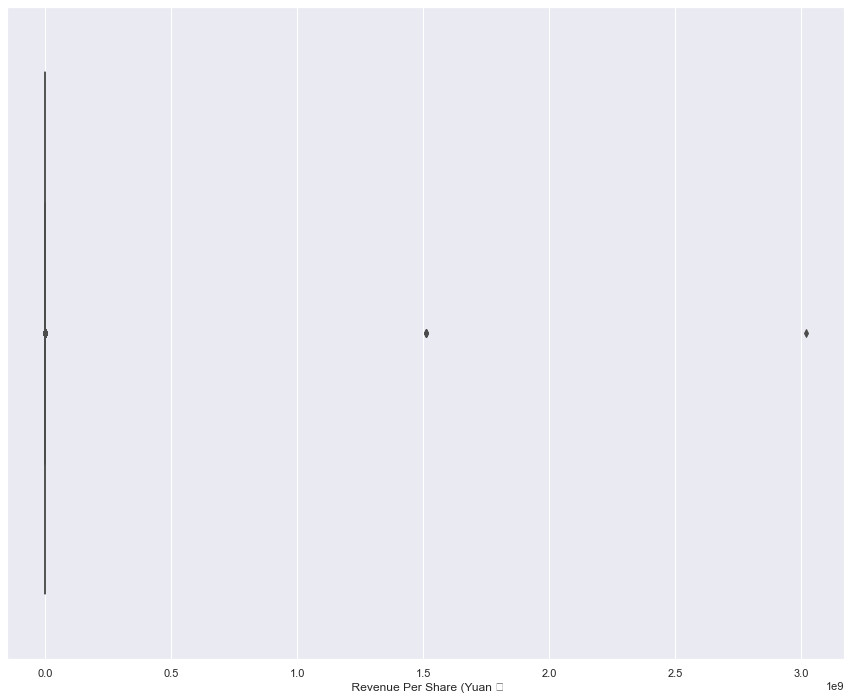

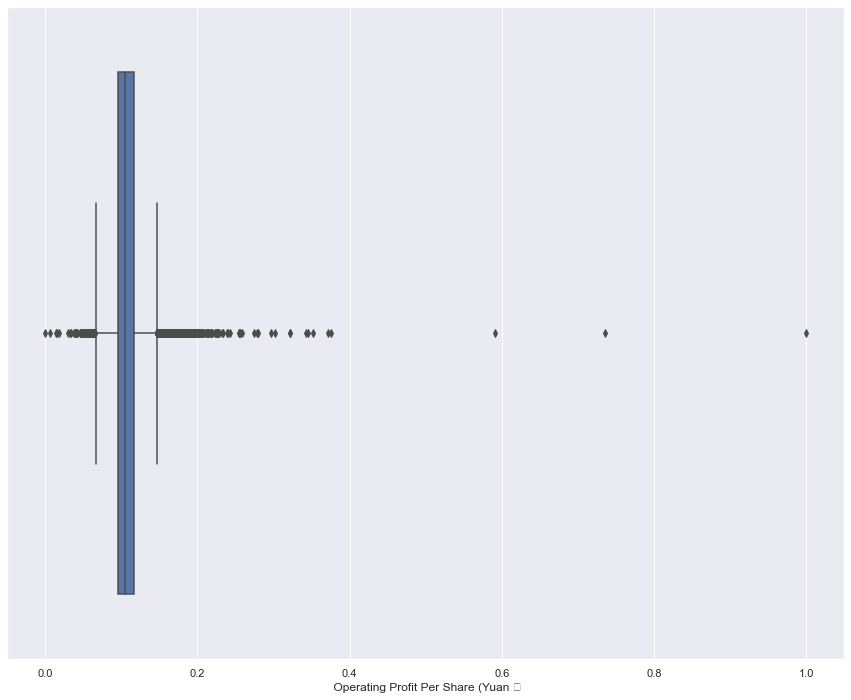

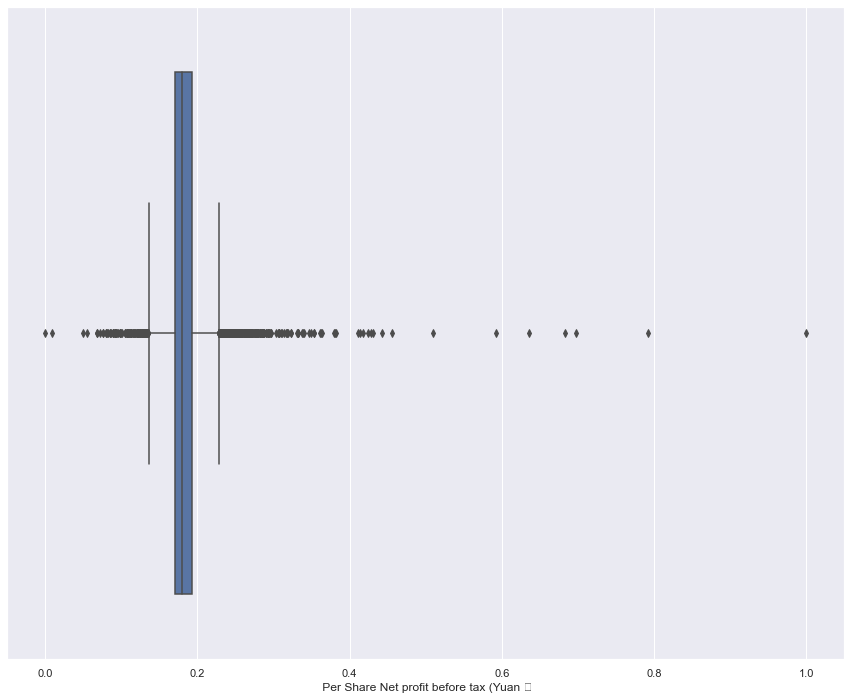

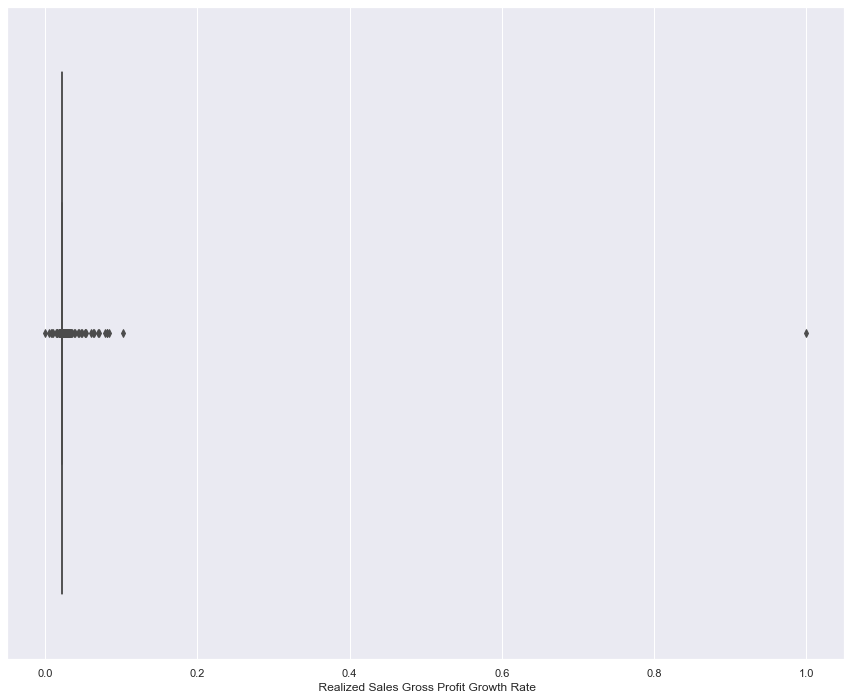

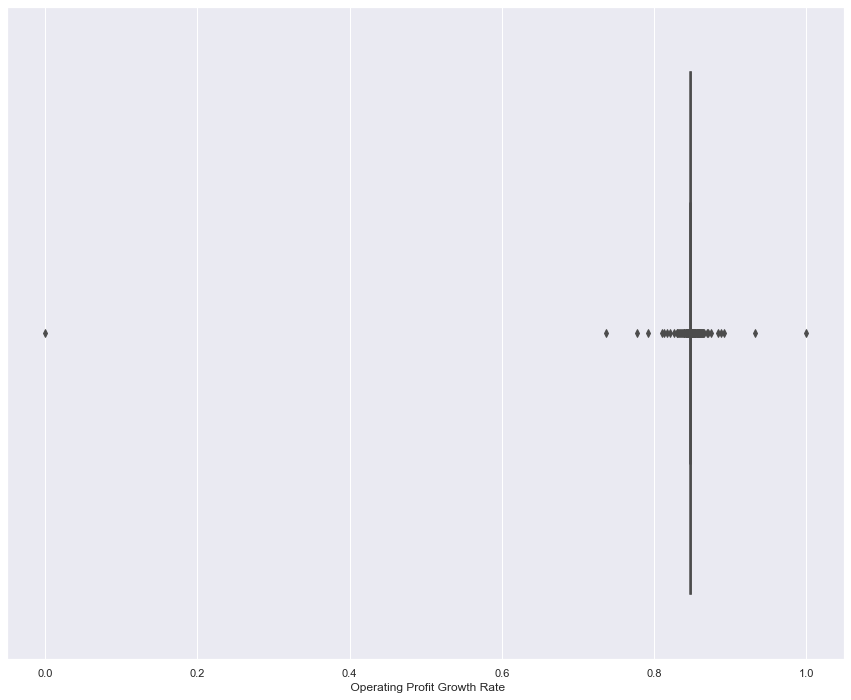

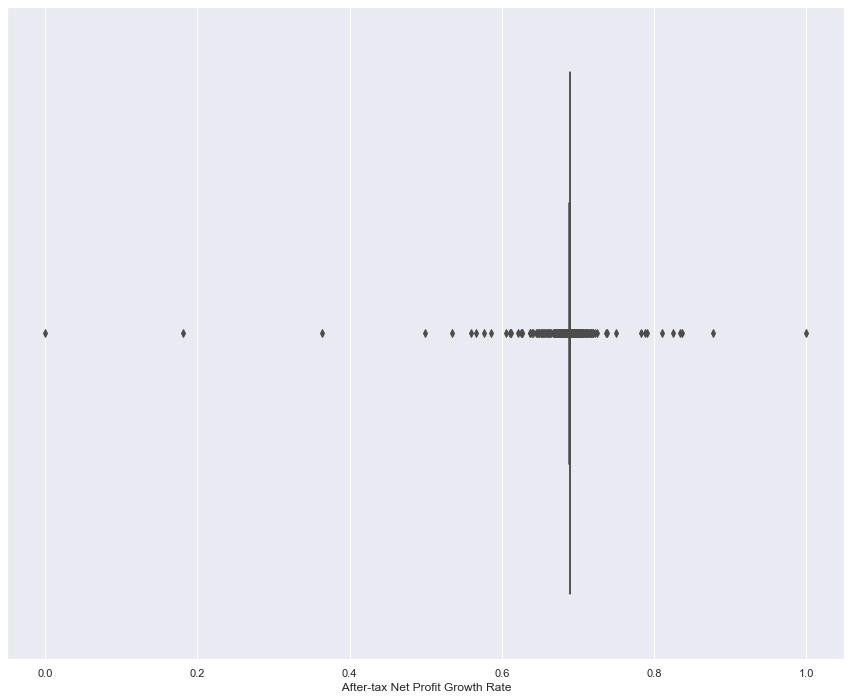

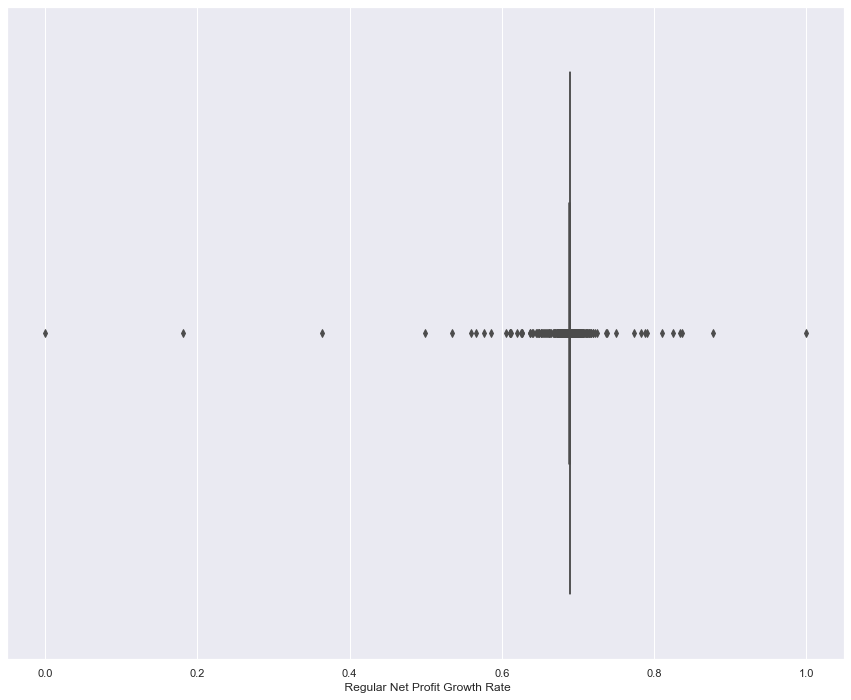

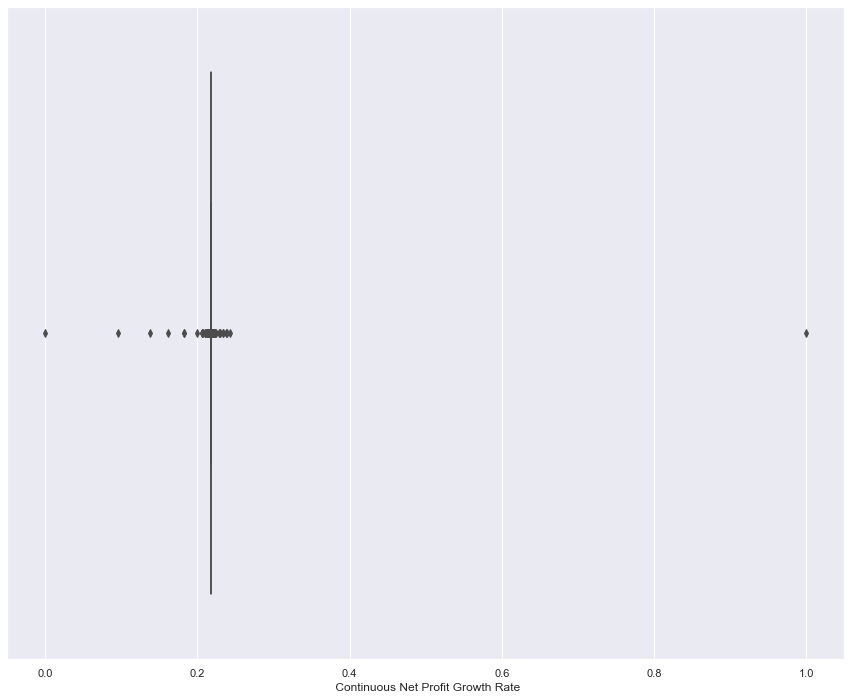

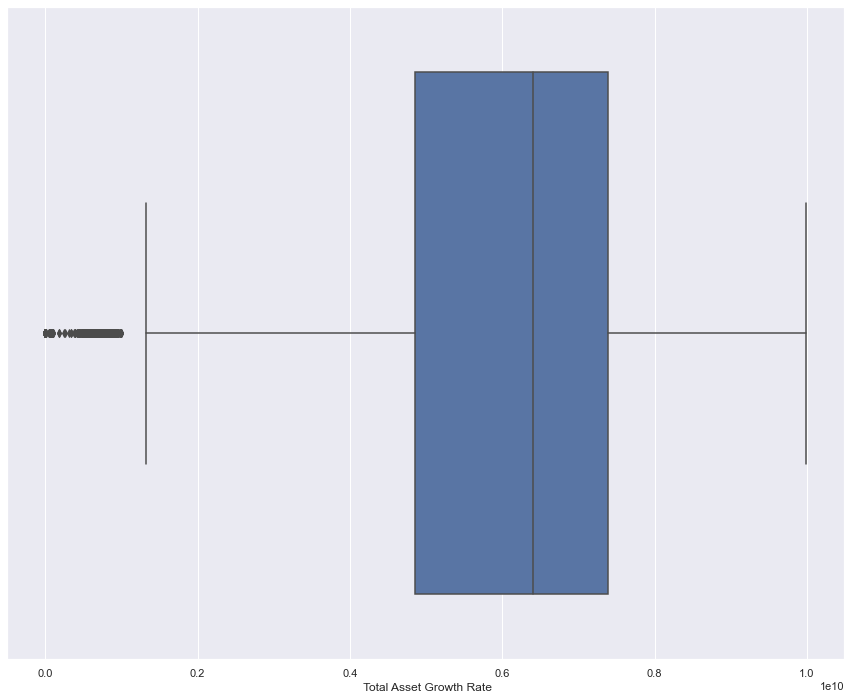

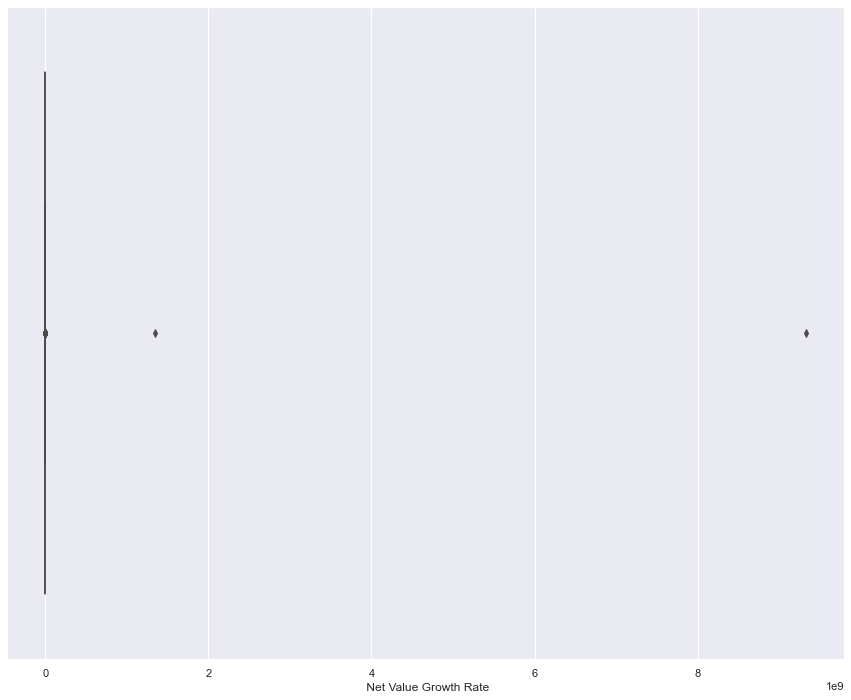

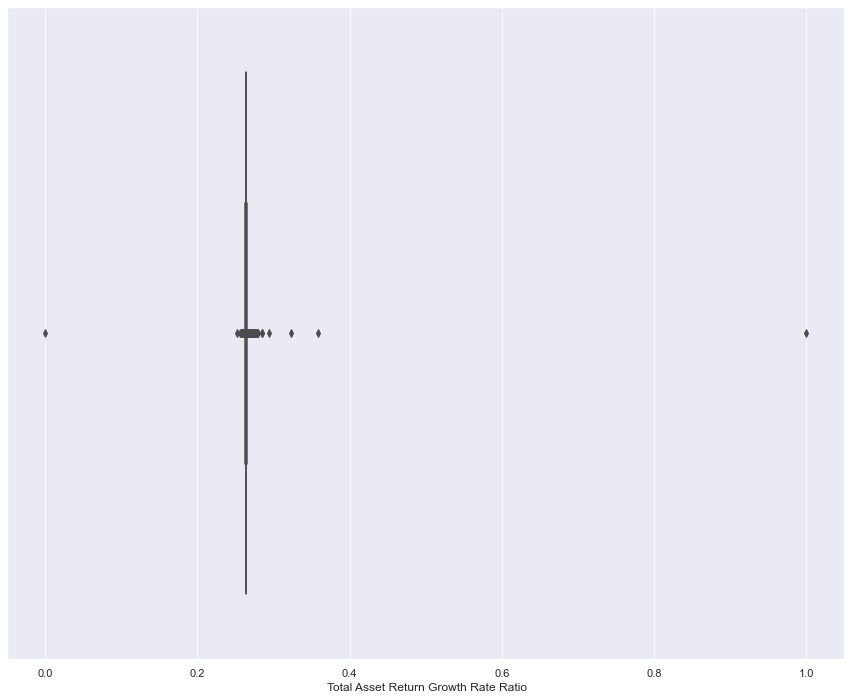

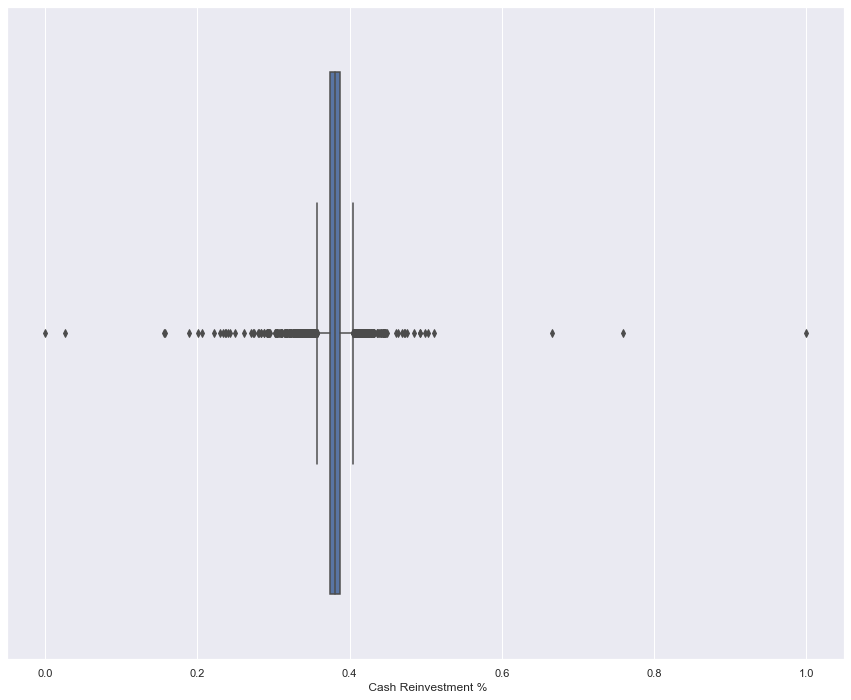

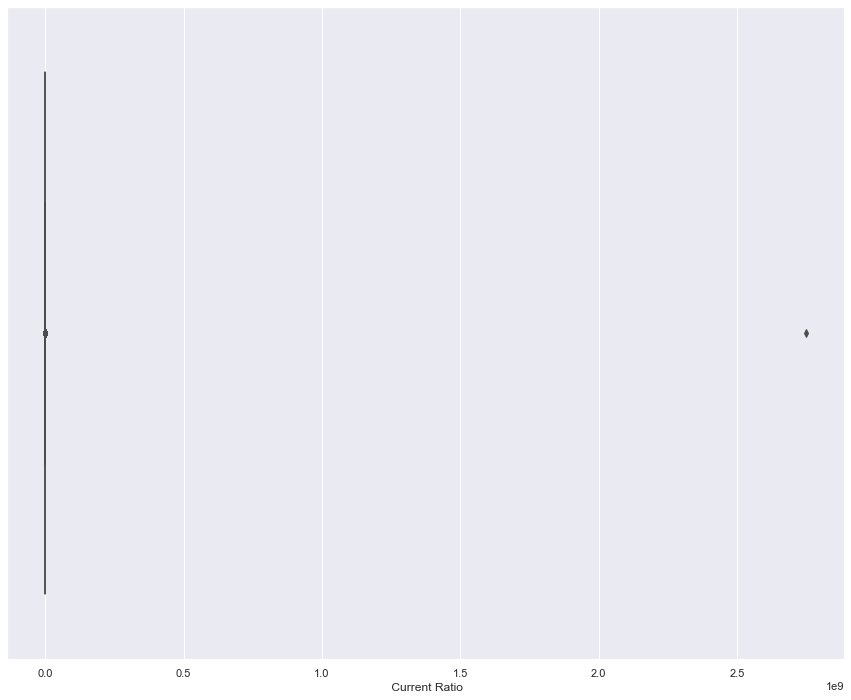

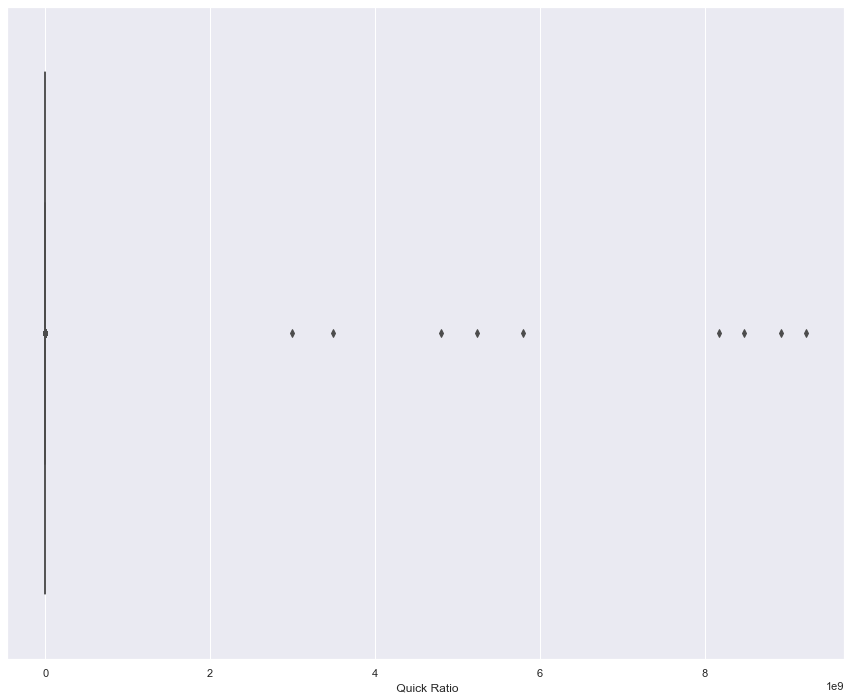

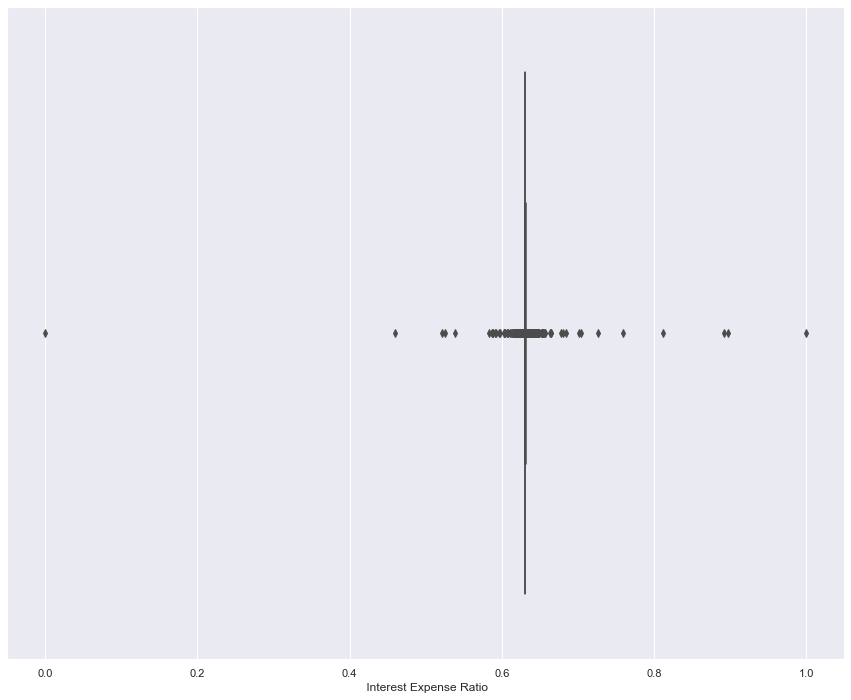

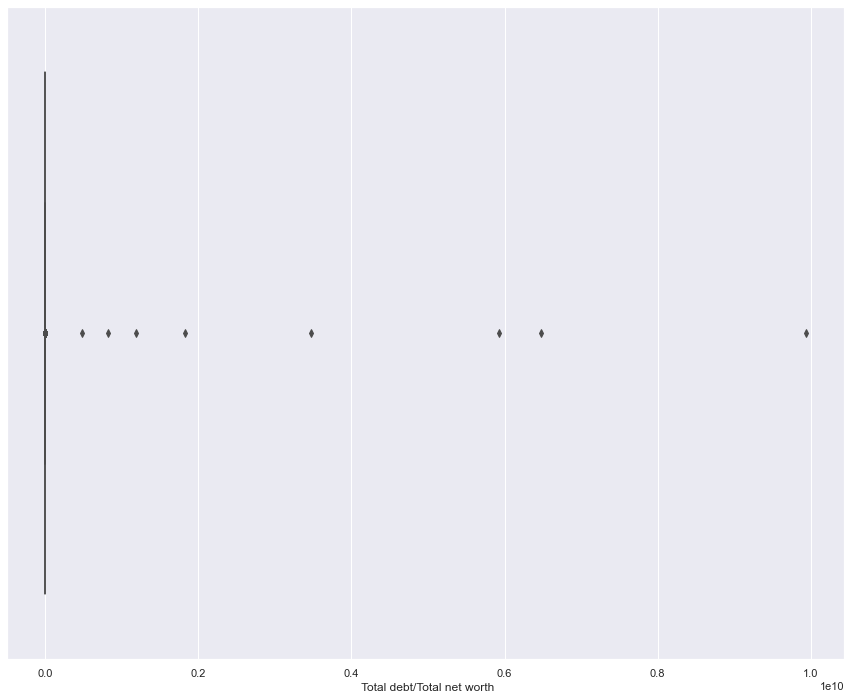

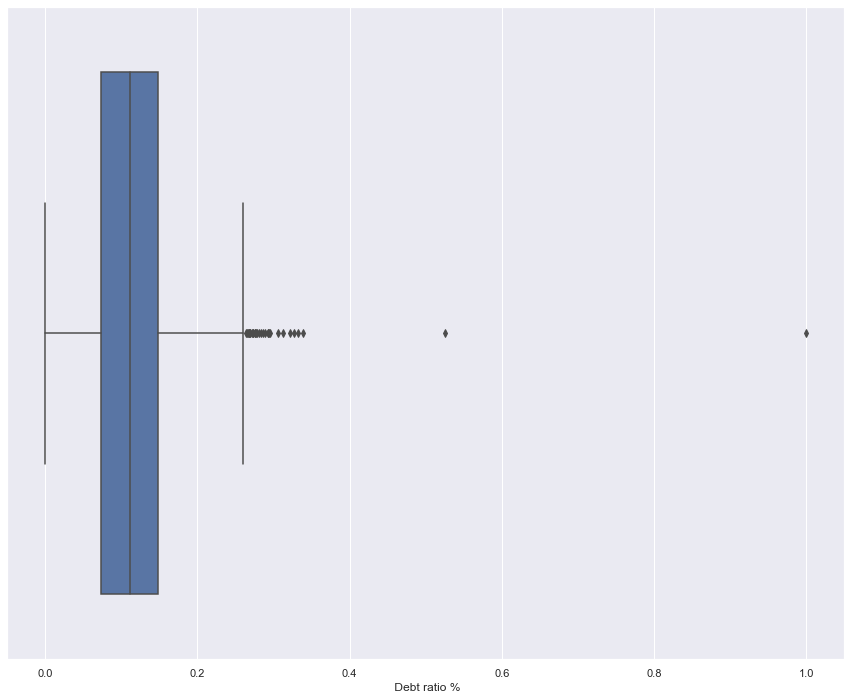

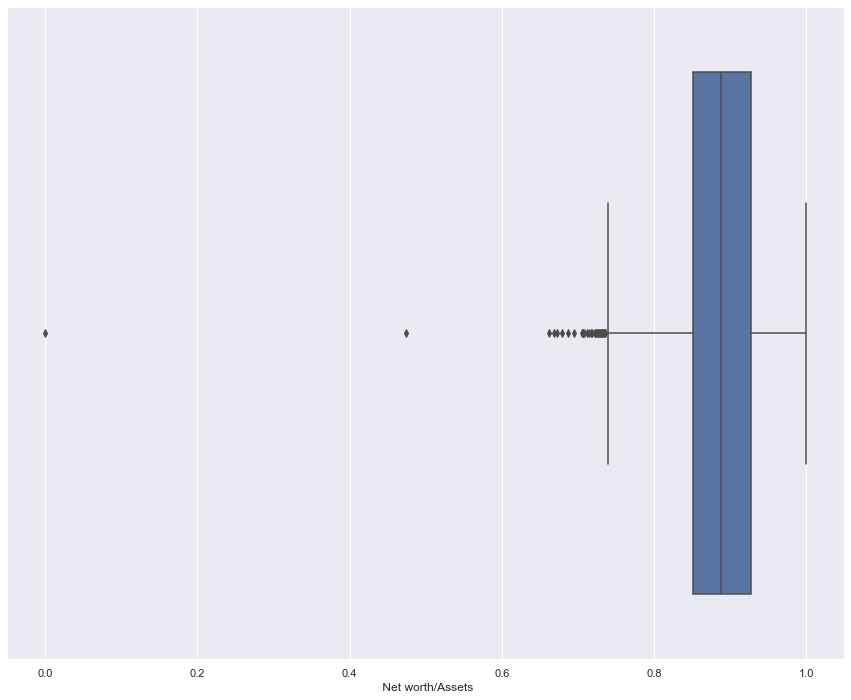

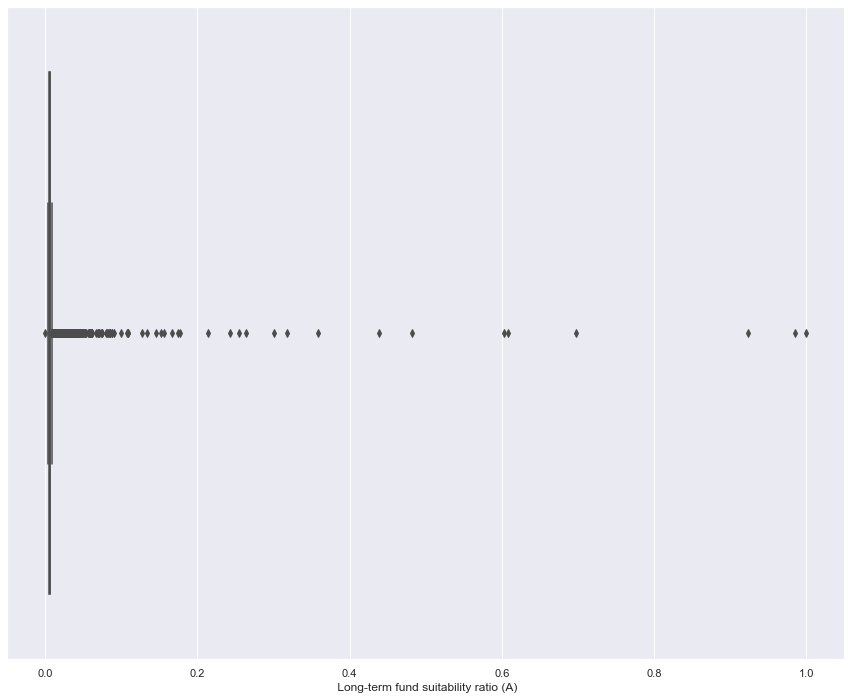

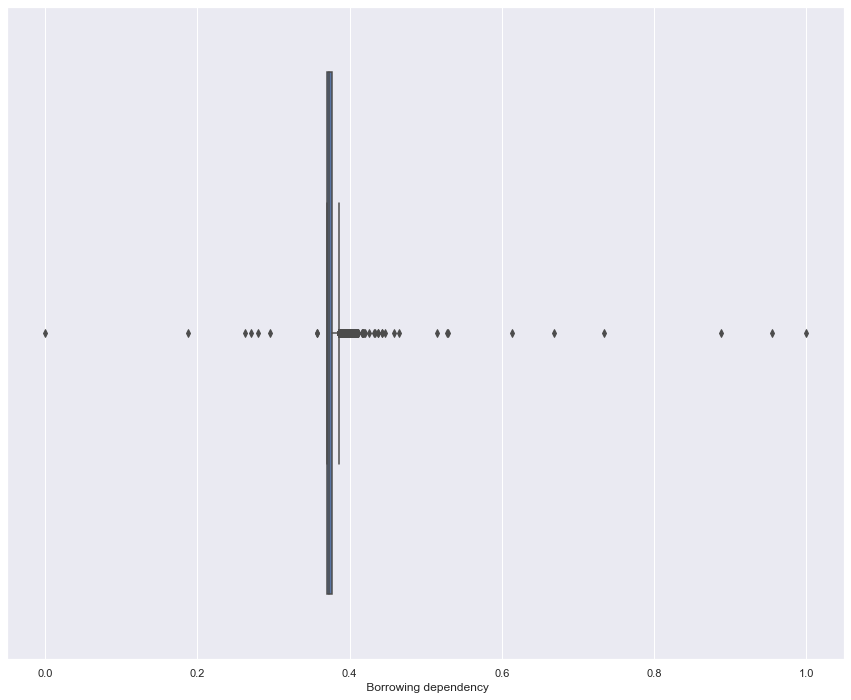

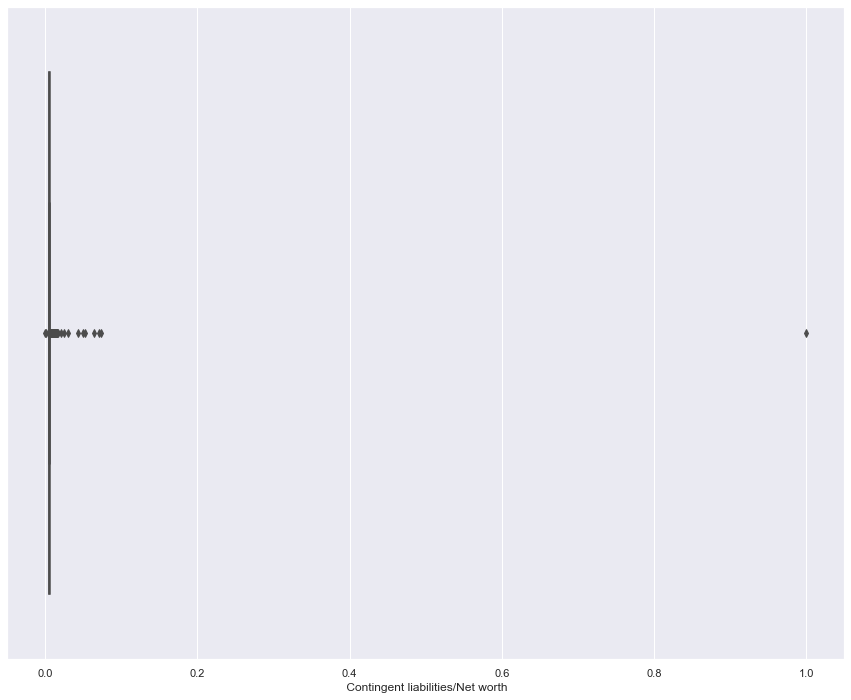

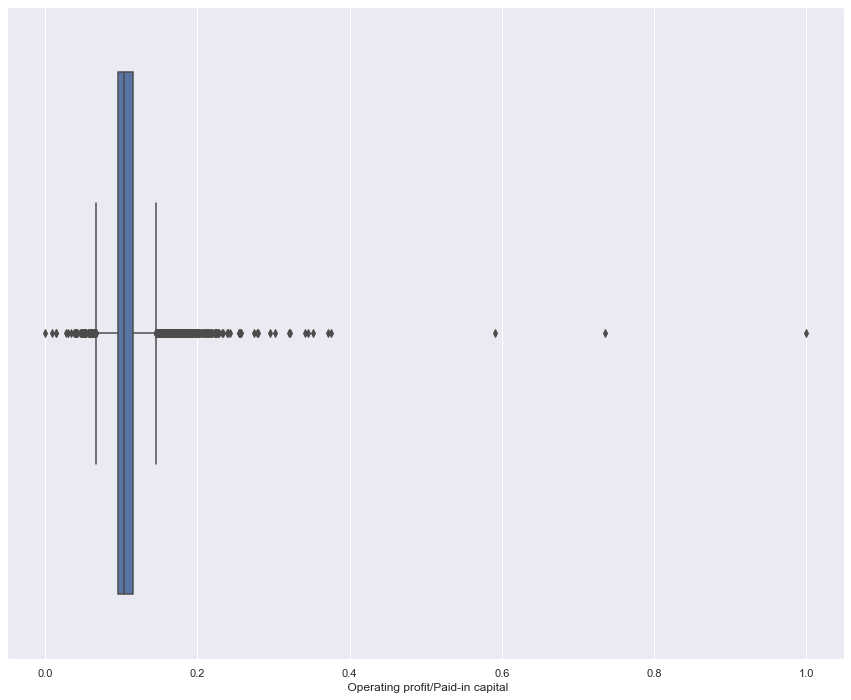

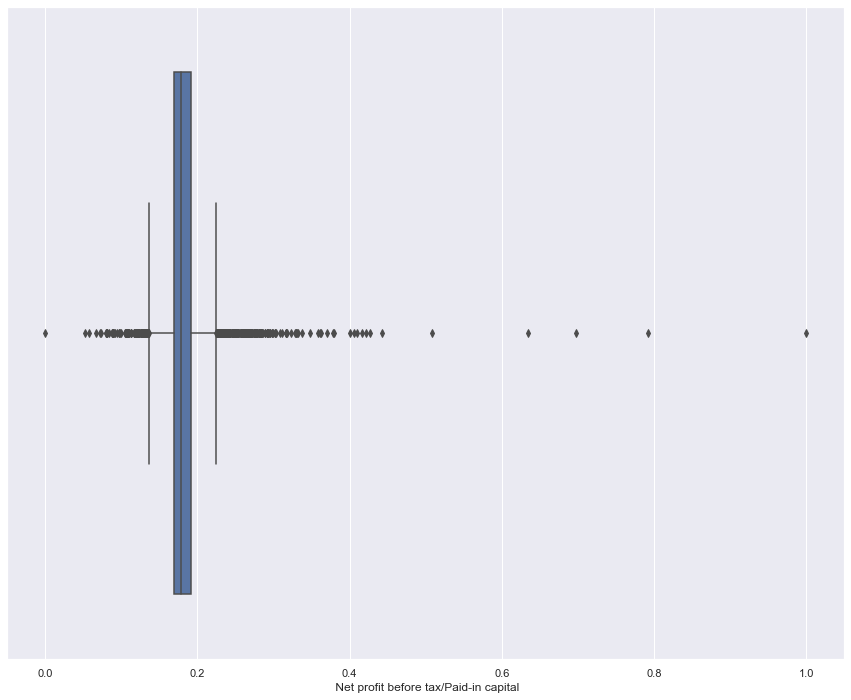

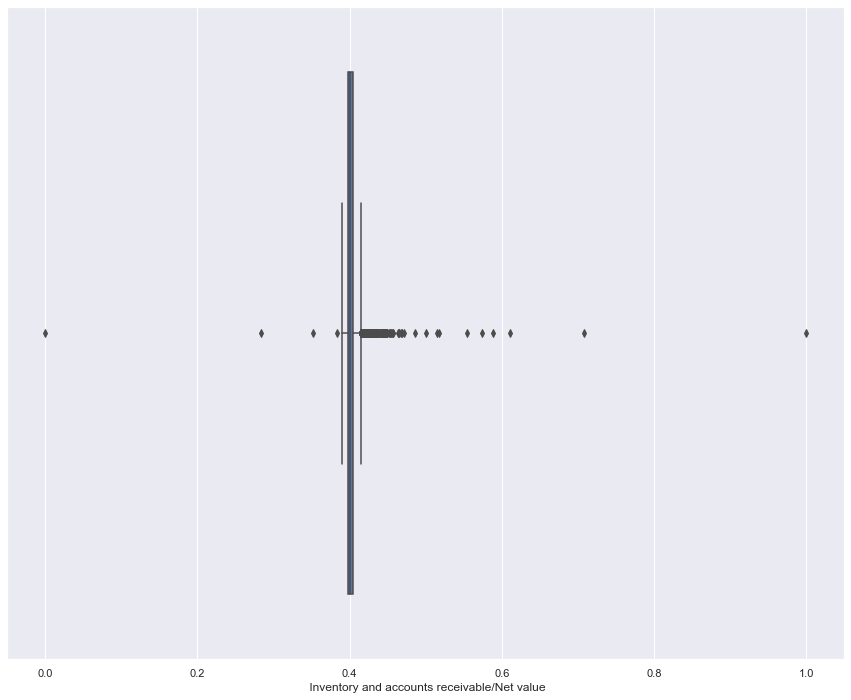

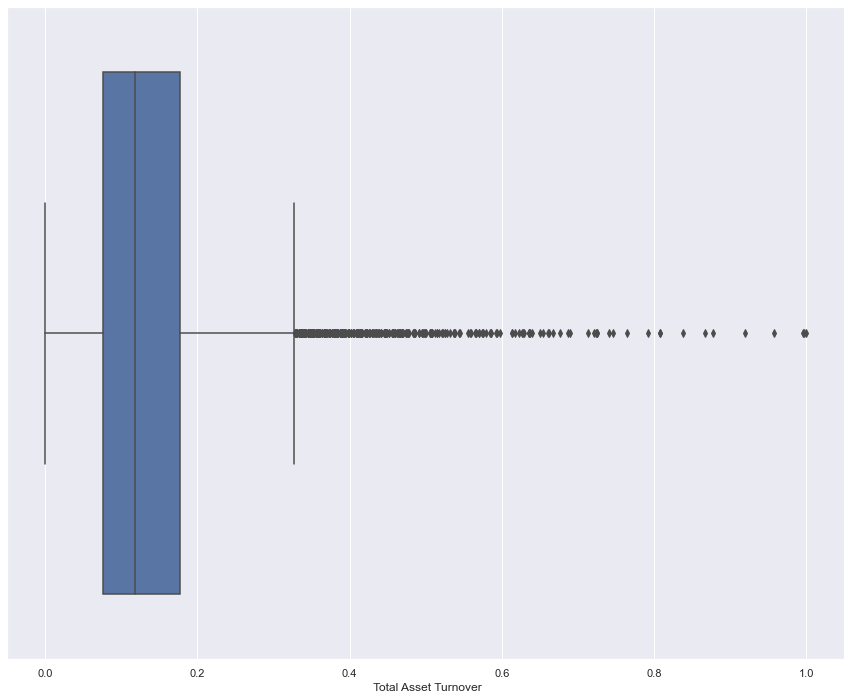

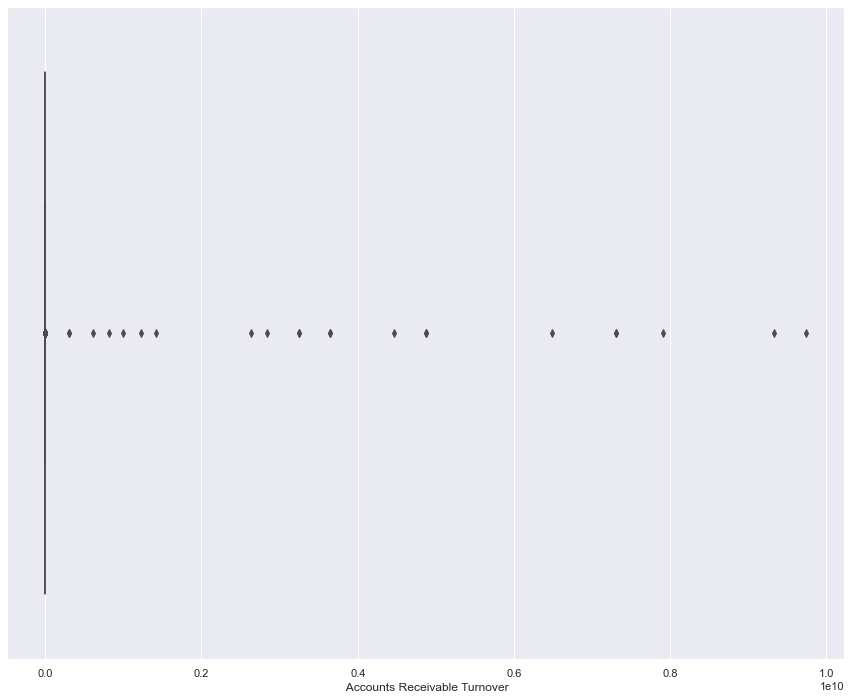

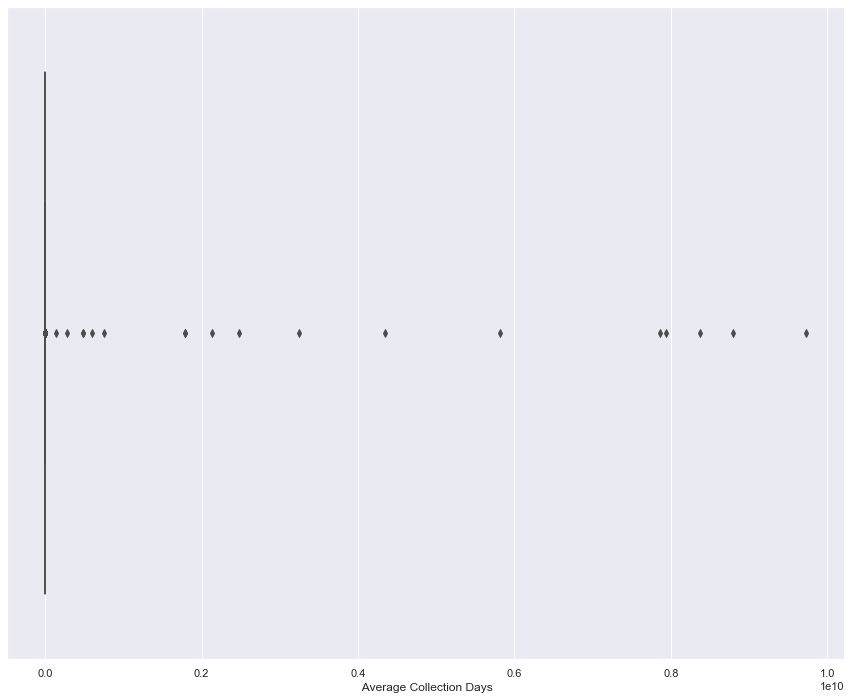

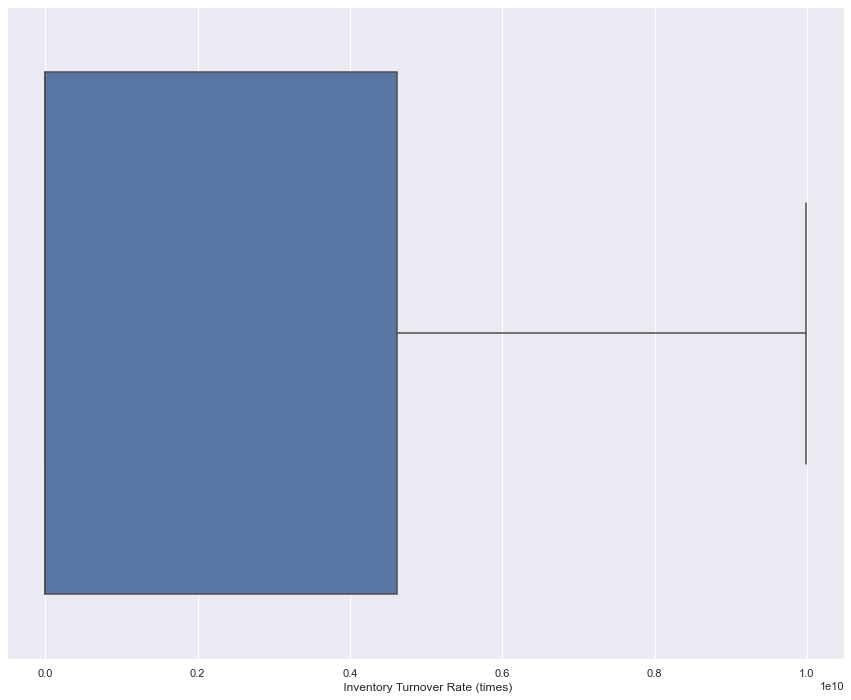

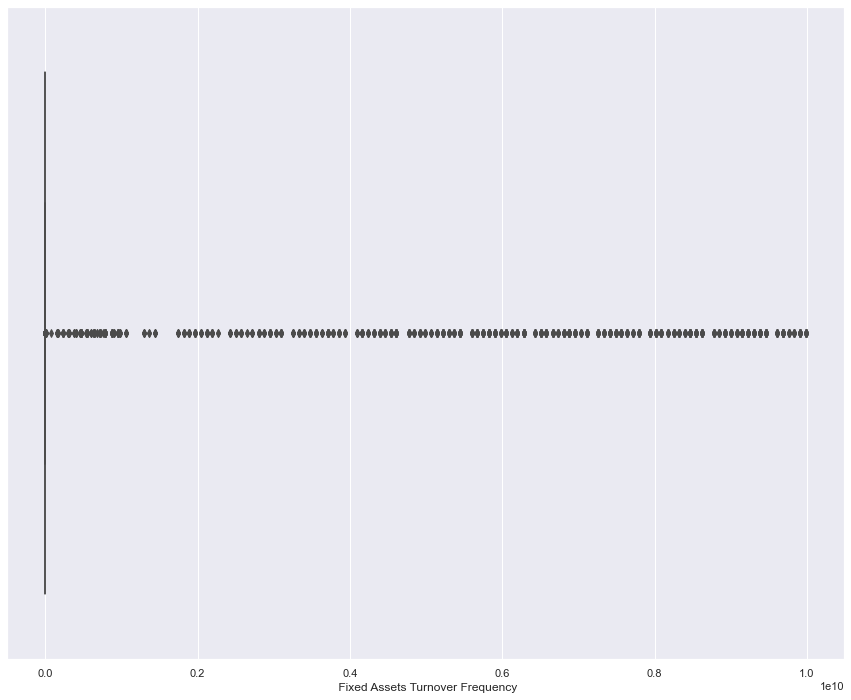

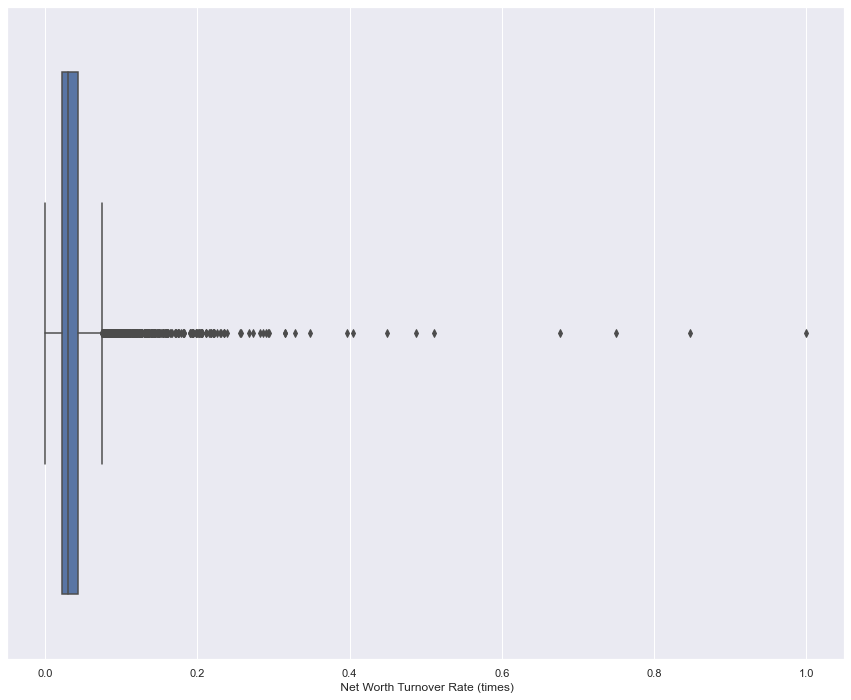

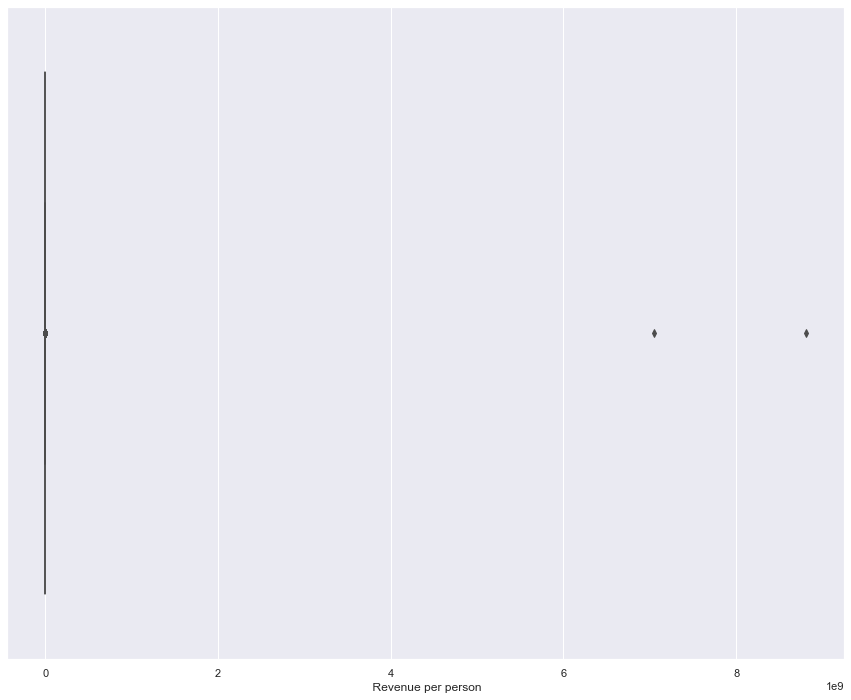

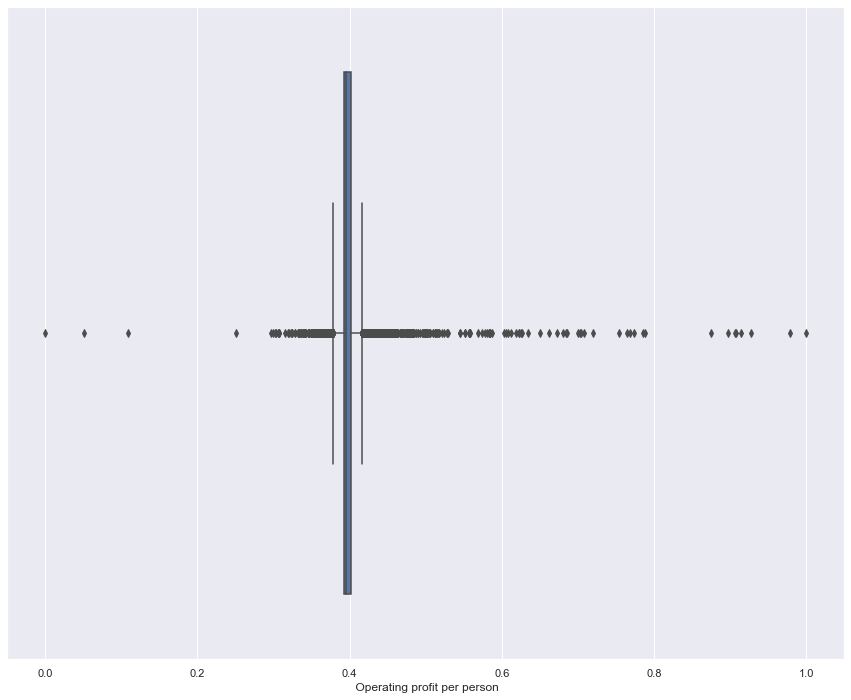

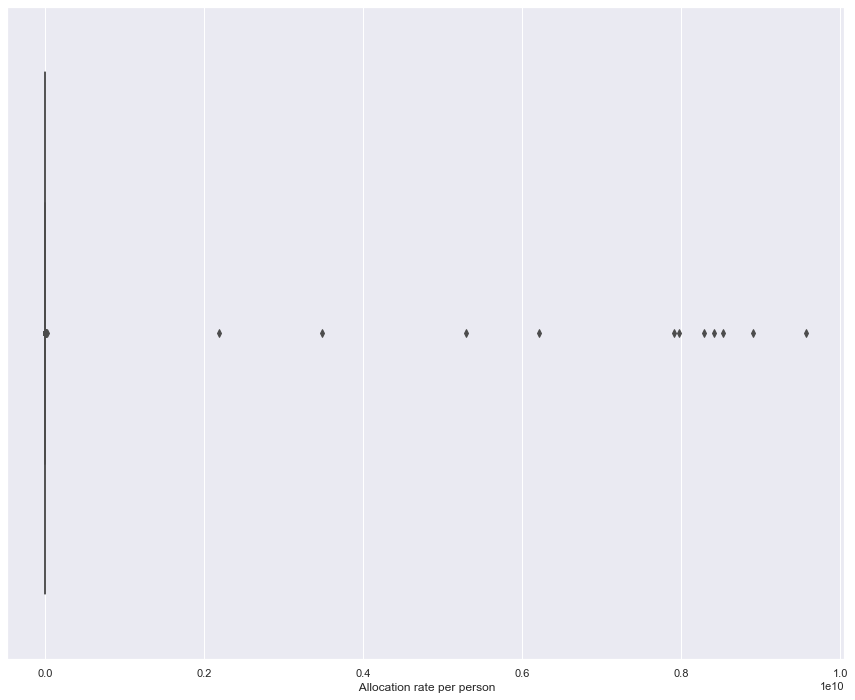

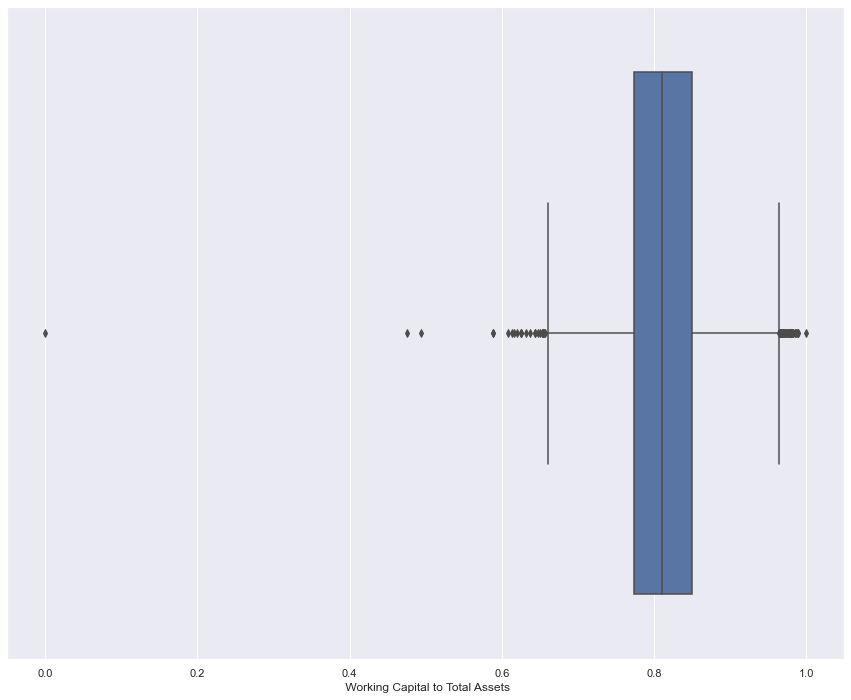

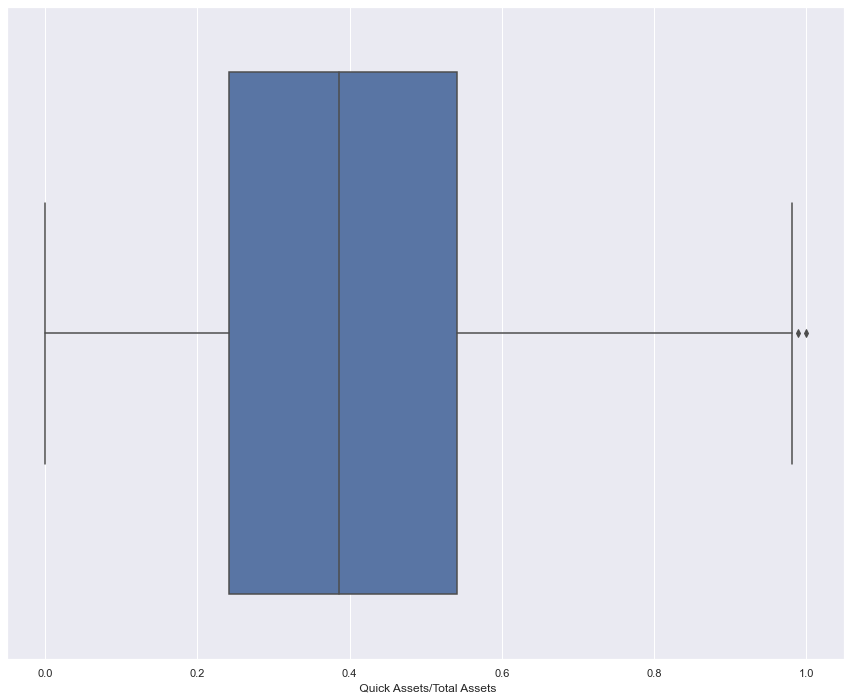

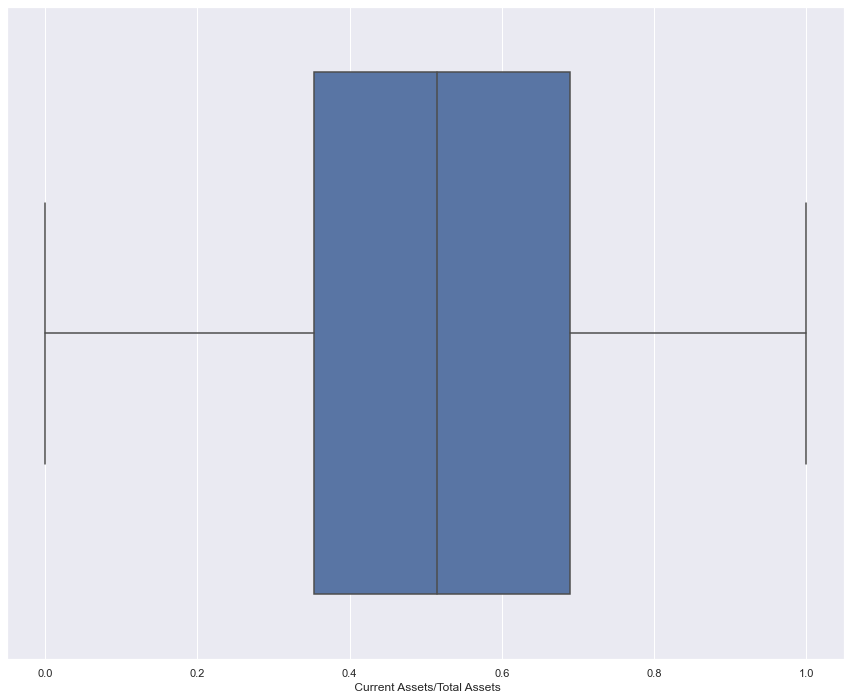

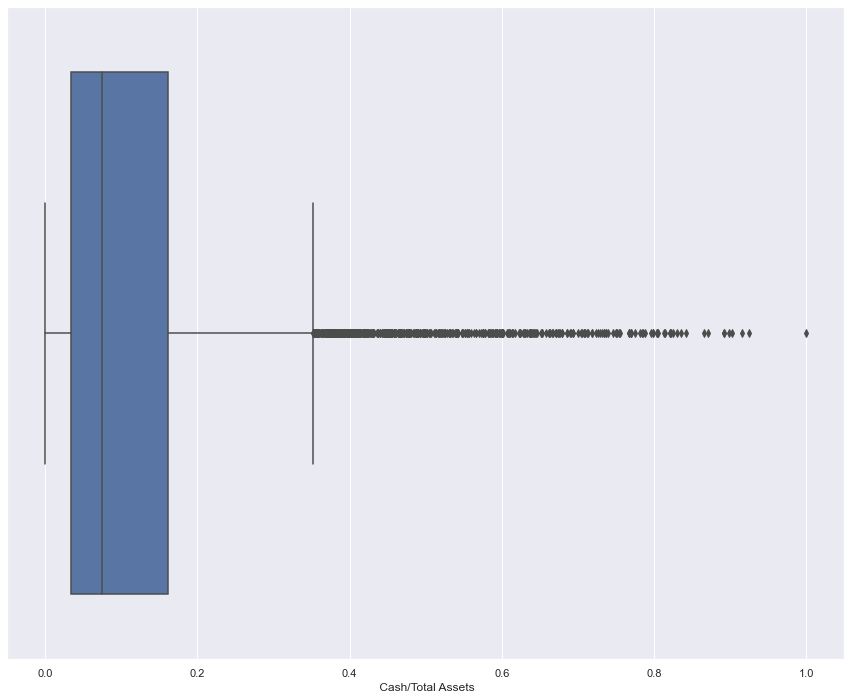

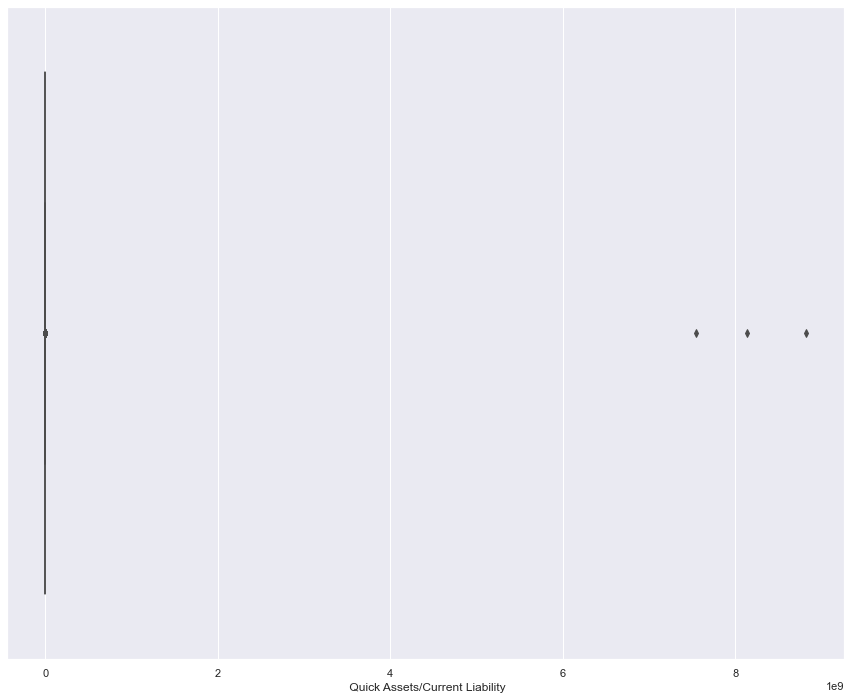

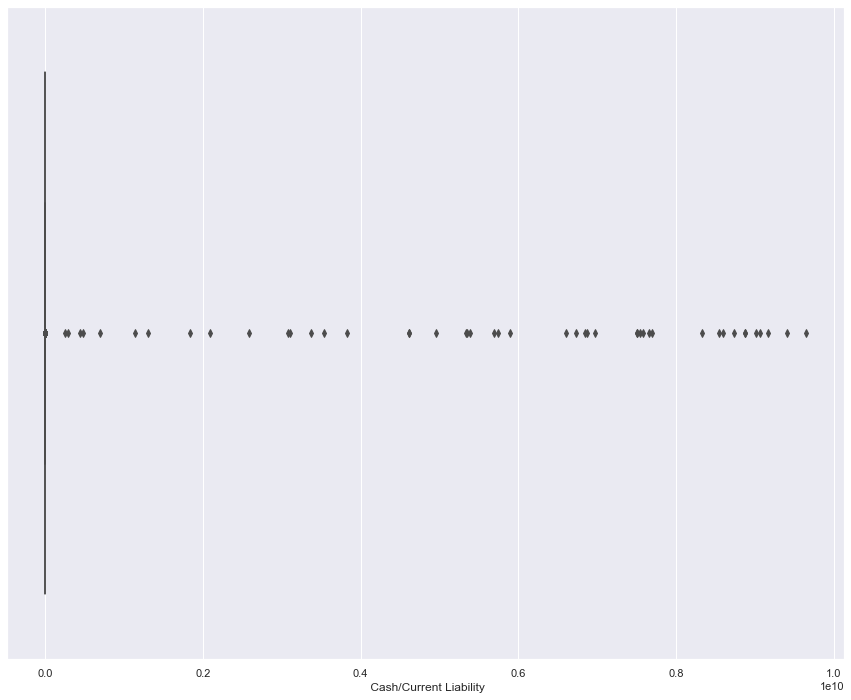

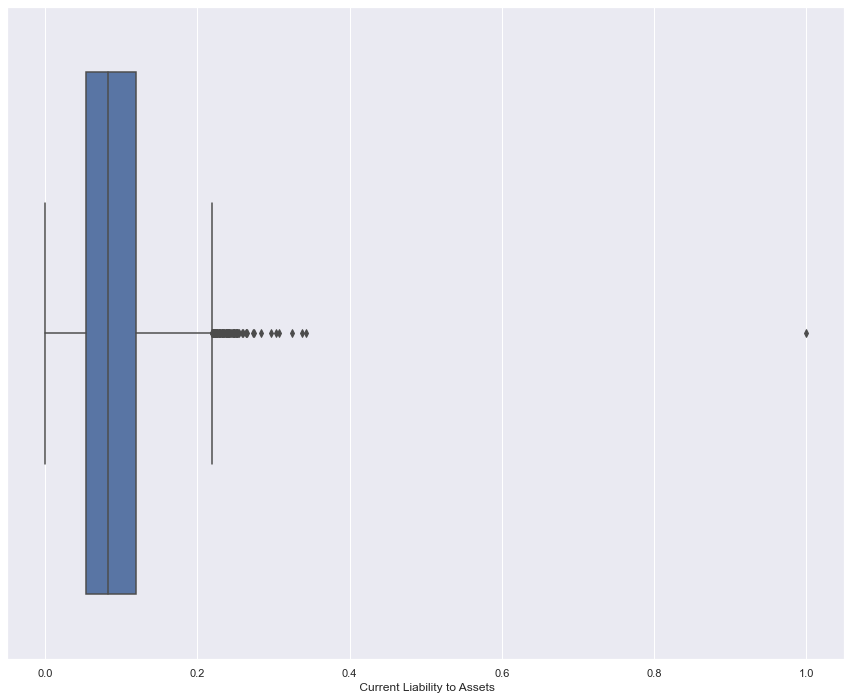

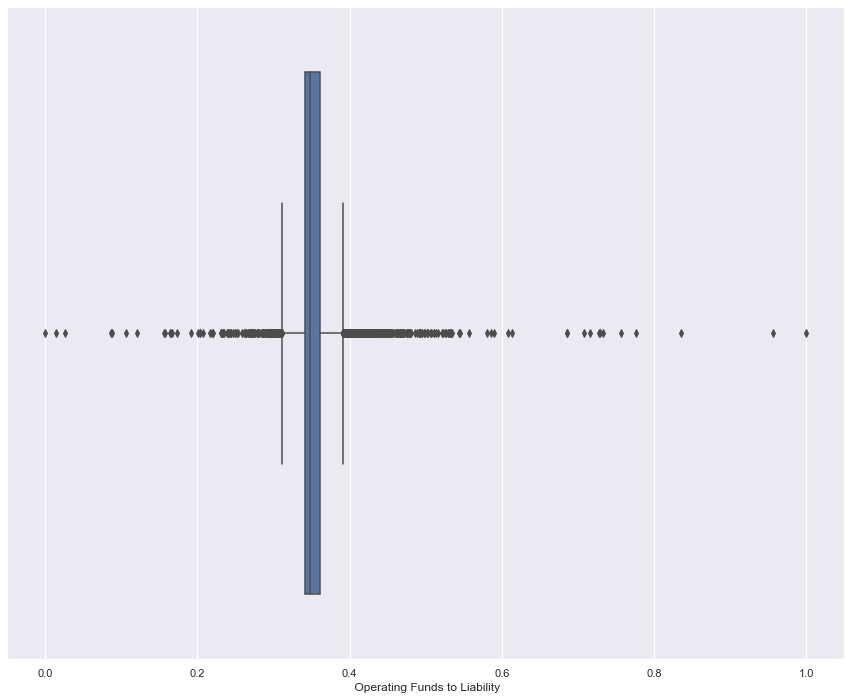

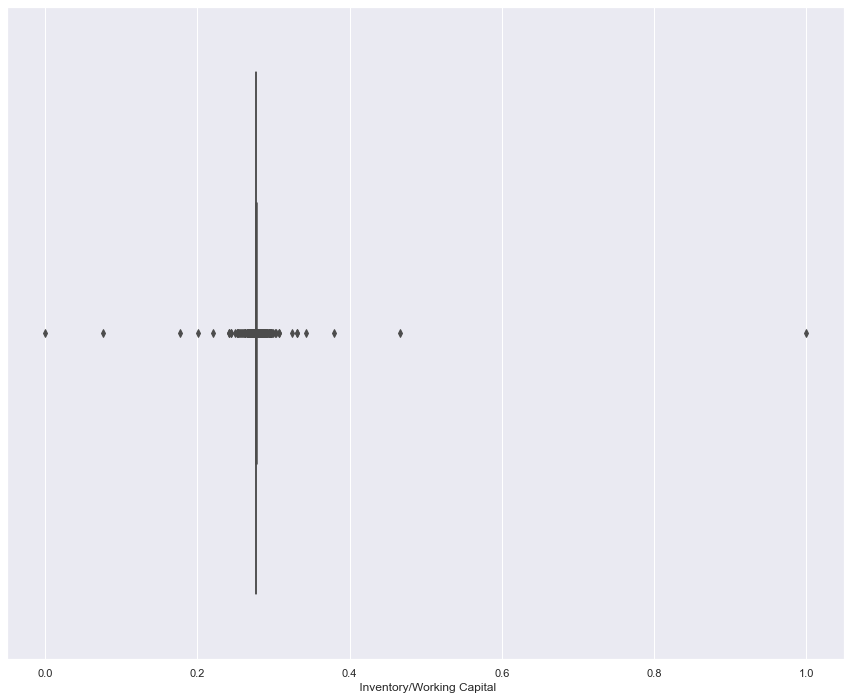

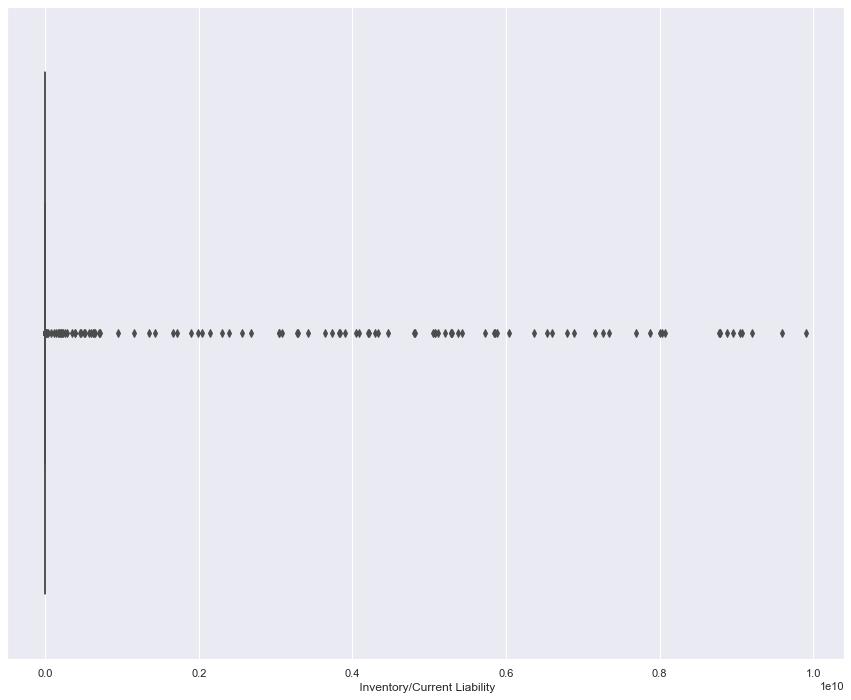

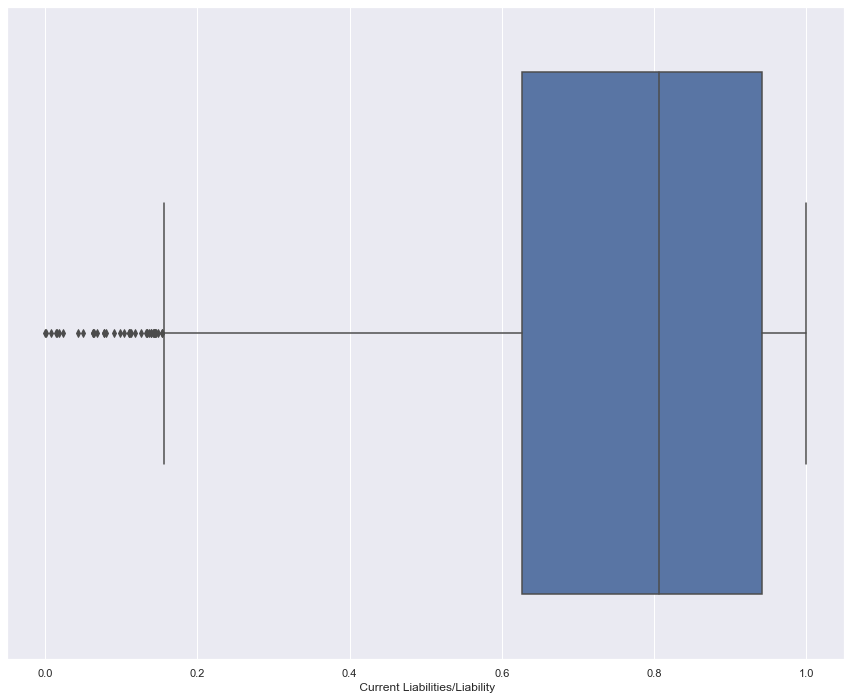

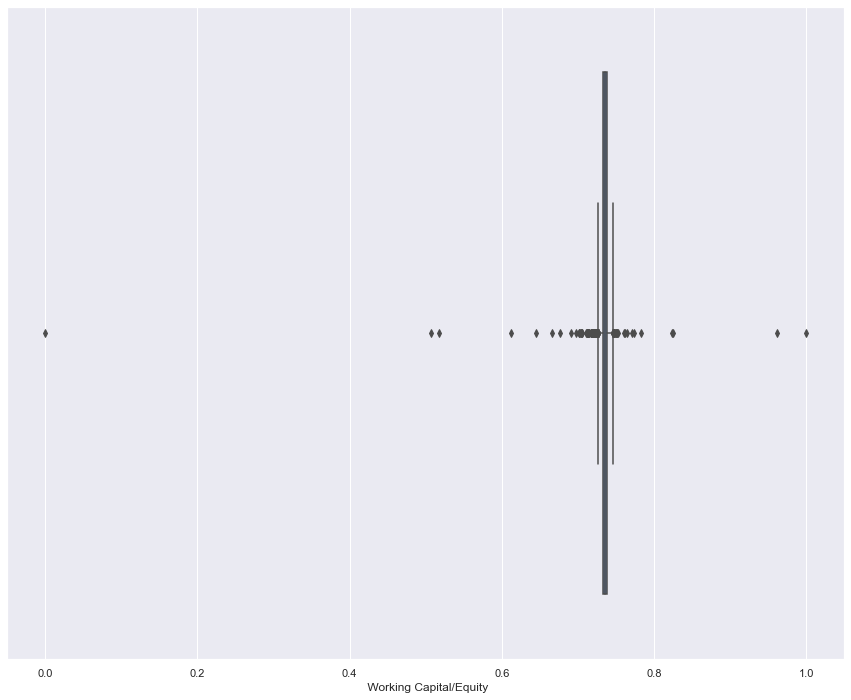

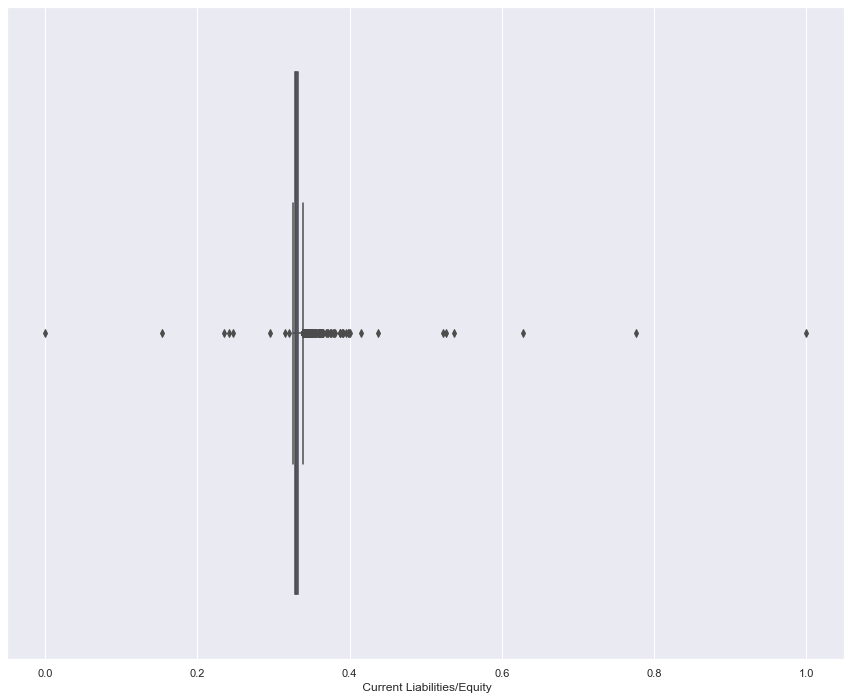

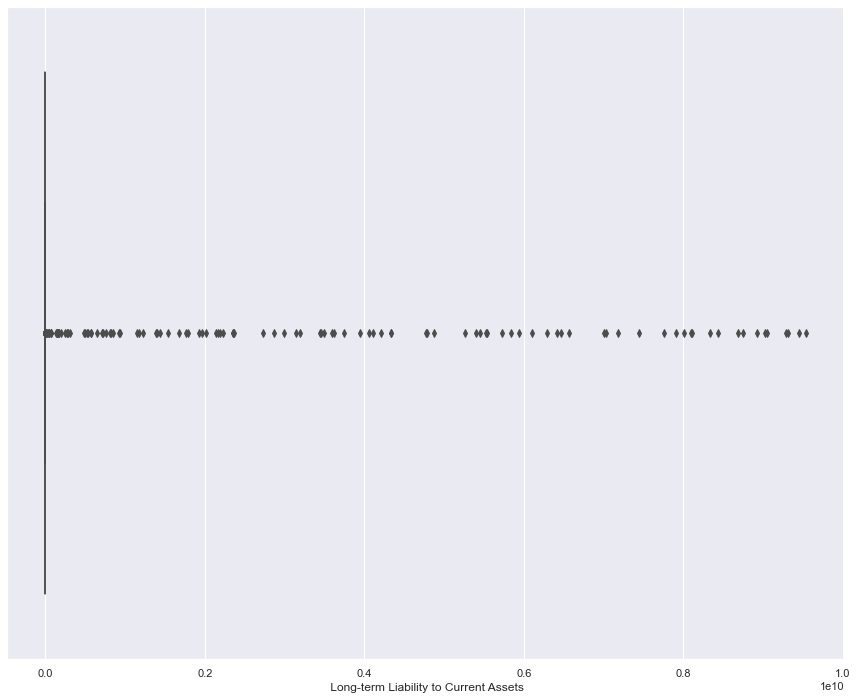

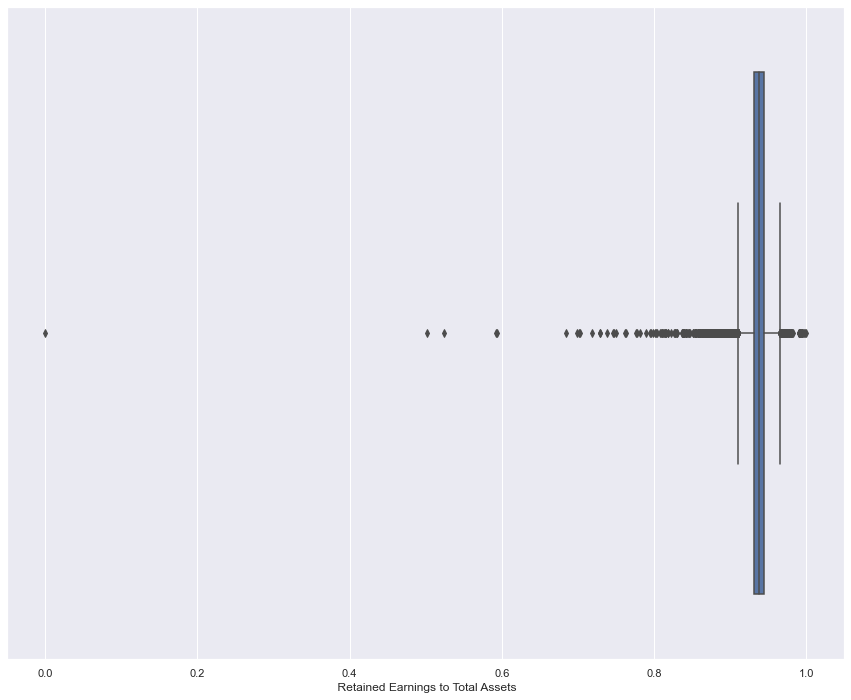

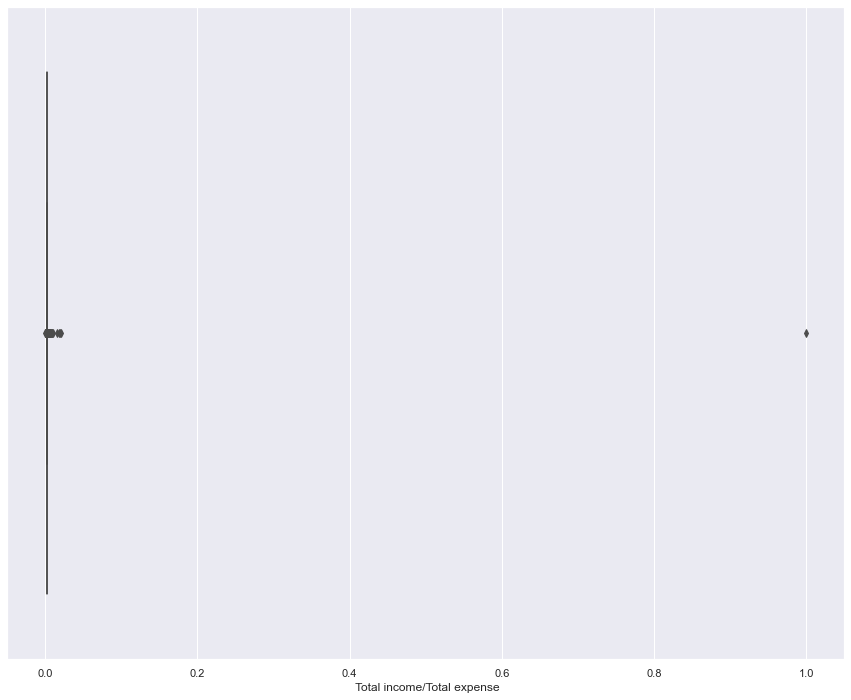

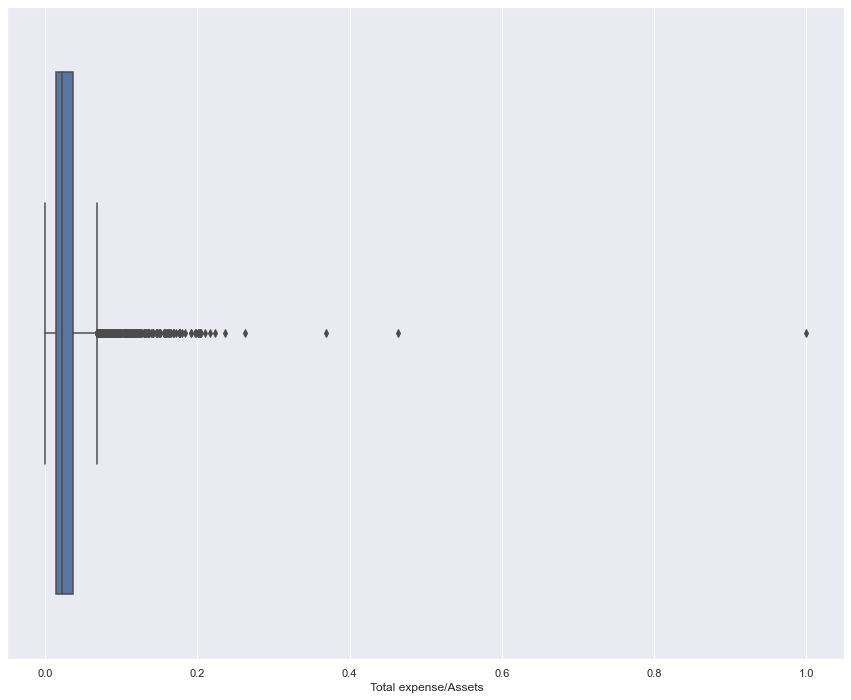

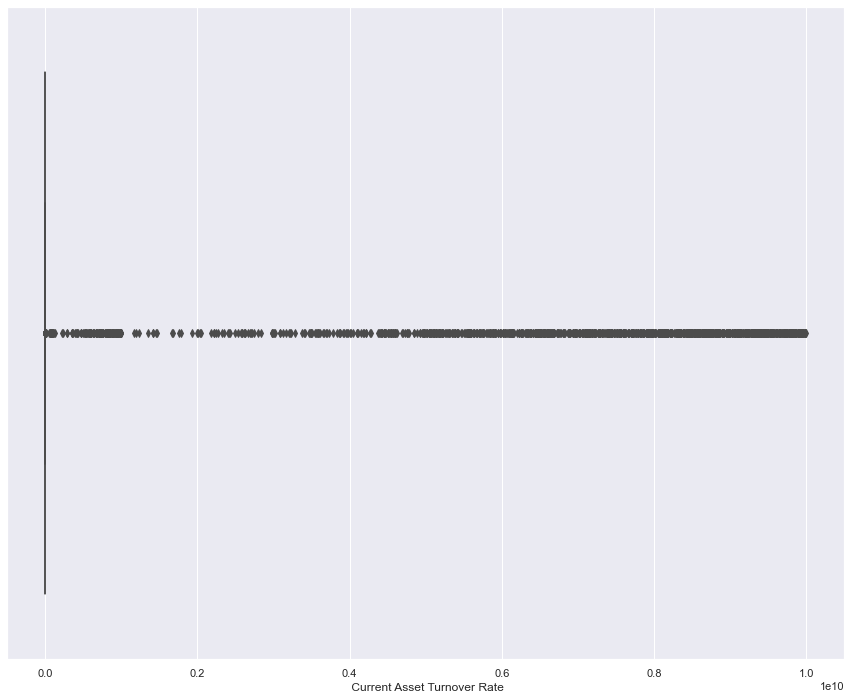

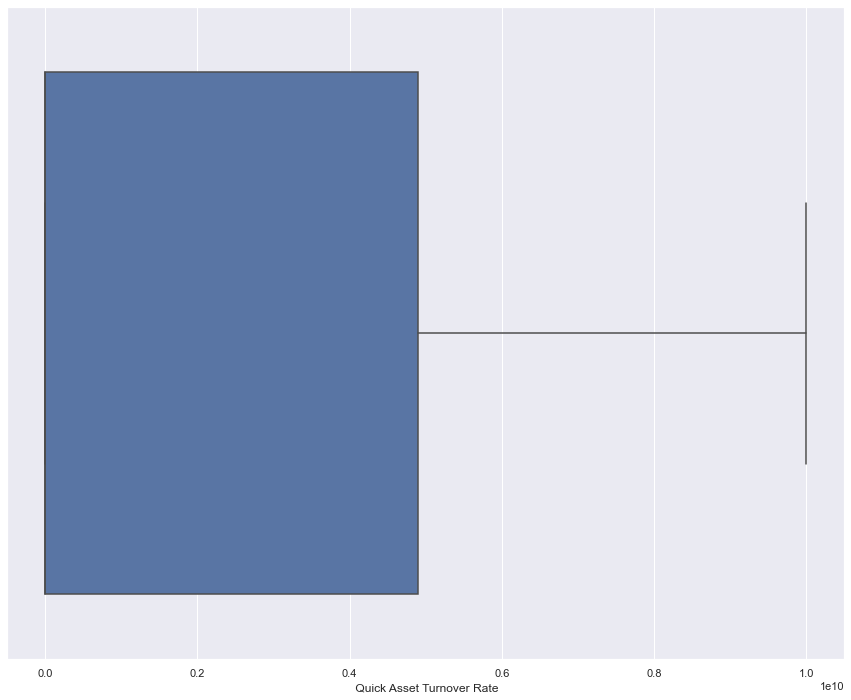

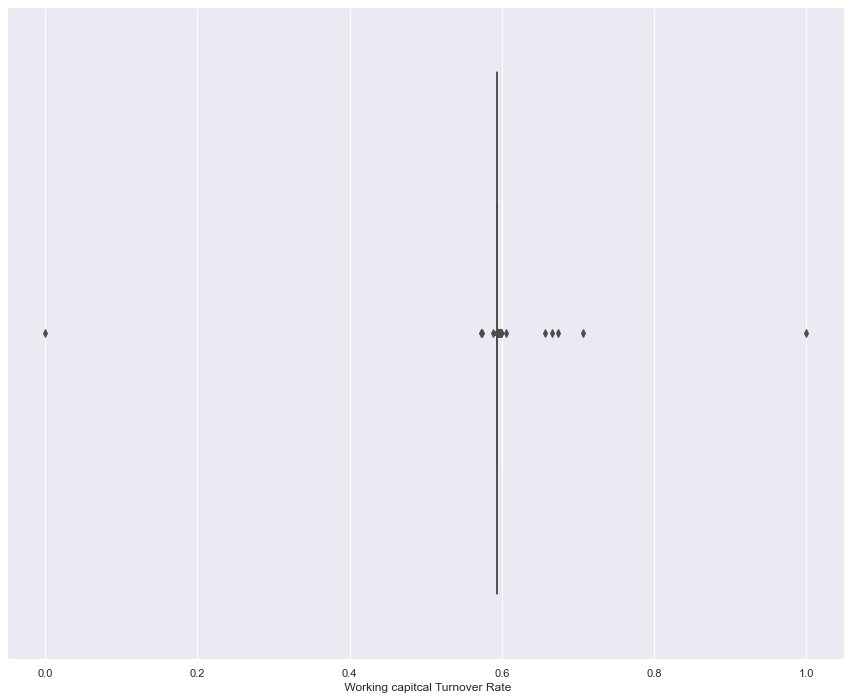

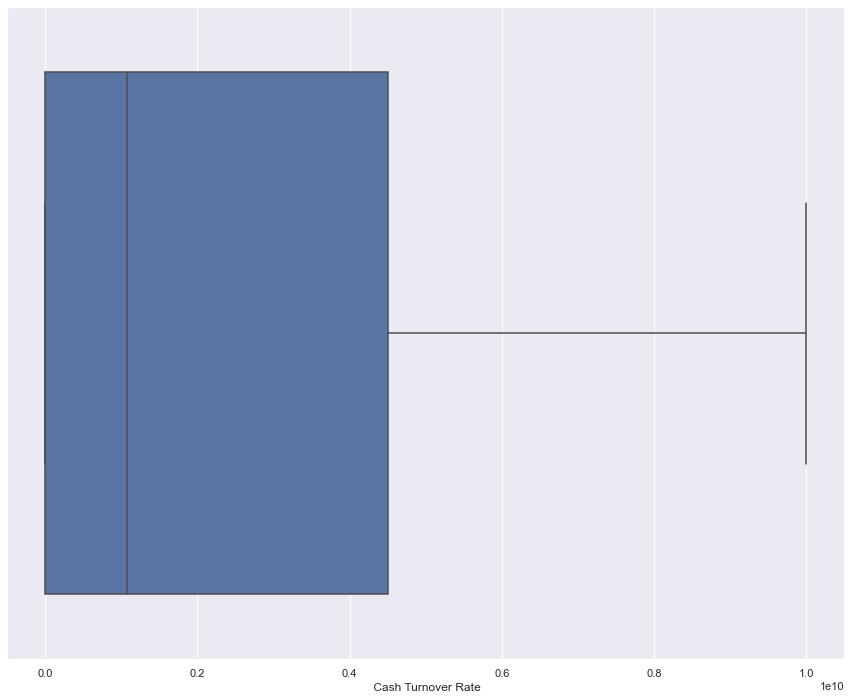

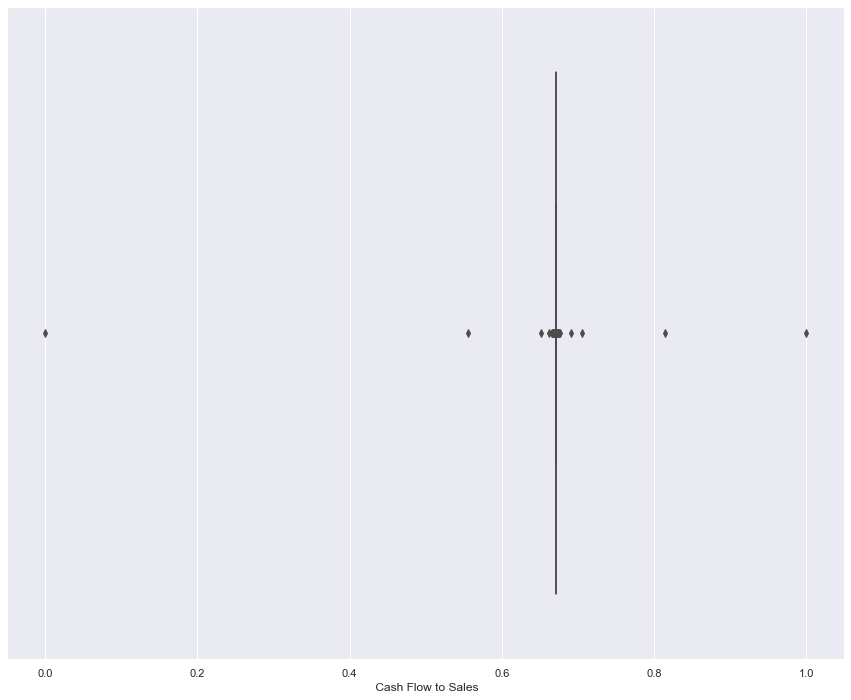

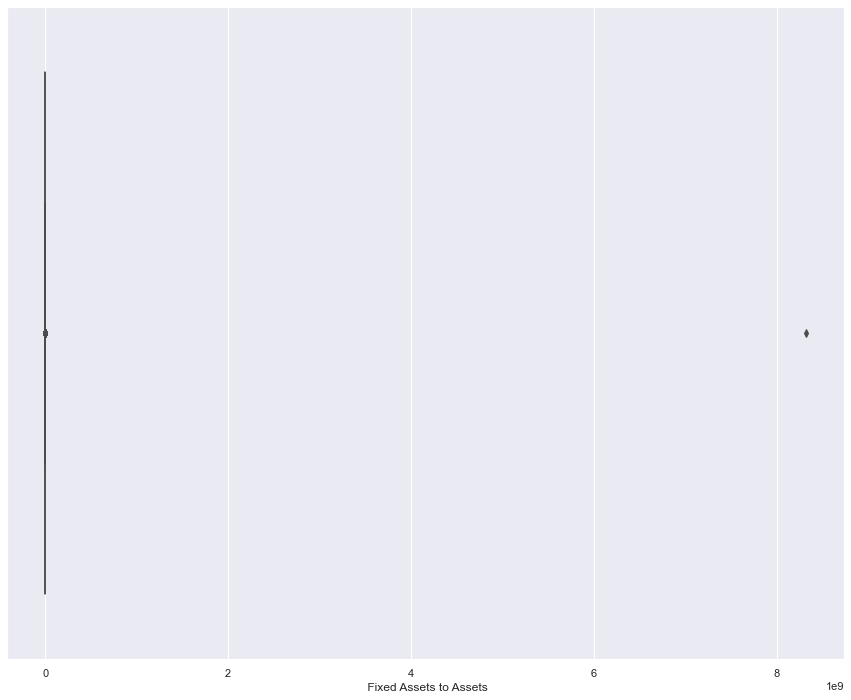

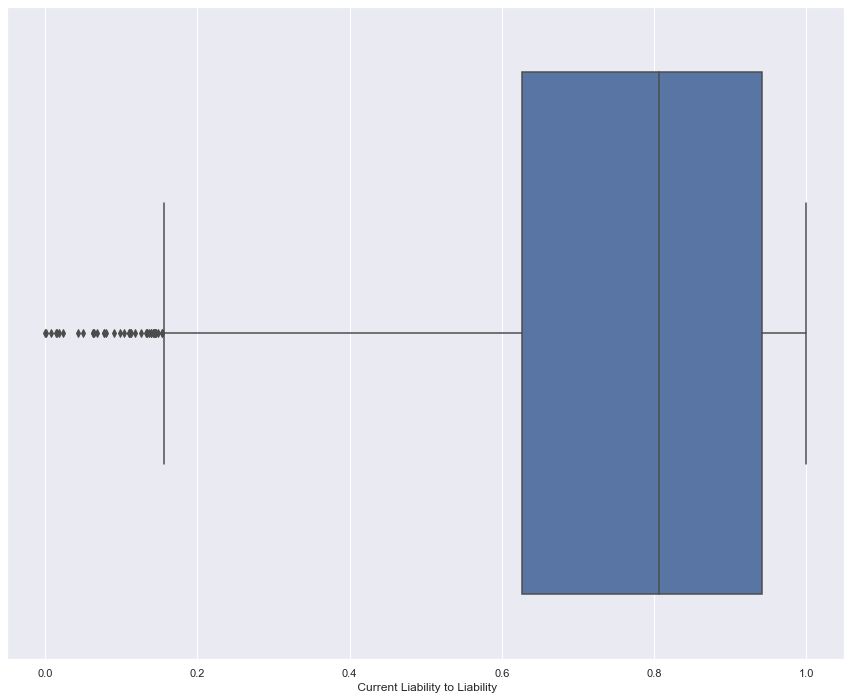

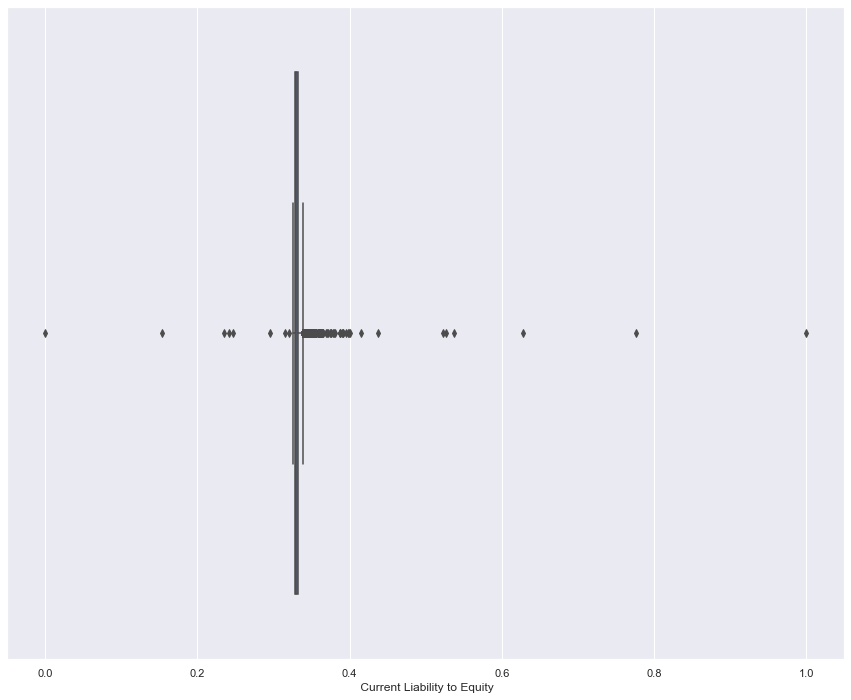

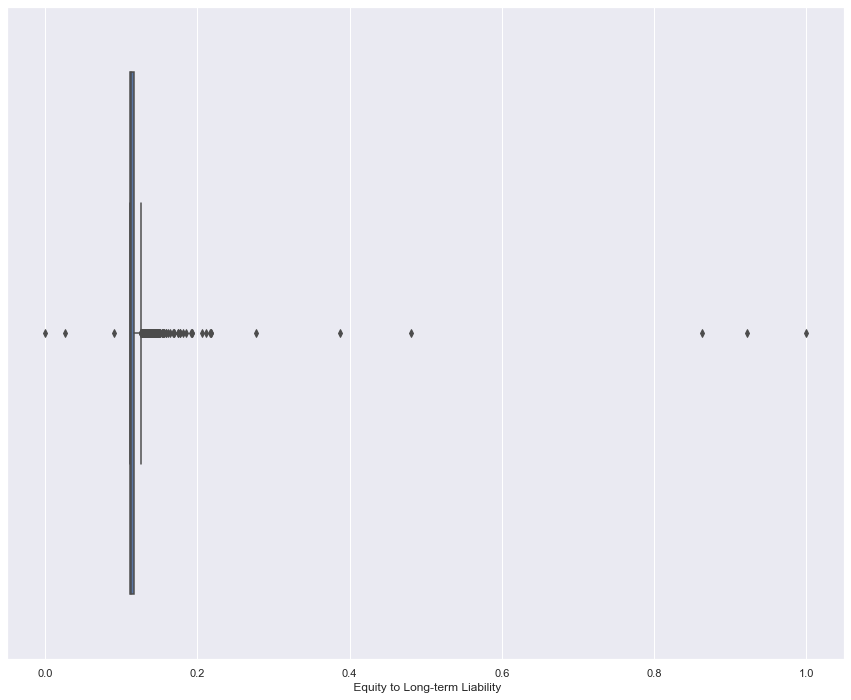

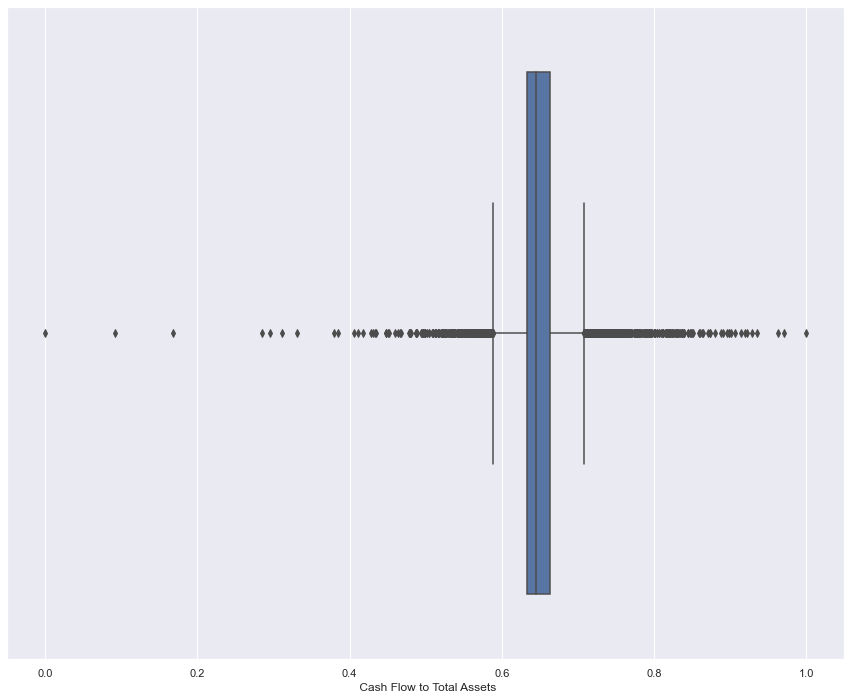

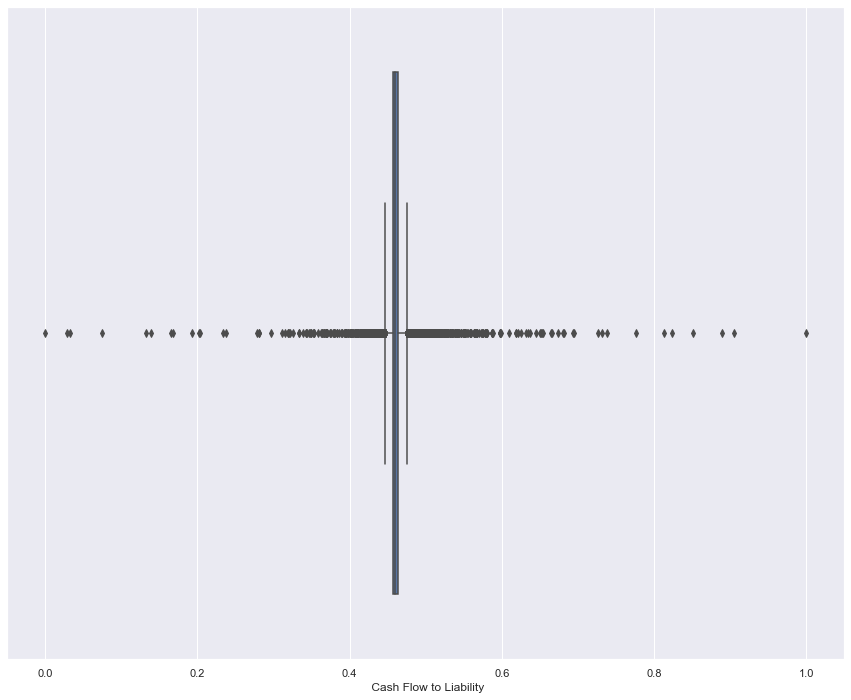

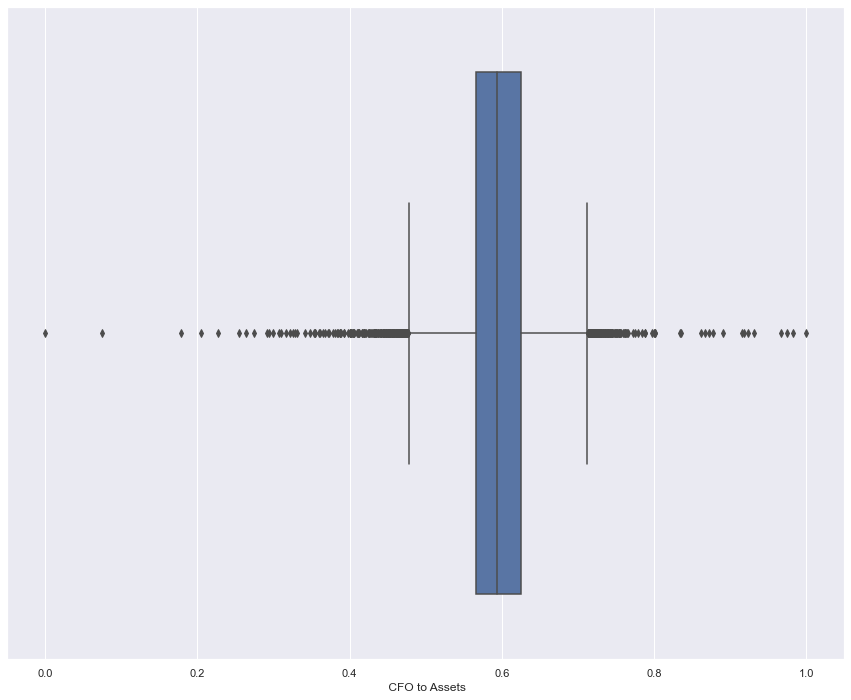

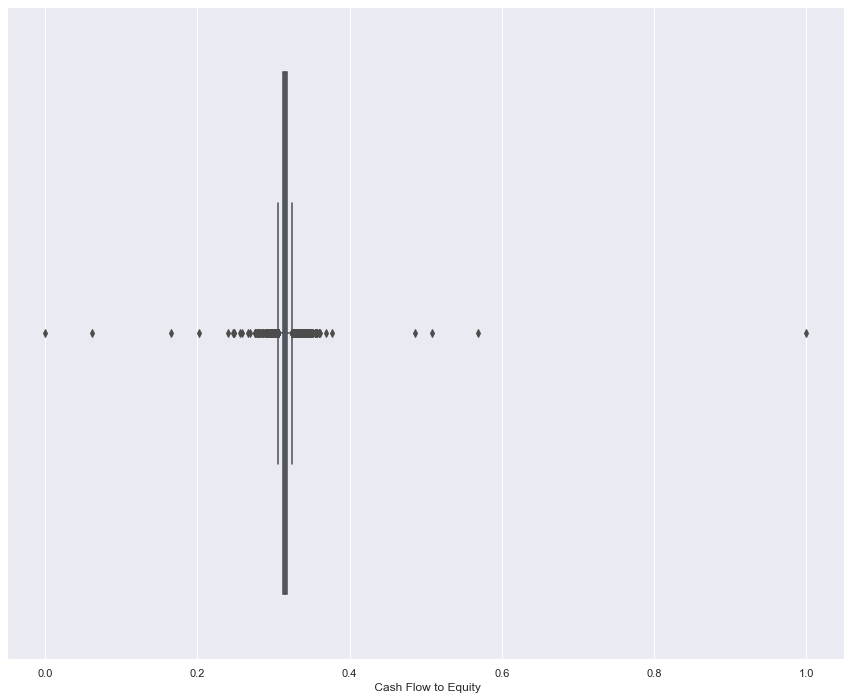

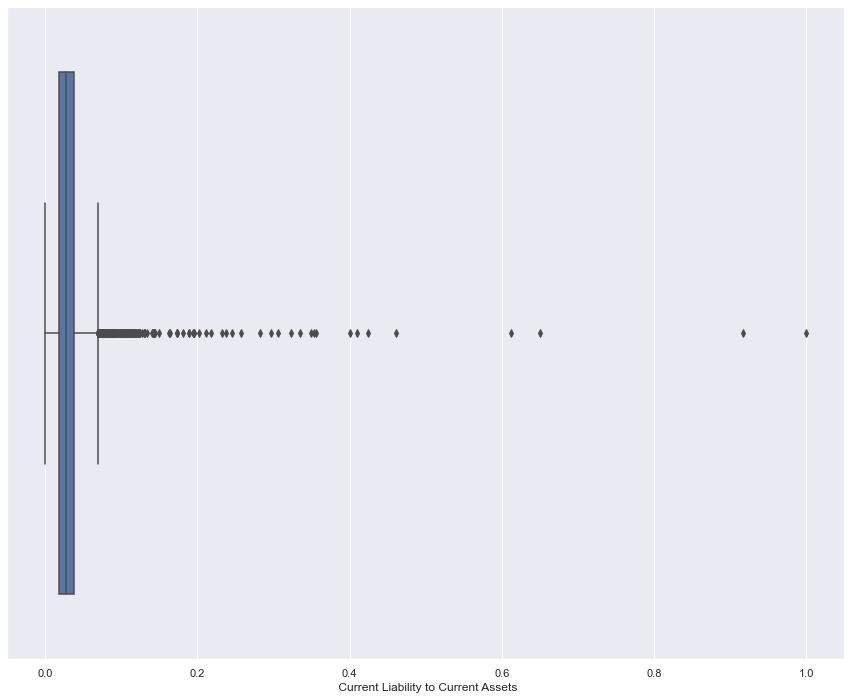

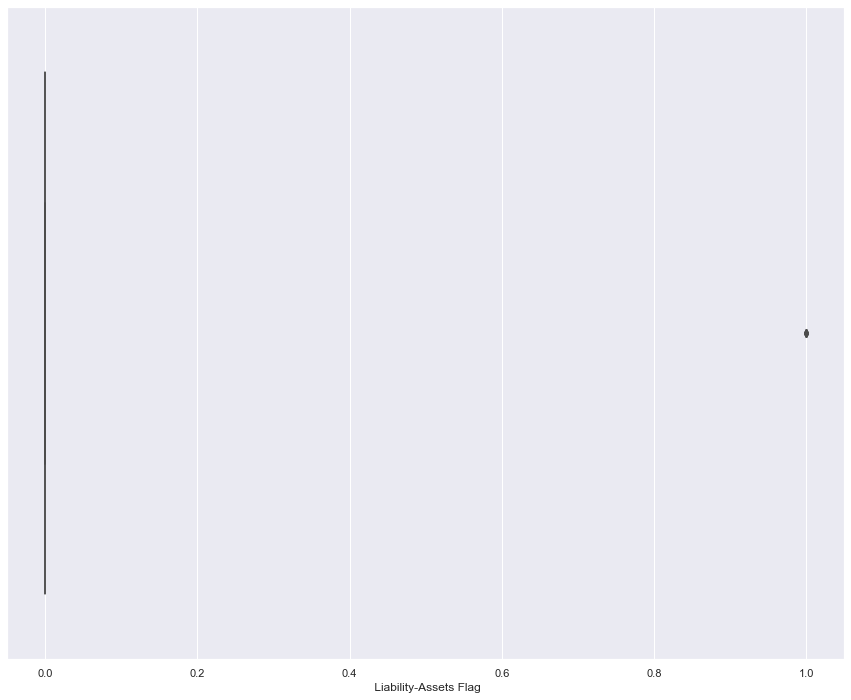

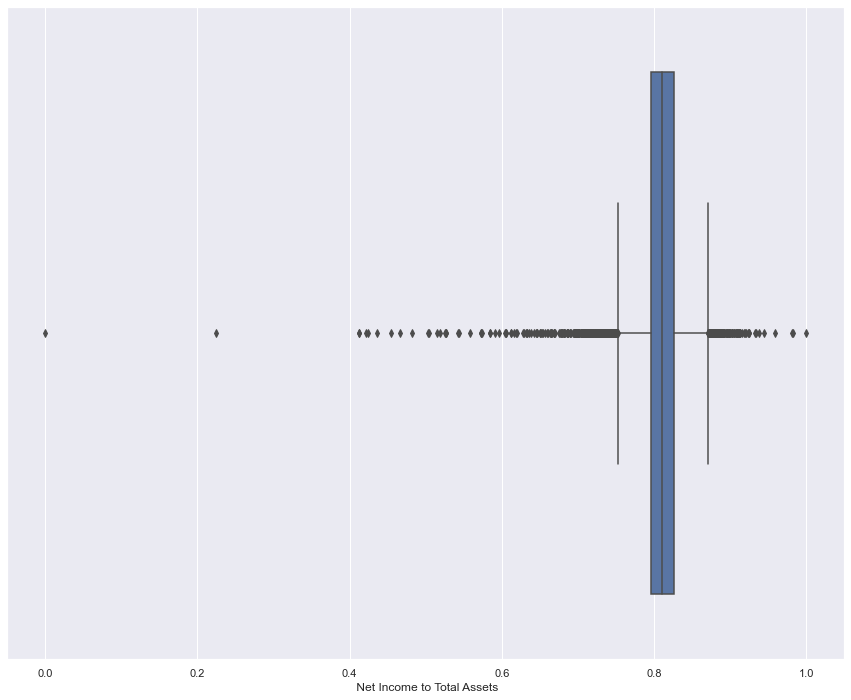

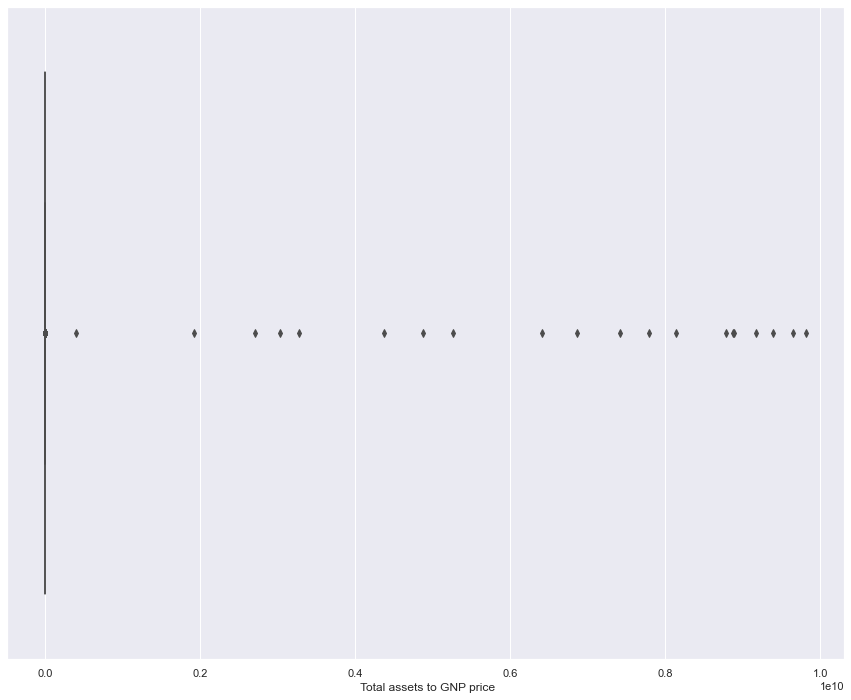

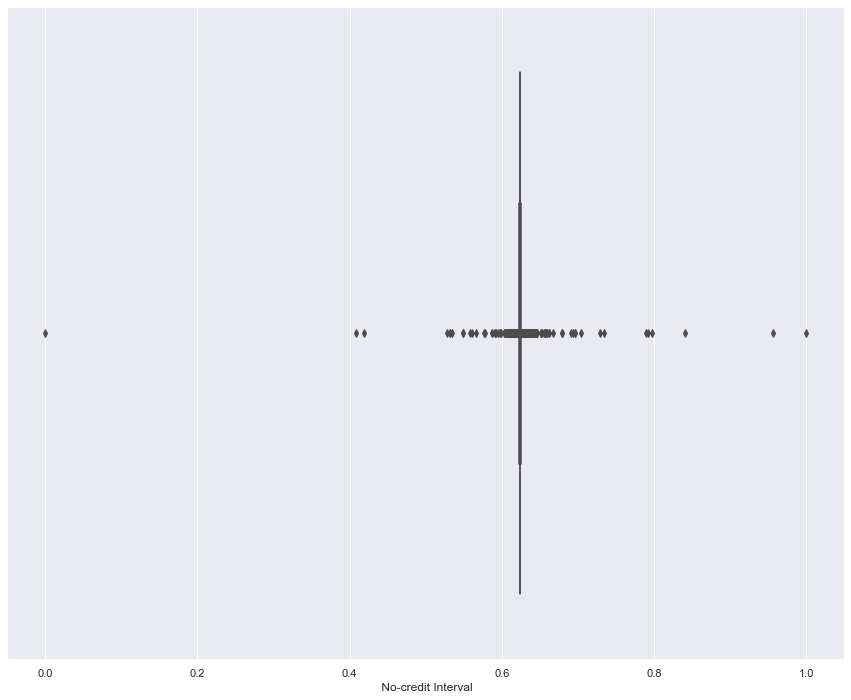

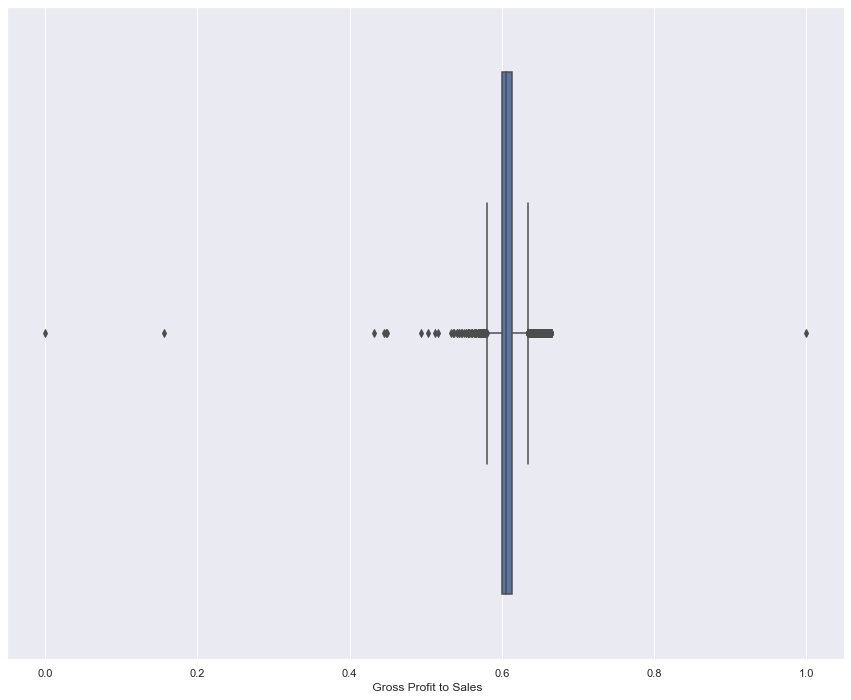

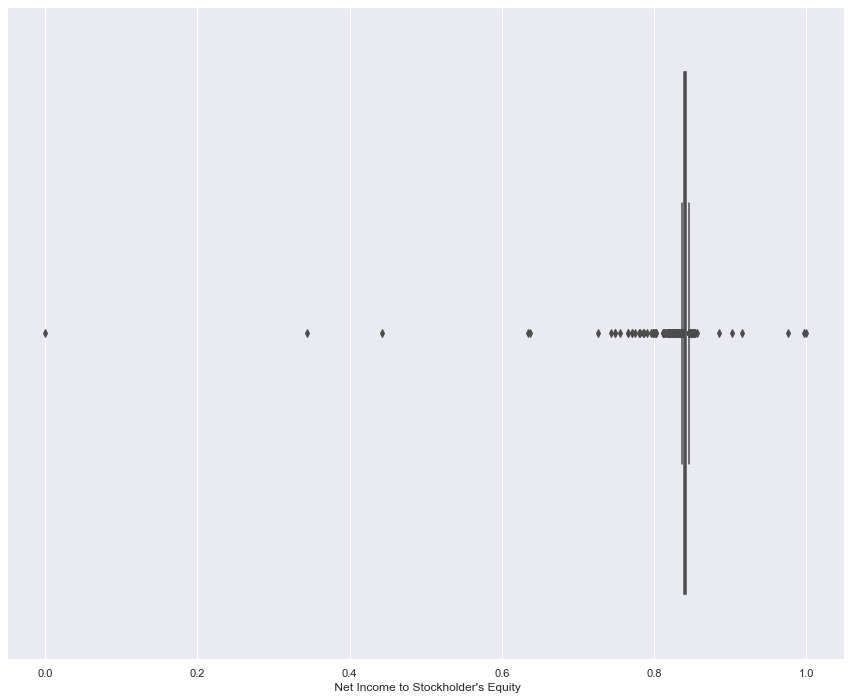

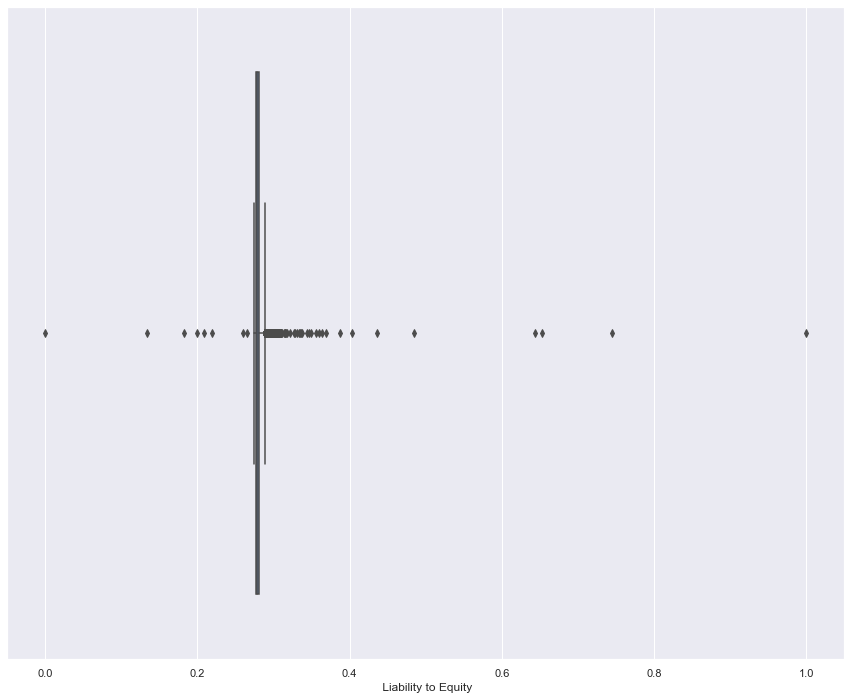

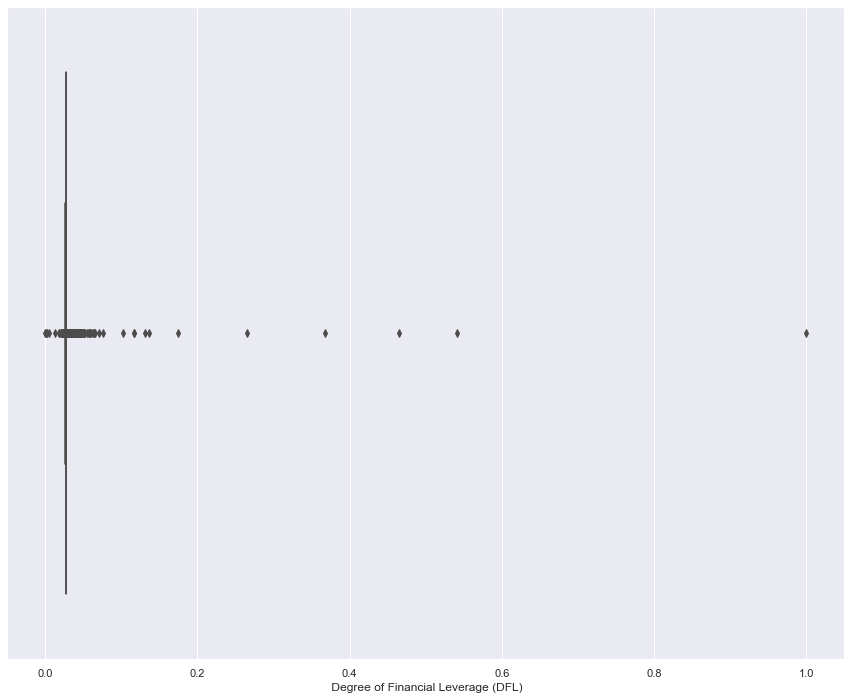

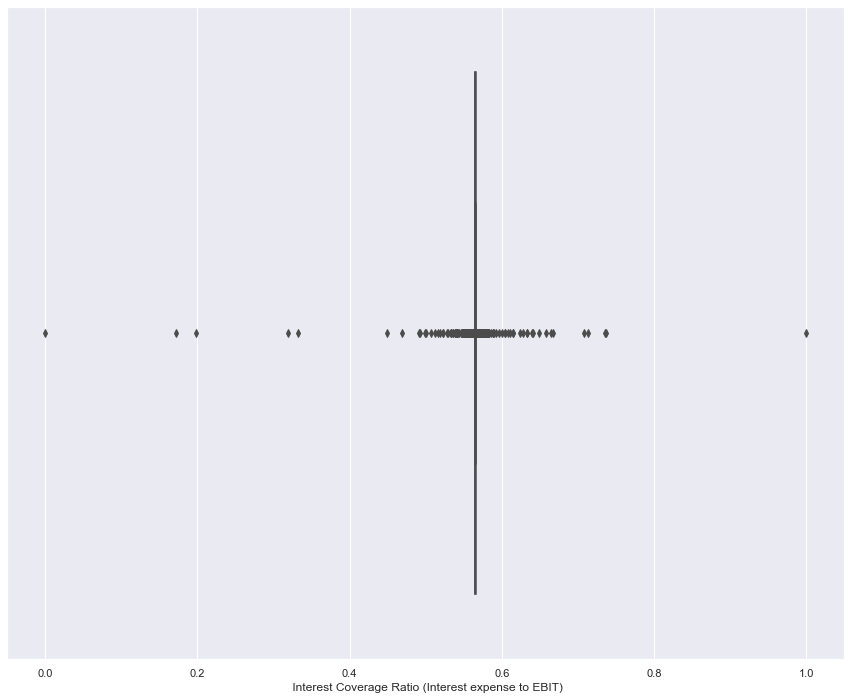

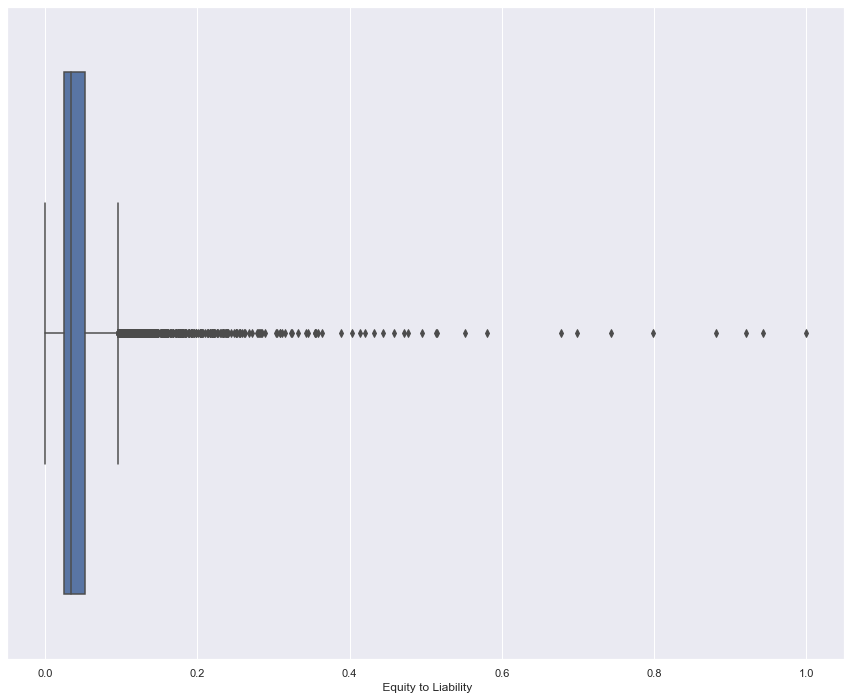

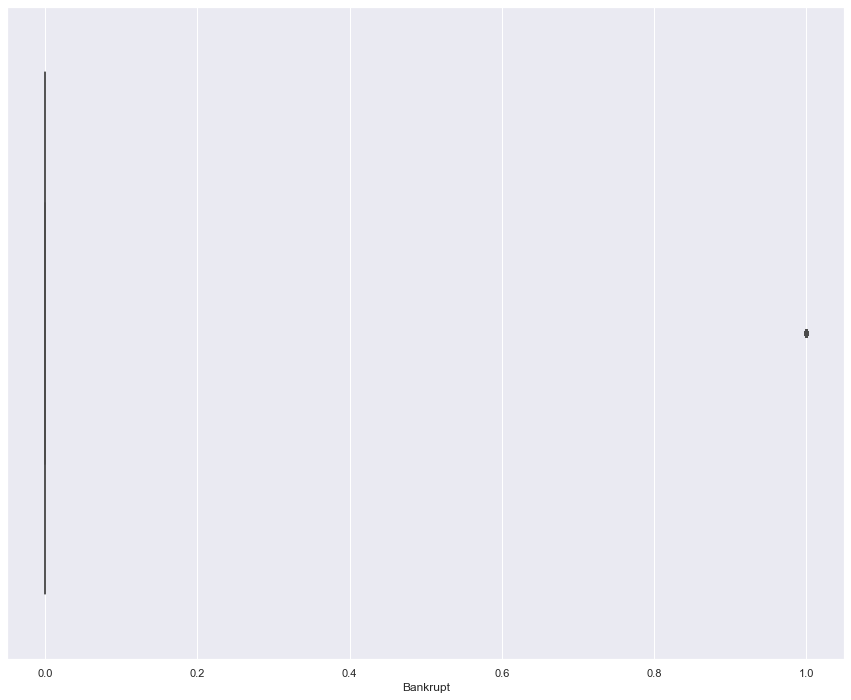

In [21]:
def boxplots(col):
    sns.boxplot(df1[col])
    plt.show()
    
for i in list(df1.select_dtypes(exclude=['object']).columns[1:]):
    boxplots(i)

In [22]:
df1 = df1.rename(columns={'Liability-Assets Flag': 'liability_assets_flag'})

In [23]:
df1.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

#### Exploratory Data Analysis

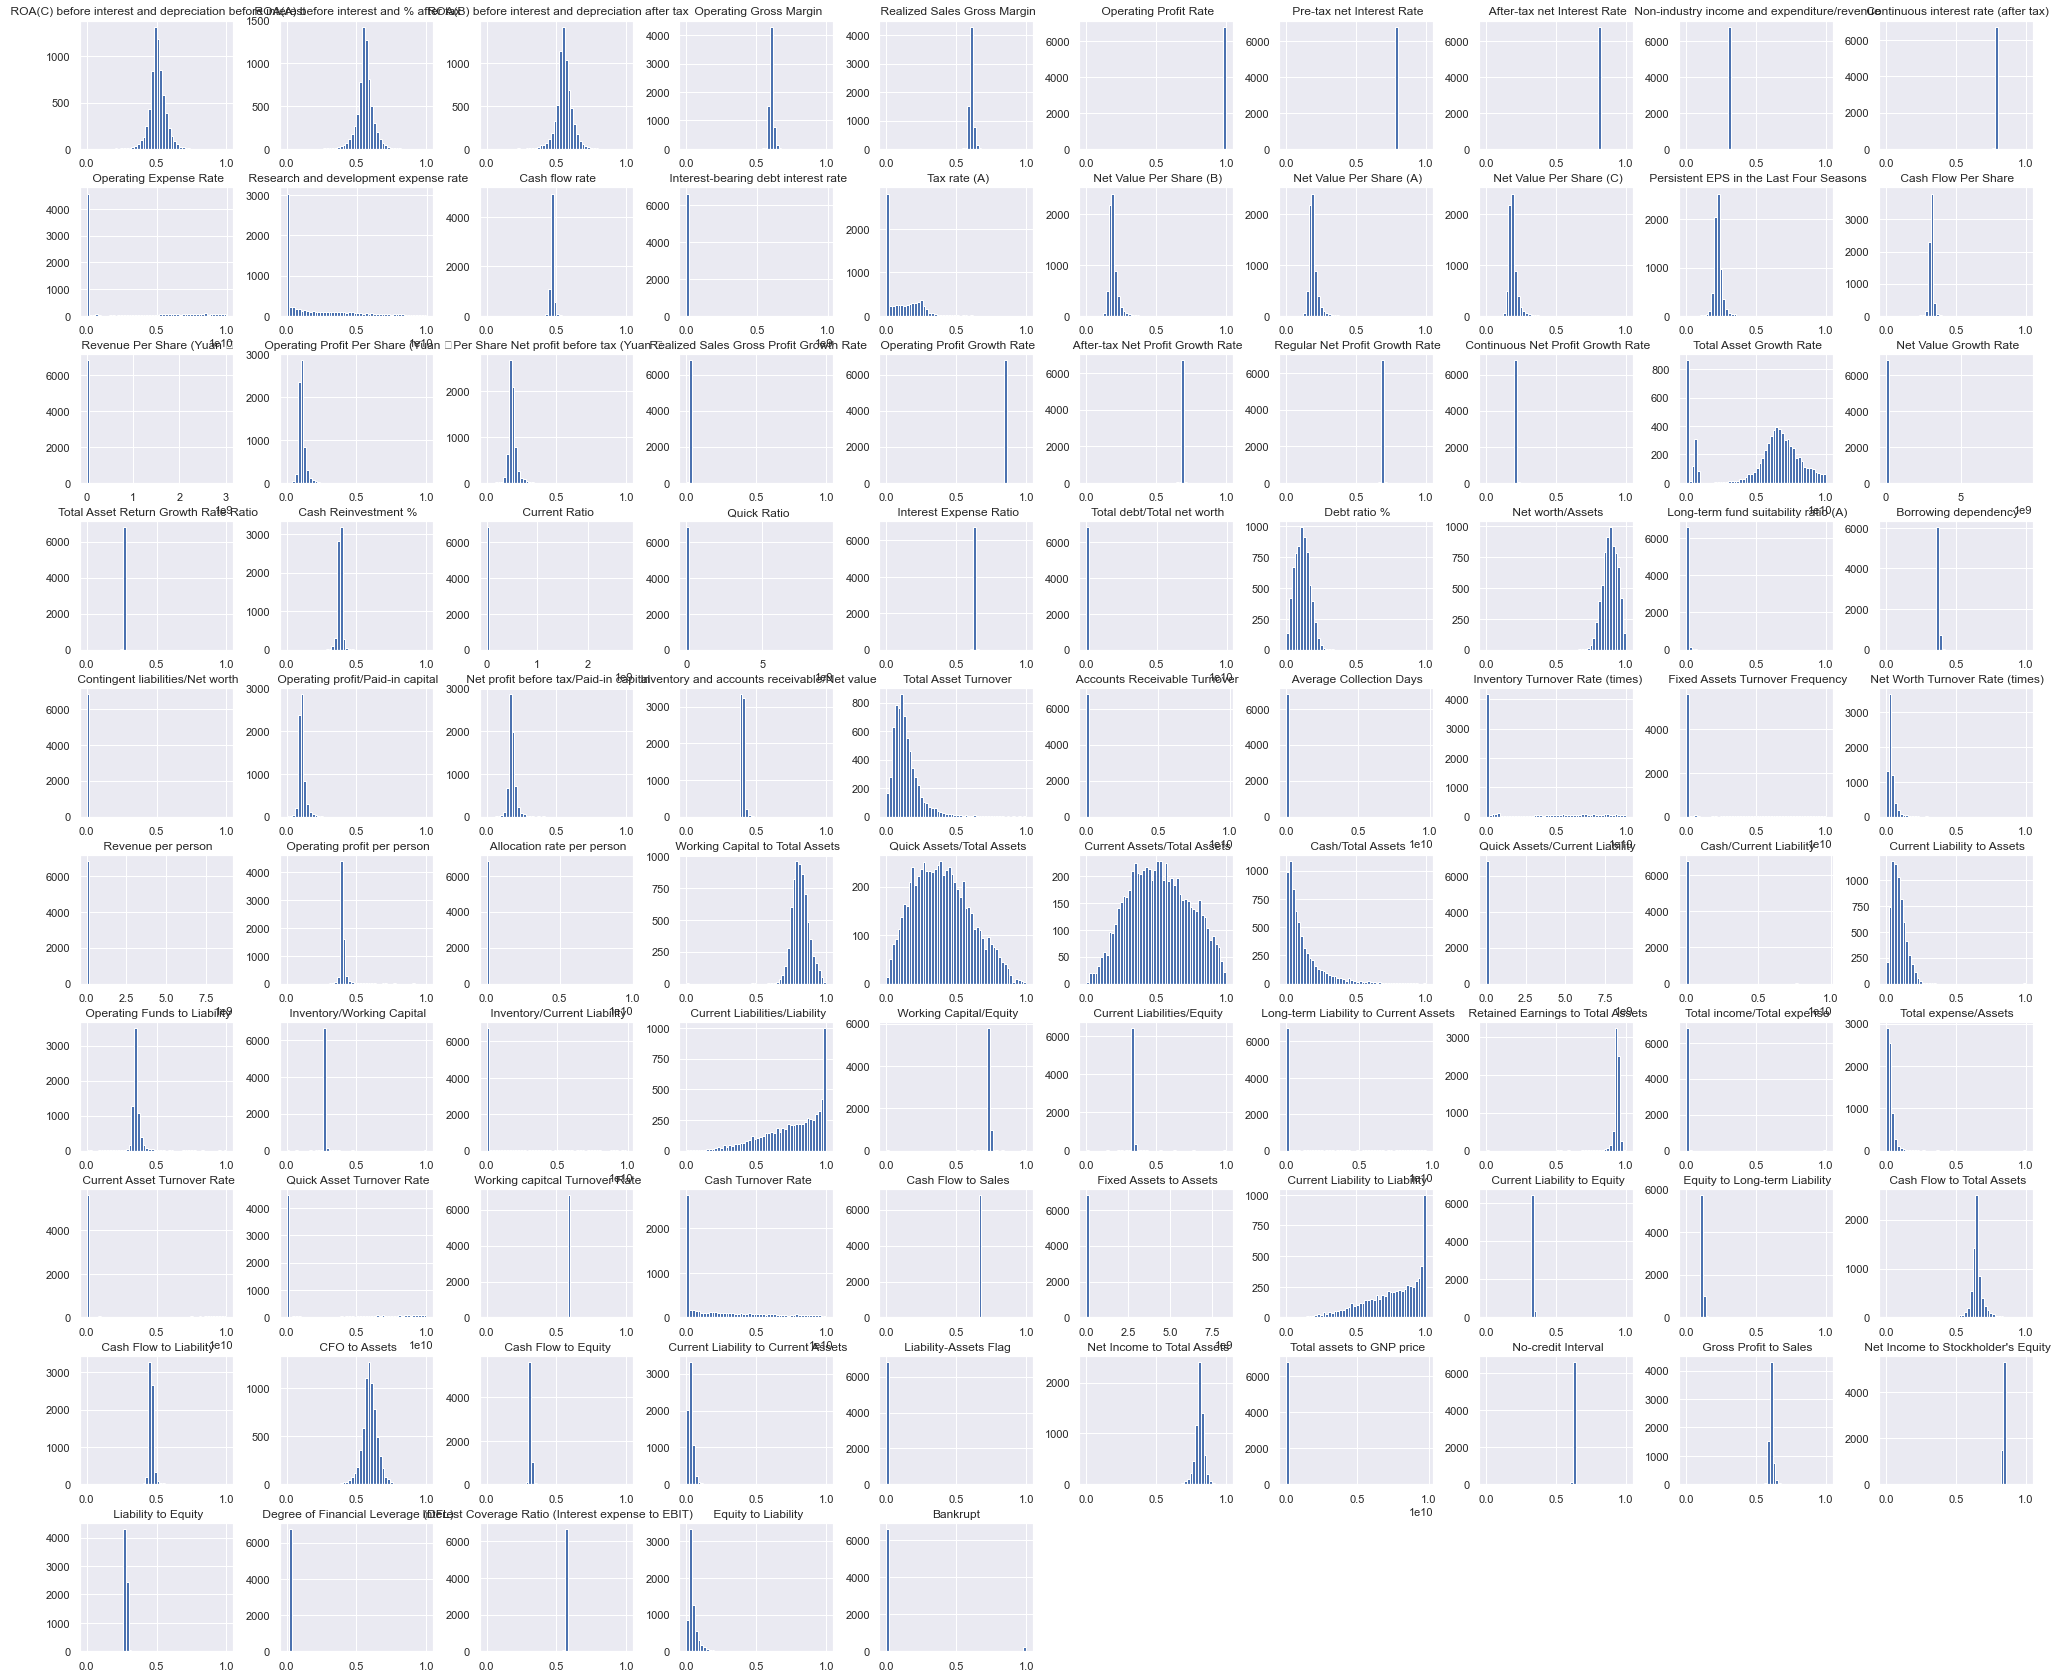

In [24]:
df1.hist(figsize = (35,30), bins = 50)
plt.show()

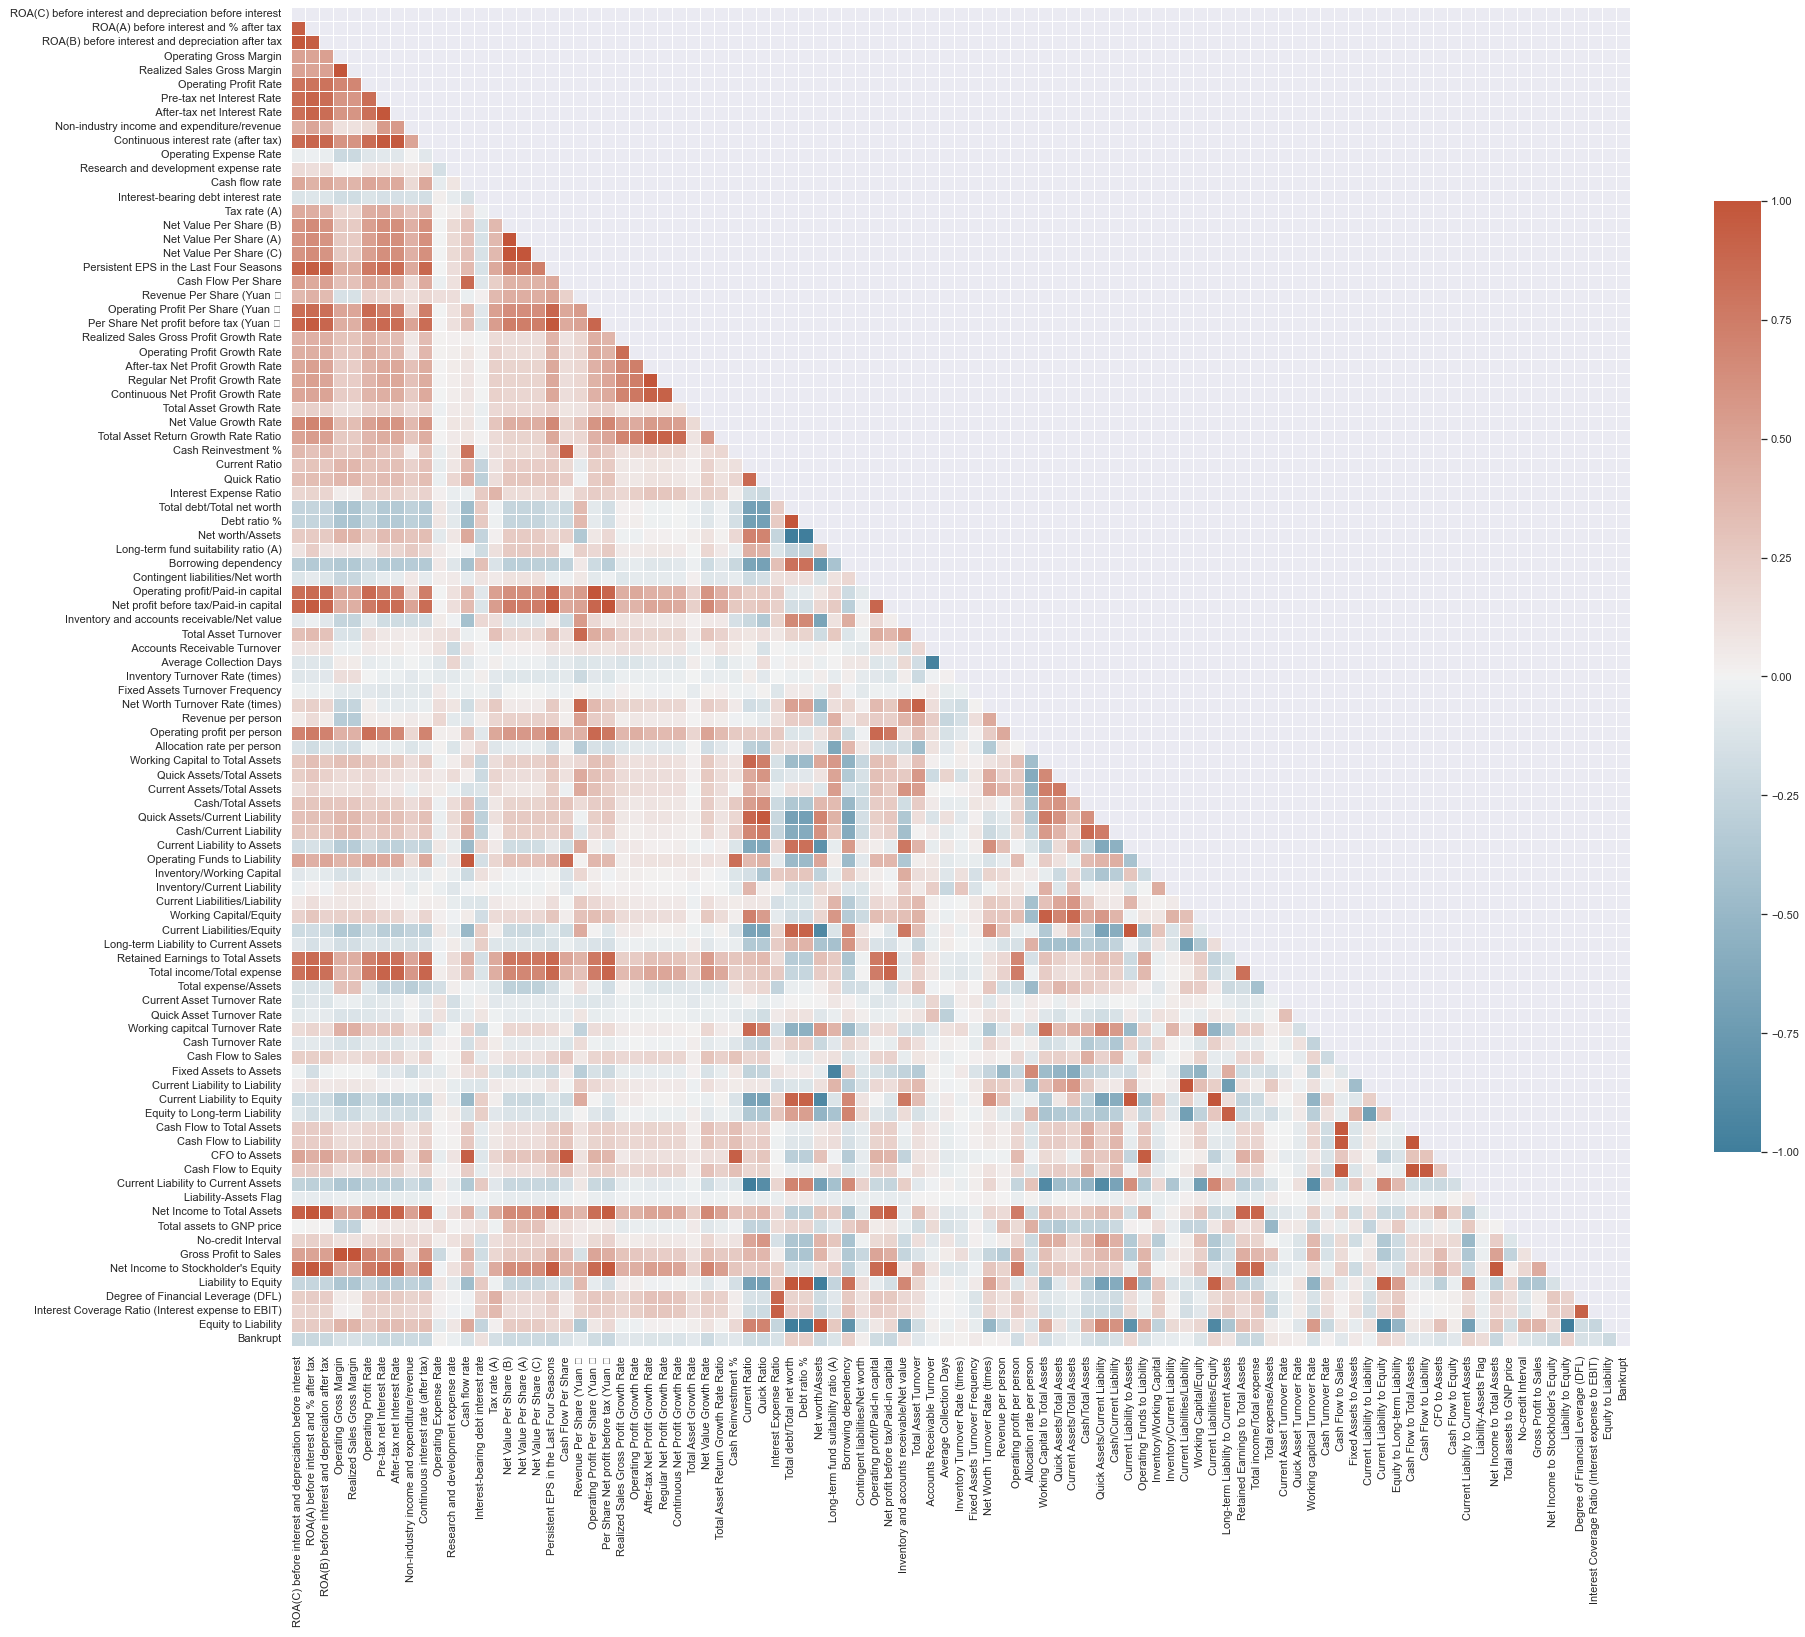

In [25]:
fig, ax = plt.subplots(figsize = (30,35))
cor = df1.corr('spearman')
mask = np.triu(np.ones_like(cor, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(cor, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink" : .5})
plt.show()

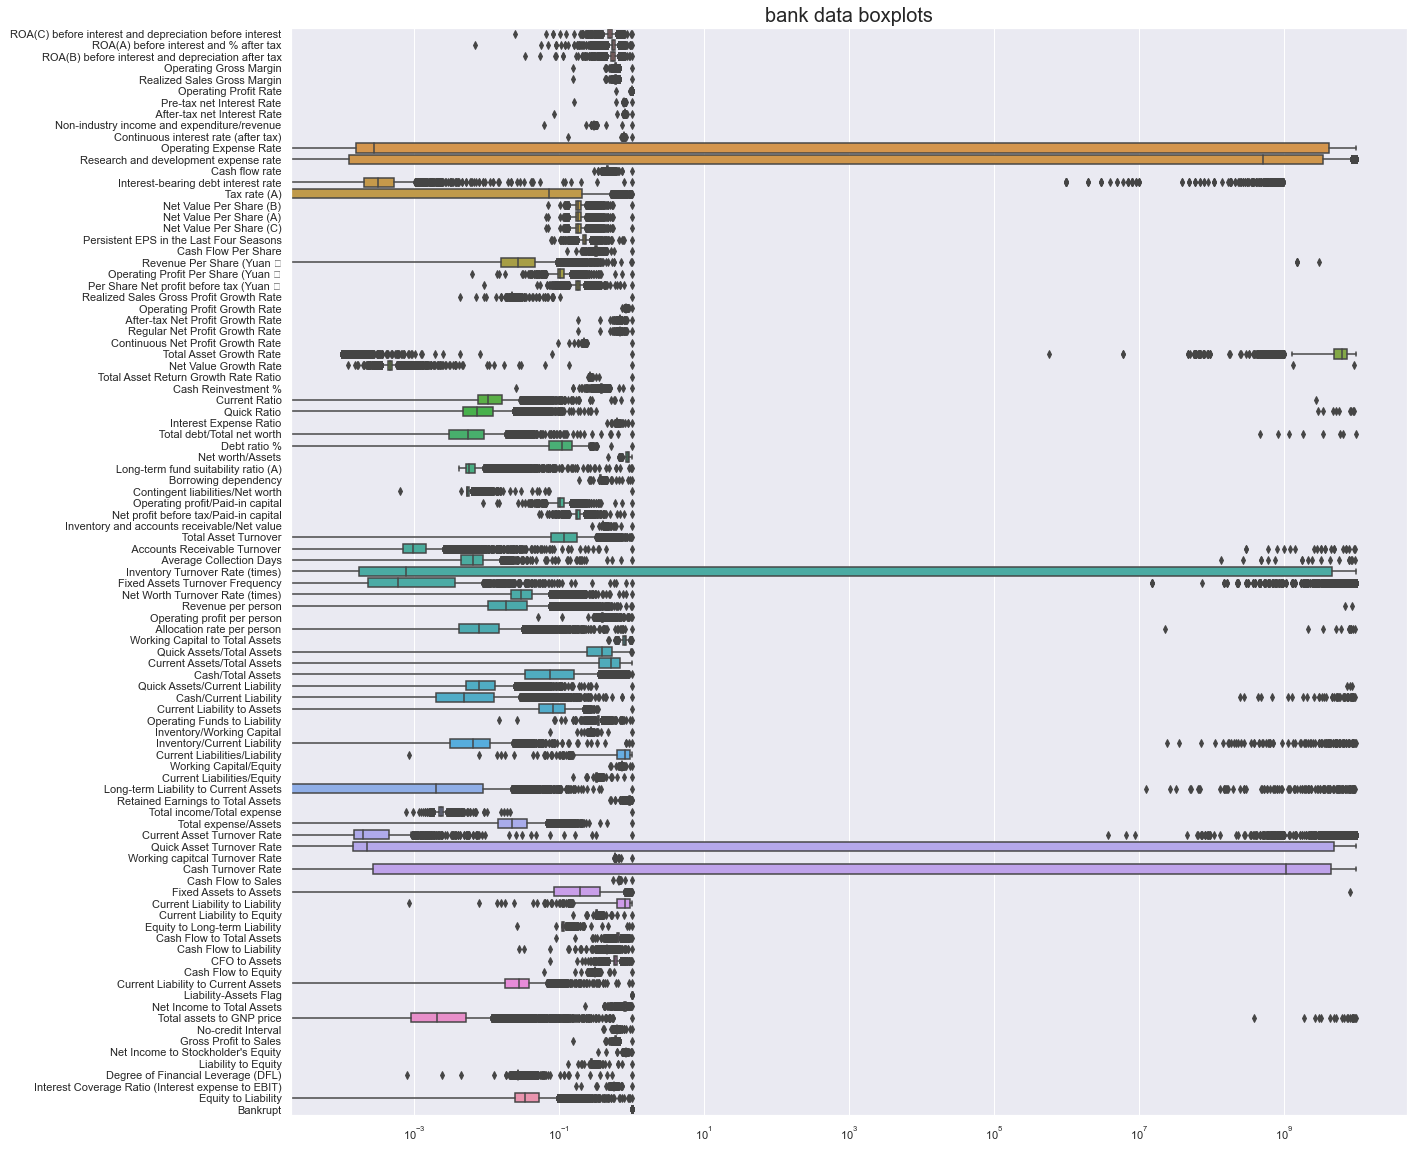

In [26]:
# plotting Boxplots of the numerical features
plt.figure(figsize = (20,20))
ax = sns.boxplot(data = df1, orient = "h")
ax.set_title("bank data boxplots", fontsize = 20)
ax.set(xscale = "log")
plt.show()

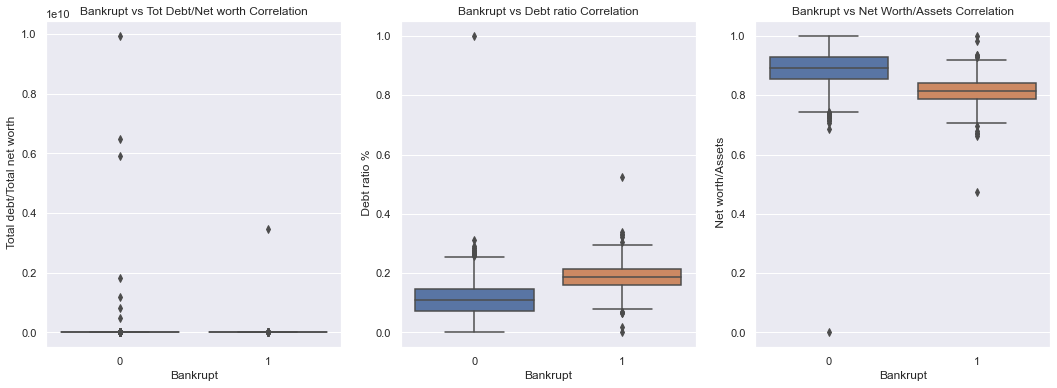

In [27]:
# plotting the interesting features
fig, axes = plt.subplots(ncols=3, figsize=(18,6))

sns.boxplot(x='Bankrupt', y=" Total debt/Total net worth", data=df1, ax=axes[0]) 
axes[0].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt', y=" Debt ratio %", data=df1, ax=axes[1])
axes[1].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt', y=" Net worth/Assets", data=df1, ax=axes[2])  
axes[2].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

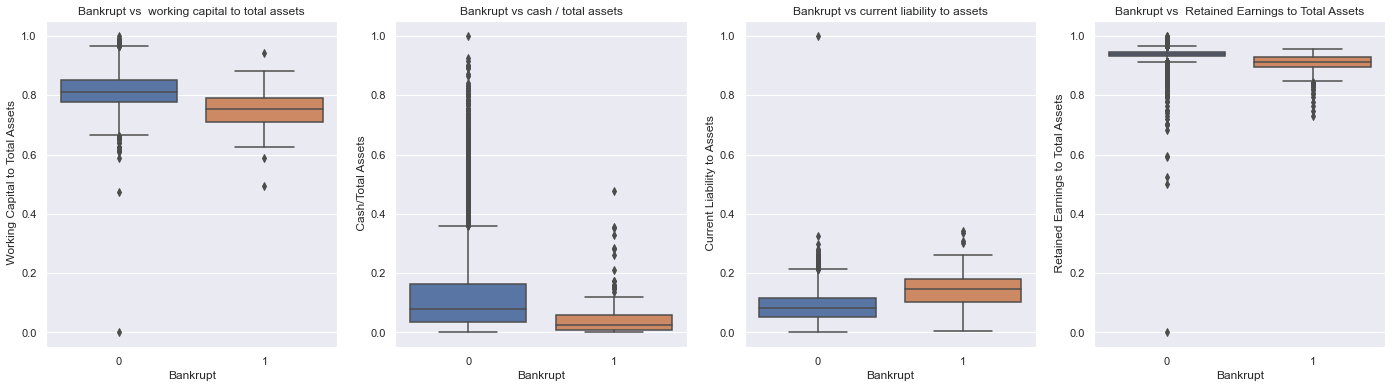

In [28]:
fig, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt', y=" Working Capital to Total Assets", data=df1, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt', y=" Cash/Total Assets", data=df1, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')

sns.boxplot(x='Bankrupt', y=" Current Liability to Assets", data=df1, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')

sns.boxplot(x='Bankrupt', y=" Retained Earnings to Total Assets", data=df1, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

Text(0.5, 1.0, 'retain earnings to total assets \n (Unstable companies)')

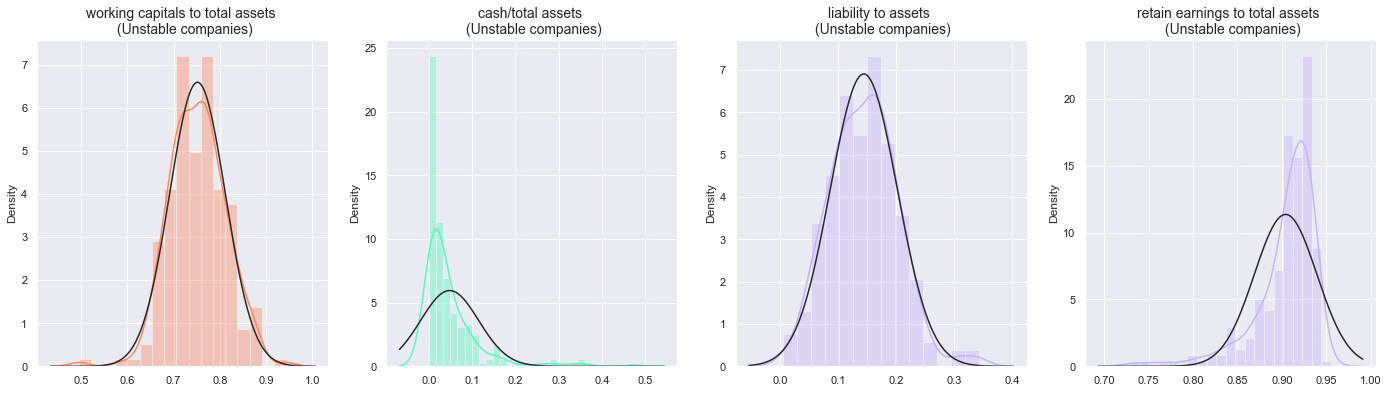

In [29]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))
working_cap = df1[' Working Capital to Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df1[' Cash/Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df1[' Current Liability to Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df1[' Retained Earnings to Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

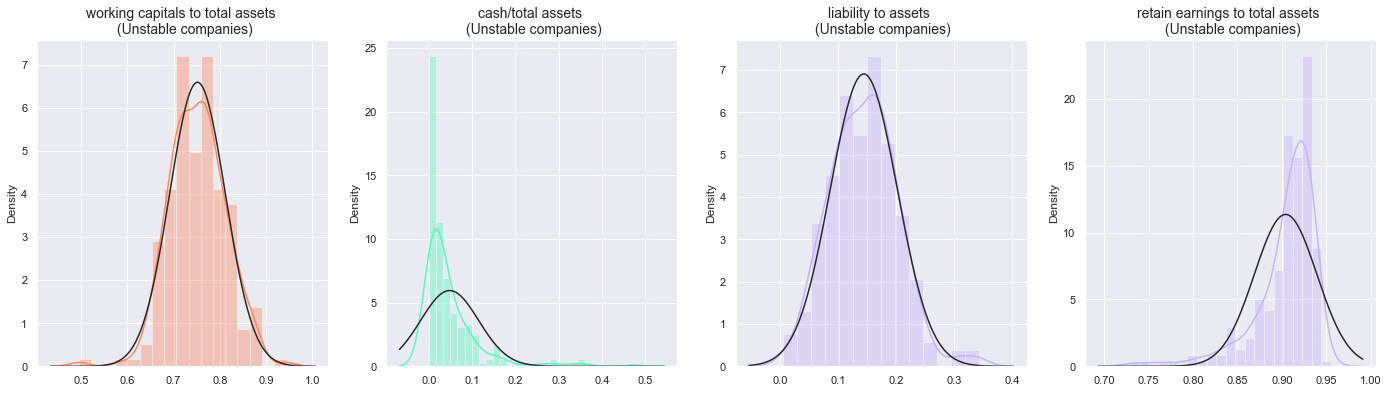

In [30]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = df1[' Working Capital to Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df1[' Cash/Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df1[' Current Liability to Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df1[' Retained Earnings to Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()


In [31]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)


Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt Lower: 0.0
Bankrupt Upper: 0.0
Bankrupt outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.47652708 | Quartile 75: 0.535562814
iqr: 0.05903573400000006
Cut Off: 0.08855360100000009
 ROA(C) before interest and depreciation before interest Lower: 0.3879734789999999
 ROA(C) before interest and depreciation before interest Upper: 0.6241164150000001
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.535542957 | Quartile 75: 0.5891572174999999
iqr: 0.053614260499999955
Cut Off: 0.08042139074999993
 ROA(A) before interest and % after tax Lower: 0.45512156625000005
 ROA(A) before interest and % after tax Upper: 0.6695786082499999
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
--------------

Quartile 25: 0.851195695 | Quartile 75: 0.927109472
iqr: 0.07591377700000002
Cut Off: 0.11387066550000002
 Net worth/Assets Lower: 0.7373250295
 Net worth/Assets Upper: 1.0409801375
 Net worth/Assets outliers for close to bankruptcy cases: 30
-----------------------------------------------------------------
Quartile 25: 0.0052436835000000005 | Quartile 75: 0.0068474320000000005
iqr: 0.0016037485
Cut Off: 0.00240562275
 Long-term fund suitability ratio (A) Lower: 0.0028380607500000004
 Long-term fund suitability ratio (A) Upper: 0.00925305475
 Long-term fund suitability ratio (A) outliers for close to bankruptcy cases: 810
-----------------------------------------------------------------
Quartile 25: 0.3701678435 | Quartile 75: 0.376270737
iqr: 0.0061028935000000395
Cut Off: 0.00915434025000006
 Borrowing dependency Lower: 0.3610135032499999
 Borrowing dependency Upper: 0.3854250772500001
 Borrowing dependency outliers for close to bankruptcy cases: 321
---------------------------------

Quartile 25: 0.32809584199999997 | Quartile 75: 0.33232240449999995
iqr: 0.004226562499999975
Cut Off: 0.006339843749999963
 Current Liability to Equity Lower: 0.32175599825
 Current Liability to Equity Upper: 0.3386622482499999
 Current Liability to Equity outliers for close to bankruptcy cases: 480
-----------------------------------------------------------------
Quartile 25: 0.110933234 | Quartile 75: 0.117106091
iqr: 0.00617285699999999
Cut Off: 0.009259285499999985
 Equity to Long-term Liability Lower: 0.10167394850000003
 Equity to Long-term Liability Upper: 0.1263653765
 Equity to Long-term Liability outliers for close to bankruptcy cases: 406
-----------------------------------------------------------------
Quartile 25: 0.6332653189999999 | Quartile 75: 0.6630618535
iqr: 0.029796534500000083
Cut Off: 0.044694801750000124
 Cash Flow to Total Assets Lower: 0.5885705172499998
 Cash Flow to Total Assets Upper: 0.7077566552500001
 Cash Flow to Total Assets outliers for close to bank

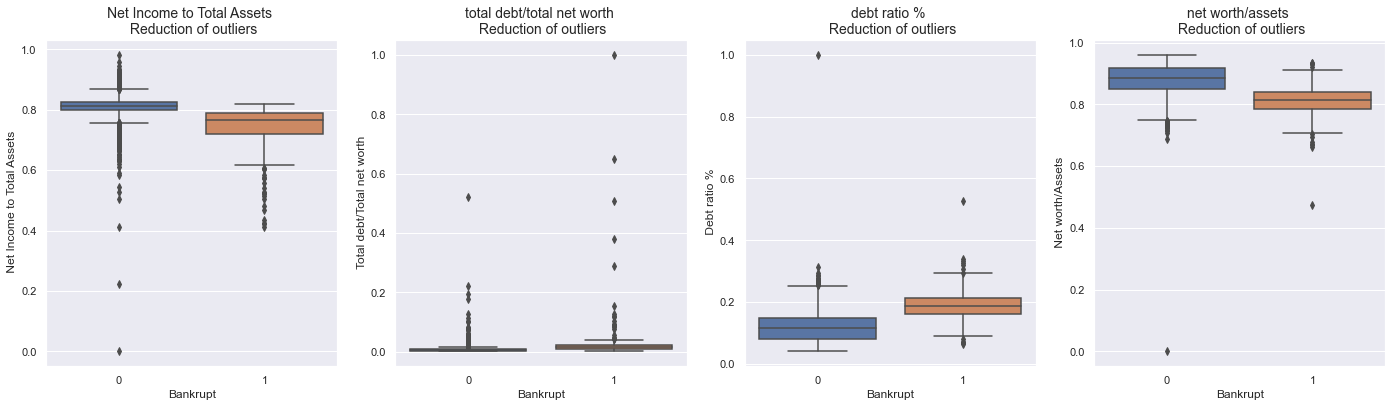

In [32]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt", y=" Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=" Total debt/Total net worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=" Debt ratio %", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Net worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)

plt.show()

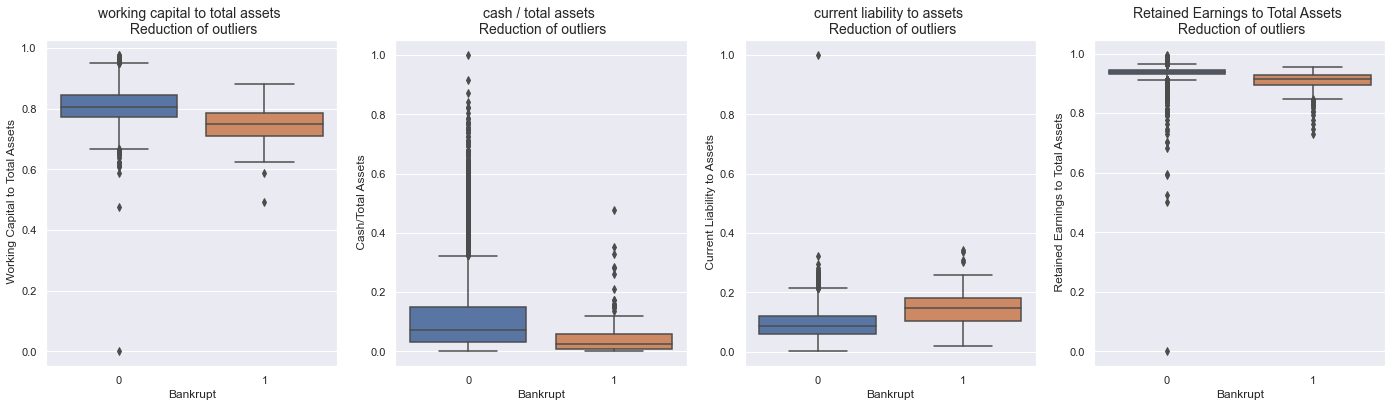

In [33]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
# Boxplots with outliers removed

sns.boxplot(x="Bankrupt", y=' Working Capital to Total Assets', data=new_df,ax=ax1) 
ax1.set_title("working capital to total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Cash/Total Assets', data=new_df,ax=ax2) 
ax2.set_title("cash / total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Current Liability to Assets', data=new_df,ax=ax3) 
ax3.set_title("current liability to assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Retained Earnings to Total Assets', data=new_df,ax=ax4) 
ax4.set_title("Retained Earnings to Total Assets \n Reduction of outliers", fontsize=14)
        
plt.show()


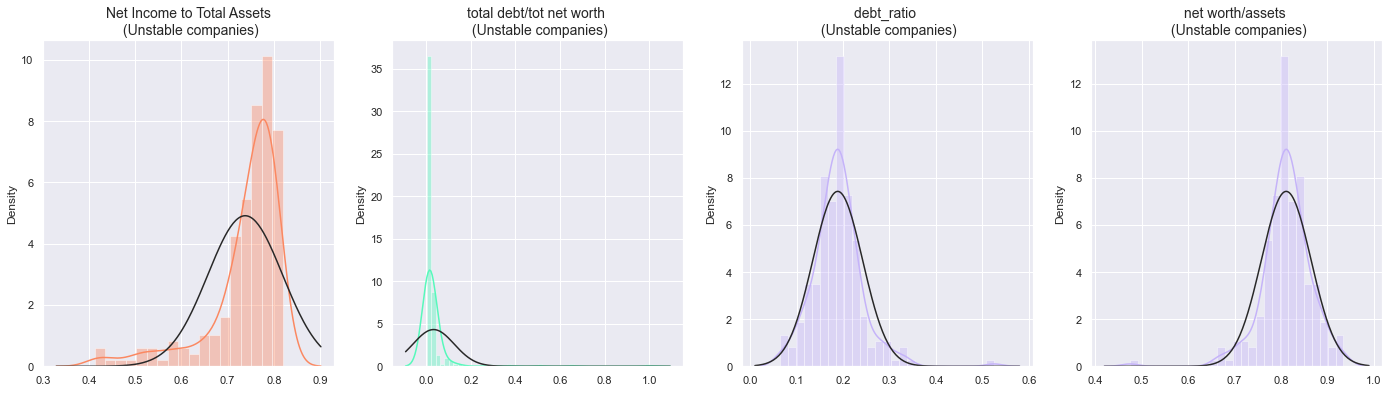

In [34]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = new_df[' Net Income to Total Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = new_df[' Total debt/Total net worth'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)

debt_ratio = new_df[' Debt ratio %'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = new_df[' Net worth/Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

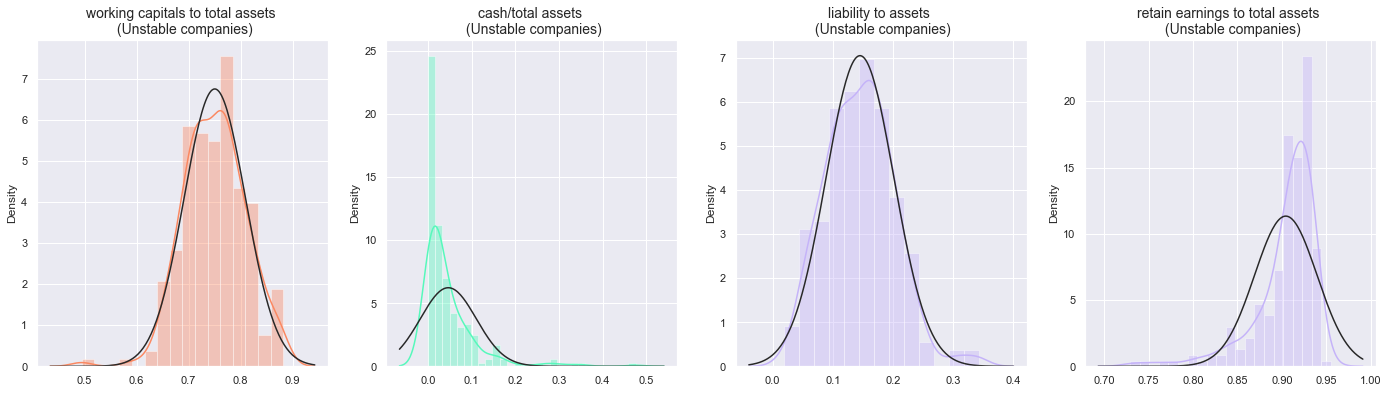

In [36]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = new_df[' Working Capital to Total Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = new_df[' Cash/Total Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = new_df[' Current Liability to Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = new_df[' Retained Earnings to Total Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

In [37]:
X = df.copy()

y = df['Bankrupt']

X = X.drop(['Bankrupt'], axis = 1)

In [38]:
X.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

In [39]:
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

data_norm = log_trans(new_df)

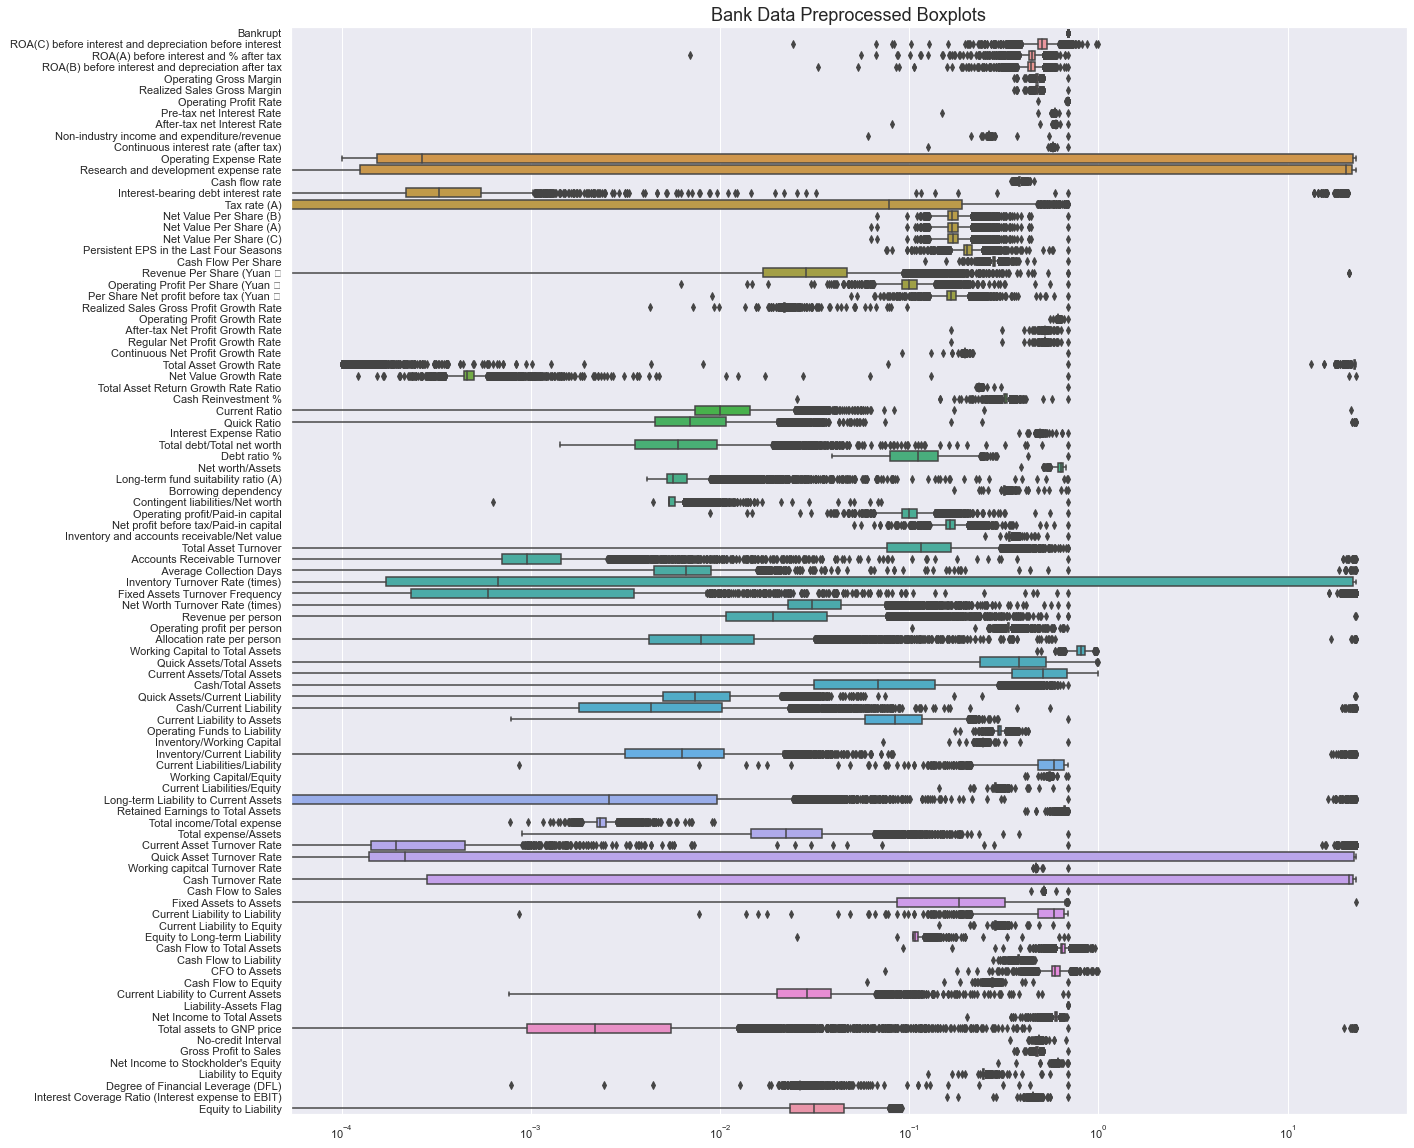

In [40]:
# Plotting Boxplots of the preprocessed numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data_norm, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

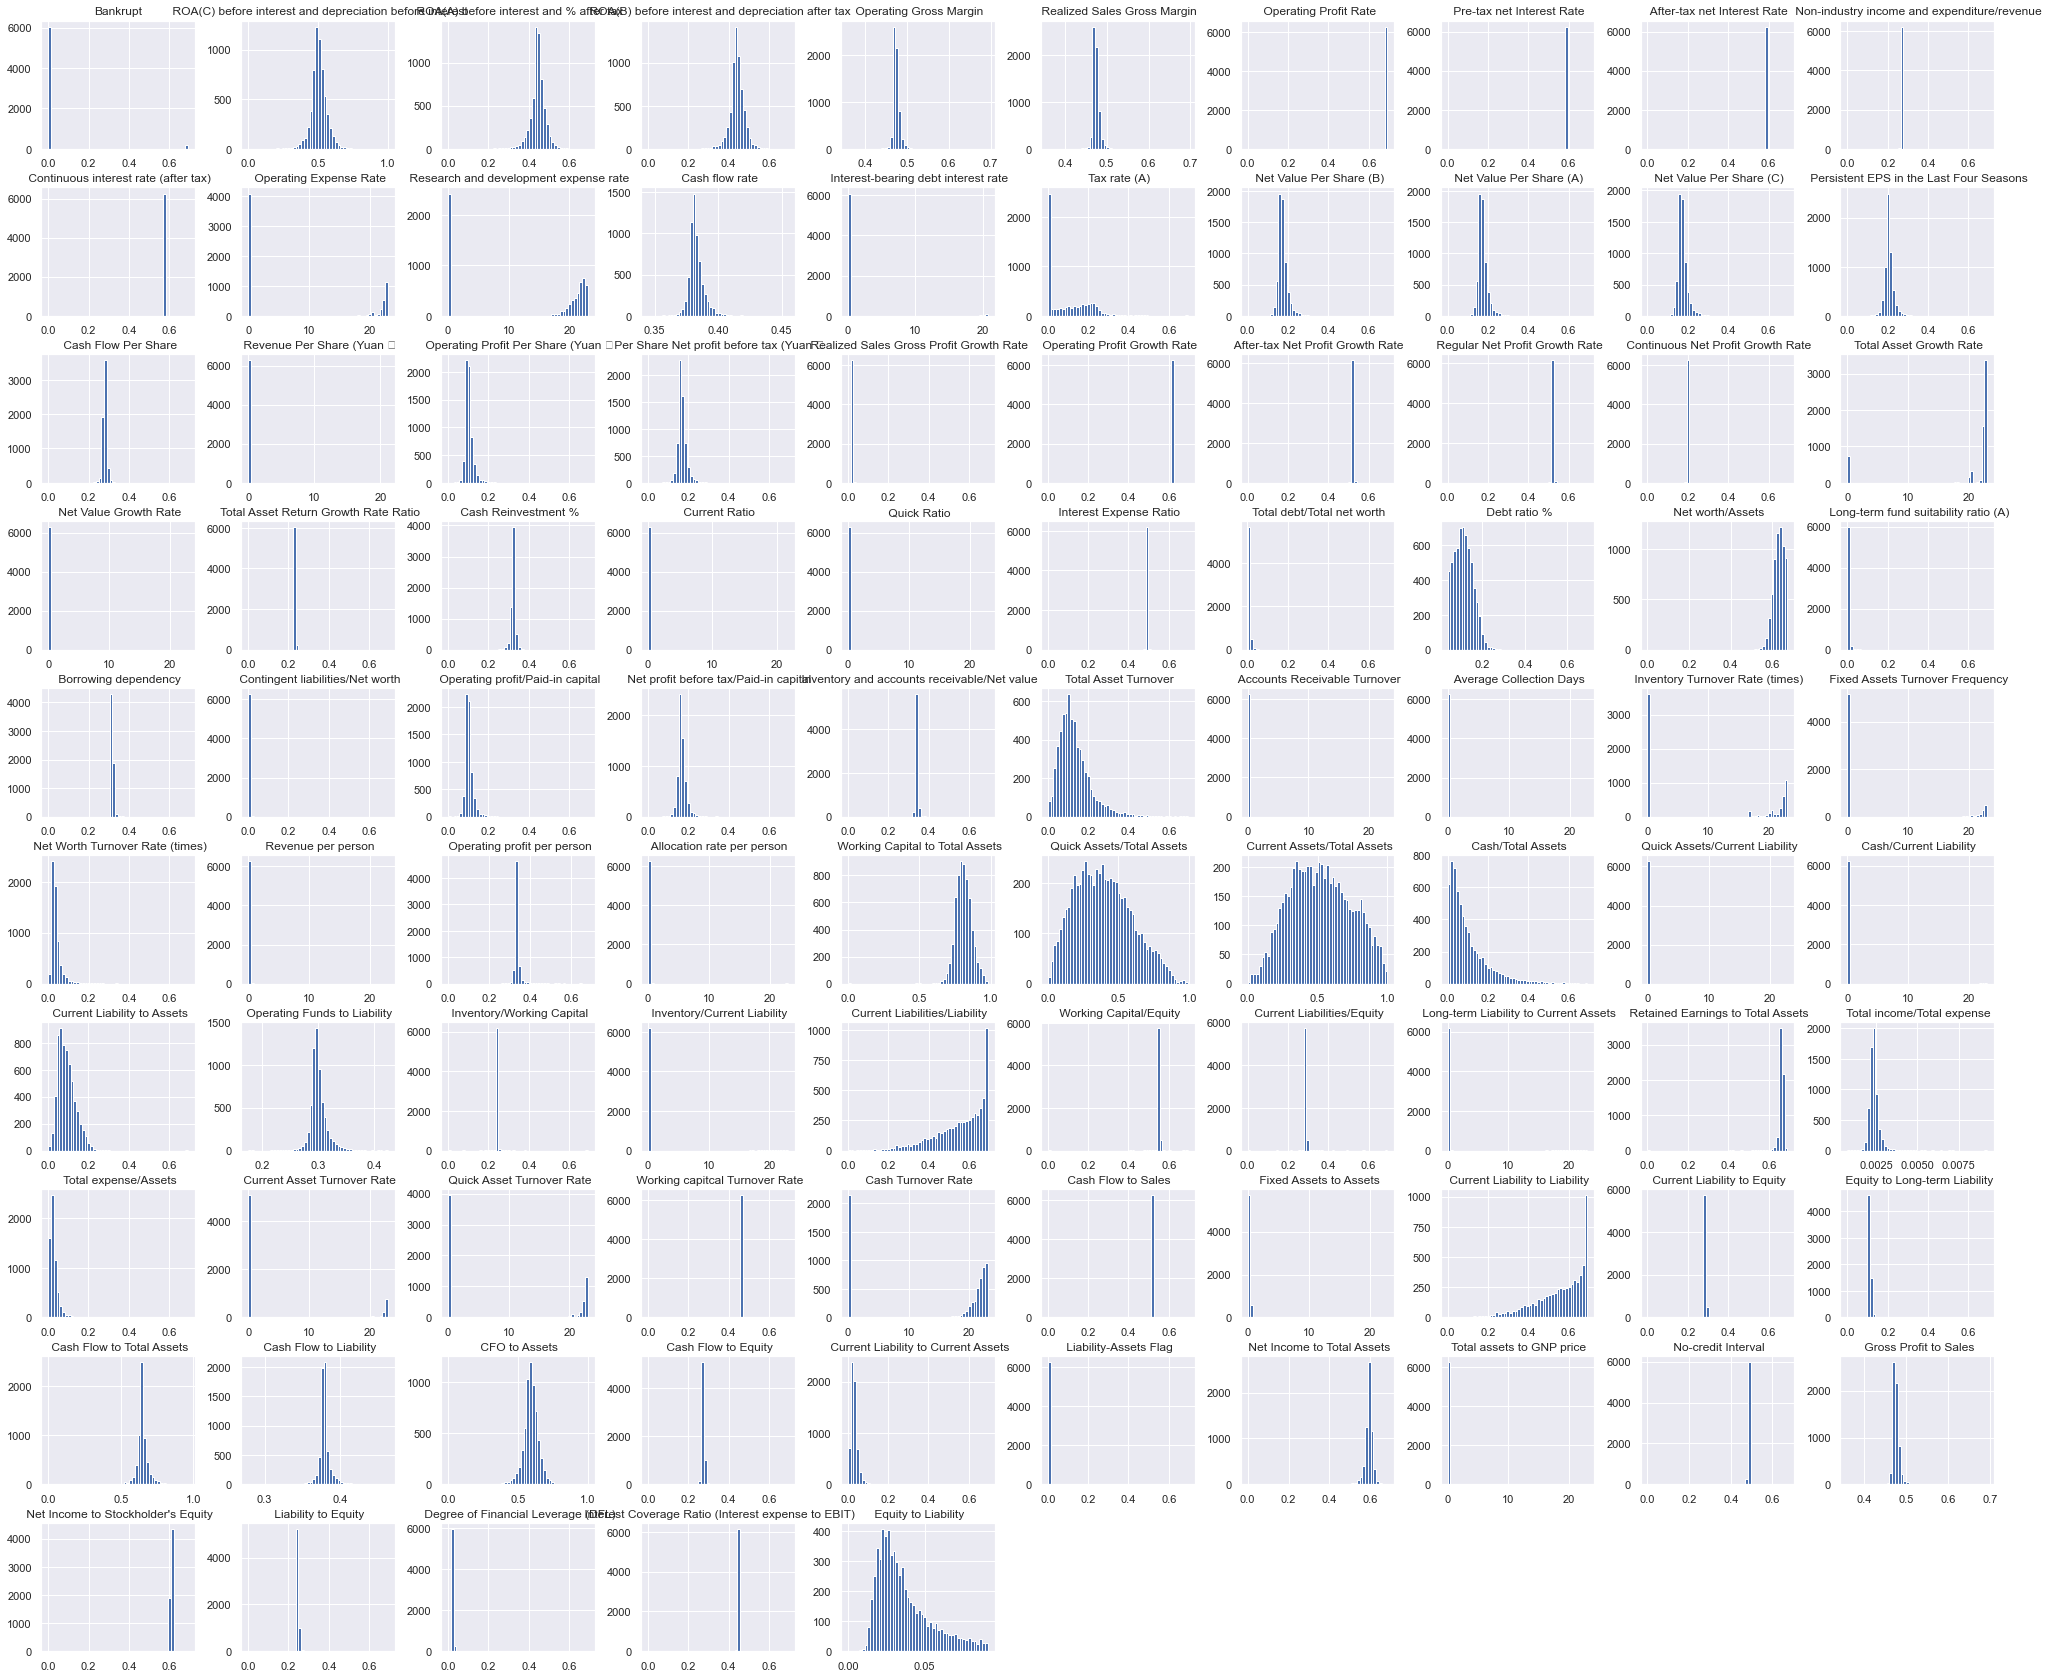

In [41]:
data_norm.hist(figsize = (35,30),bins = 50)
plt.show()

#### Splitting the dataset into train and test data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [43]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 101)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
print(f'''shape of X before SMOTE :{X.shape}
fshape of X after SMOTE:" {X_smote.shape}''')
print("\nBalance of positive and negative classes(%):")
y_smote.value_counts(normalize = True)* 100

shape of X before SMOTE :(6819, 94)
fshape of X after SMOTE:" (10558, 94)

Balance of positive and negative classes(%):


0    50.0
1    50.0
Name: Bankrupt, dtype: float64

## Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_smote = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

## Importing Machine Learning Libraries

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
import scipy.stats as stats
from sklearn.feature_selection import RFE

classifiers = [    [CatBoostClassifier(verbose=0), 'CatBoost Classifier'], 
    [XGBClassifier(), 'XGB Classifier'], 
    [RandomForestClassifier(), 'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
    [SGDClassifier(), 'SGDClassifier'], 
    [SVC(), 'SVC'], 
    [LGBMClassifier(), 'LGBM'], 
    [GaussianNB(), 'GaussianNB'], 
    [DecisionTreeClassifier(), 'DecisionTreeClassifier'], 
    [LogisticRegression(), 'LogisticRegression']
]

In [46]:
for cls in classifiers:
    model = cls[0]
    model.fit(X_smote, y_smote)
    
    y_pred = model.predict(X_test)
    print(cls[1])
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:",accuracy_score(y_test,y_pred) * 100)
    print("Recall:", recall_score(y_test, y_pred) * 100)
    print("F1 Score:", f1_score(y_test, y_pred)* 100)
    print("Precision: ",  precision_score(y_test, y_pred)* 100)
    print("\n\n\n")

CatBoost Classifier
Confusion Matrix: 
[[1286   34]
 [  26   18]]
Accuracy Score: 95.60117302052787
Recall: 40.909090909090914
F1 Score: 37.50000000000001
Precision:  34.61538461538461




XGB Classifier
Confusion Matrix: 
[[1292   28]
 [  26   18]]
Accuracy Score: 96.04105571847508
Recall: 40.909090909090914
F1 Score: 40.0
Precision:  39.130434782608695




Random Forest
Confusion Matrix: 
[[1282   38]
 [  23   21]]
Accuracy Score: 95.52785923753666
Recall: 47.72727272727273
F1 Score: 40.77669902912622
Precision:  35.59322033898305




K-Nearest Neighbours
Confusion Matrix: 
[[1196  124]
 [  18   26]]
Accuracy Score: 89.58944281524927
Recall: 59.09090909090909
F1 Score: 26.804123711340207
Precision:  17.333333333333336




SGDClassifier
Confusion Matrix: 
[[1190  130]
 [  19   25]]
Accuracy Score: 89.07624633431085
Recall: 56.81818181818182
F1 Score: 25.125628140703515
Precision:  16.129032258064516




SVC
Confusion Matrix: 
[[1244   76]
 [  19   25]]
Accuracy Score: 93.0351906158357

## Results
#### LGBMClassifier is giving the best Accuracy results.(96.40762463343108)
#### Naive Bayes theorem is giving the best recall.(88.88888888888889)
#### LGBMClassifier is giving the best Precision score.(44.73684210526316)
#### LGBMClassifier is giving the best F1 Score.(40.963855421686745)

In [47]:
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in sss.split(X_train,y_train):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_sm, y_val_sm = y_train.iloc[train_index], y_train.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

Train: [   1    3    4 ... 5451 5452 5453] Test: [   0    2    8 ... 5444 5449 5454]
Train: [   0    2    3 ... 5452 5453 5454] Test: [   1    7   11 ... 5431 5438 5443]
Train: [   0    1    2 ... 5452 5453 5454] Test: [   5   16   17 ... 5441 5445 5450]
Train: [   0    1    2 ... 5452 5453 5454] Test: [   4    6   10 ... 5446 5447 5451]
Train: [   0    1    2 ... 5450 5451 5454] Test: [   3   15   21 ... 5448 5452 5453]
------------------------------------------------------------------------------------
Label Distributions: 

[0.96791934 0.03208066]
[0.96700275 0.03299725]


In [48]:
accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])
    
    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))


print('---' * 45)
print('')
print('Logistic Regression (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))
print('')
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression (SMOTE) results:

accuracy: 0.7527433609718674
precision: 0.049814073474374054
recall: 0.35
f1: 0.08669730647441301

---------------------------------------------------------------------------------------------------------------------------------------


In [49]:
significant_vars = []

# Loop through each column in the DataFrame
for column in df.columns:
    # Use the Shapiro-Wilk test to check if the column is normally distributed
    _, p = stats.shapiro(df[column].dropna())
    if p < 0.05:
        # If the column is not normally distributed, use the Kruskal-Wallis test for non-parametric data
        _, p = stats.kruskal(df[df['Bankrupt']==0][column], df[df['Bankrupt']==1][column])
        if p < 0.05:
            # If the p-value is less than 0.05, the variable is considered significant
            significant_vars.append(column)
            
# Print the list of significant variables
print(significant_vars)

['Bankrupt', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan �', ' Operating Profit Per Share (Yuan �', ' Per Share Net profit before tax (Yuan �', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rat

In [50]:
len(significant_vars)

89

In [51]:
# Initialize the classifier
rfc = RandomForestClassifier(random_state=101)

# Initialize the RFE object
rfe = RFE(estimator=rfc, n_features_to_select=10, step=1)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Print the ranking of the features
print('Ranking of features:')
print(rfe.ranking_)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print('Selected features:')
print(selected_features)

Ranking of features:
[36 28 33 41 62 64 38 27  1  8 24 69 43  6 84  7  2 17  1 79 61 60 16 66
 49 80 65 46 59  1 25 72 37 12  1  1 19 22 52  1 83 39  1 76 71 34 23 75
 11 74 21 29 15 13 55 53  1  9  5 63 68 18 67 56  3 57 82 42 20 44 32 58
 47 70 54 78 73 51 48 45 35 50 77 40 85  4 14 26 81  1 30  1 10 31]
Selected features:
Index([' Non-industry income and expenditure/revenue',
       ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Cash/Total Assets', ' Net Income to Stockholder's Equity',
       ' Degree of Financial Leverage (DFL)'],
      dtype='object')
